In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rich import print

import tensorflow as tf
from keras.datasets import fashion_mnist
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from sklearn.preprocessing import StandardScaler

2022-02-25 12:26:18.937150: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:26:18.937171: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Train set size:", x_train.shape, y_train.shape)
print("Test set size:",  x_test.shape, y_test.shape)
print("Class with counts: ",np.unique(y_train, return_counts=True))

# splitting the train data into train and validation. validation set is 10% (approx 6000) of the original train set
# x_val = x_train[:6000]
# y_val = y_train[:6000]
# x_train = x_train[6000:]
# y_train = y_train[6000:]

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=0, stratify=y_train)


print("Class with counts: ", np.unique(y_train, return_counts=True))
print("Training set size:", x_train.shape, y_train.shape)
print("Validation set size:", x_val.shape, y_val.shape)


Train set size:
(60000, 28, 28)
(60000,)

Test set size:
(10000, 28, 28)
(10000,)

Class with counts: 
(
    array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
    array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])
)

Class with counts: 
(
    array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
    array([5400, 5400, 5400, 5400, 5400, 5400, 5400, 5400, 5400, 5400])
)

Training set size:
(54000, 28, 28)
(54000,)

Validation set size:
(6000, 28, 28)
(6000,)

# Plotting example data

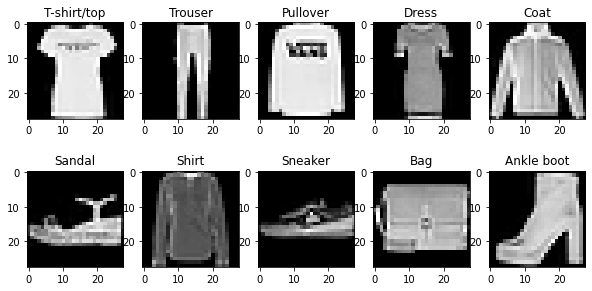

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# finding example of all classes
example_images = {}
for i in range(len(x_train)):
    if len(example_images) == 10:
        break
    if y_train[i] not in example_images.keys():
        example_images[y_train[i]] = x_train[i]

# plotting the images
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
# ax is a 2x5 array of axes
for i in range(10):
    ax[i//5, i % 5].imshow(example_images[i], cmap="gray")
    ax[i//5, i % 5].set_title(class_names[i])


# Importing NN Module

In [4]:
from NN.Model import Model
from NN.Layer.Linear import Linear
from NN.Layer.Activation.ReLU import ReLU
from NN.Layer.Activation.TanH import TanH
from NN.Layer.Activation.Sigmoid import Sigmoid
from NN.Layer.Activation.Softmax import Softmax
from NN.Accuracy.Accuracy import Accuracy
from NN.Loss.CategoricalCrossEntropy import CategoricalCrossEntropy
from NN.Optimizer.Adam import Adam
from NN.Optimizer.Nadam import Nadam
from NN.Optimizer.RMSprop import RMSprop
from NN.Optimizer.Momentum import Momentum
from NN.Optimizer.SGD import SGD
from NN.Optimizer.NAG import NAG

import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
from keras.datasets import fashion_mnist
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss

import wandb
import os

# os.environ["WANDB_SILENT"] = "true"
wandb.init(project="Assignment1", entity="cookie303")
wandb.log({"examples": images}

wandb: Currently logged in as: cookie303 (use `wandb login --relogin` to force relogin)
2022-02-25 12:26:23.255006: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:26:23.255028: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Data Pre-processing

In [5]:
def do_standard_transform(X, scalar=None):
    X = X.reshape(X.shape[0], -1).astype("float32")
    
    # Or do sklearn's StandardScaler
    if scalar is not None:
        X = scalar.transform(X)
    else:
        X = (X - X.mean(axis=1, keepdims=True)) / X.std(axis=1, keepdims=True)

    return X


def do_one_hot_encode(y, encoder=None):
    y = y.reshape(-1, 1)
    if encoder is not None:
        y = encoder.transform(y).toarray()
    else:
        encoder = OneHotEncoder()
        encoder.fit(y)
        y = encoder.transform(y).toarray()
    return y


X      = do_standard_transform(x_train)
X_val  = do_standard_transform(x_val)
X_test = do_standard_transform(x_test)

# One hot encoding the labels
enc = OneHotEncoder()
enc.fit(y_train.reshape(-1, 1))


y_train_one_hot = do_one_hot_encode(y_train, enc)
y_val_one_hot = do_one_hot_encode(y_val, enc)
y_test_one_hot = do_one_hot_encode(y_test, enc)

In [6]:
# wandb.init(project="Assignment1", entity="cookie303")

# wandb.config = {
#     "learning_rate": 0.001,
#     "epochs": 100,
#     "batch_size": 128
# }


# Instantiate the model
model = Model()

# Add layers
model.add(Linear(X.shape[1], 32, initializer="xavier"))
model.add(TanH())
model.add(Linear(32, 32, initializer="xavier"))
model.add(TanH())
model.add(Linear(32, 10, initializer="random"))
model.add(Softmax())

# Set loss, optimizer and accuracy objects
model.set(
    loss=CategoricalCrossEntropy(),
    optimizer=Adam(learning_rate=1e-3),
    # optimizer=SGD(learning_rate=0.01, momentum=0.09),
    scoring=Accuracy()
)

# Finalize the model
model.setup_connections()

# Train the model
model.train(X, y_train_one_hot, validation_data=(X_val, y_val_one_hot),
            epochs=10, batch_size=16)
keras.datasets.mnist.load_data()

epoch=1
training_loss=0.57, training_accuracy= 0.80
Validation: val_loss=0.47, val_accuracy=0.83

epoch=2
training_loss=0.43, training_accuracy= 0.85
Validation: val_loss=0.43, val_accuracy=0.84

epoch=3
training_loss=0.40, training_accuracy= 0.86
Validation: val_loss=0.41, val_accuracy=0.85

epoch=4
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.40, val_accuracy=0.86

epoch=5
training_loss=0.37, training_accuracy= 0.86
Validation: val_loss=0.40, val_accuracy=0.85

epoch=6
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.39, val_accuracy=0.86

epoch=7
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.39, val_accuracy=0.86

epoch=8
training_loss=0.35, training_accuracy= 0.88
Validation: val_loss=0.38, val_accuracy=0.86

epoch=9
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.38, val_accuracy=0.87

epoch=10
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.38, val_accuracy=0.86



In [7]:
model.test(X_test, y_test_one_hot)

{'loss': 0.4114208934075162, 'accuracy': 0.8534}

Predicted class : Trouser

Actual class : Trouser

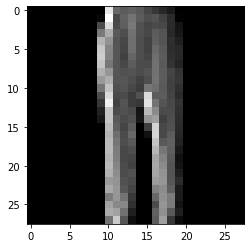

In [8]:
im_id = np.random.randint(1000)
idx = model.predict(X_test[im_id].reshape(1, -1)).argmax()
plt.imshow(x_test[im_id], cmap="gray")
print("Predicted class :", class_names[idx])
print("Actual class :", class_names[y_test[im_id]])
plt.show()

# WandB sweep

In [9]:
activation_dict = {
    "Sigmoid": Sigmoid,
    "Tanh": TanH,
    "ReLU": ReLU,
}

optim_dict = {
    "SGD": SGD,
    "Adam": Adam,
    "Nadam": Nadam,
    "Moment": Momentum,
    "RMSprop": RMSprop,
    "NAG": NAG
}

loss_dict = {
    "CategoricalCrossEntropy": CategoricalCrossEntropy,
}

accuracy_dict = {
    "Accuracy": Accuracy,
}


In [10]:
wandb.init(project="Assignment1", entity="cookie303")

sweep_config = {
  "name": "Bayesian Sweep",
  "method": "bayes",
  "metric":{
  "name": "val_accuracy",
  "goal": "maximize"
  },
  "parameters": {
        "epochs": {
            "values": [5, 10]
        },

        "initializer": {
            "values": ["random", "xavier", "he"]
        },

        "num_layers": {
            "values": [3, 4, 5]
        },
        
        
        "num_hidden_neurons": {
            "values": [32, 64, 128]
        },
        
        "activation": {
            "values": ['Sigmoid', 'Tanh', 'ReLU']
        },
        
        "learning_rate": {
            "values": [0.001, 0.0005, 0.0001]
        },
        
        
        "weight_decay": {
            "values": [0, 0.0005, 0.001, 0.0015]
        },
        
        "optimizer": {
            "values": ["SGD", "Moment", "NAG", "RMSprop", "Adam", "Nadam"]
        },
                    
        "batch_size": {
            "values": [16, 32, 64]
        }
        
    }
}

sweep_id = wandb.sweep(sweep_config,project='Assignment1', entity='cookie303')

epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▅▆▆▇▇▇▇██
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▃▅▆▆▇▆▇██
val_loss,█▅▄▃▂▂▂▁▁▁
epoch,10
train_accuracy,0.88119
train_loss,0.32762
val_accuracy,0.86483
val_loss,0.37985


2022-02-25 12:27:16.025352: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:27:16.025391: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Create sweep with ID: dv9uga4d
Sweep URL: https://wandb.ai/cookie303/Assignment1/sweeps/dv9uga4d


In [11]:
def sweep():
    config_defaults = dict(
        epochs=5,
        num_layers=3,
        num_hidden_neurons=32,
        weight_decay=0,
        learning_rate=1e-3,
        optimizer="SGD",
        batch_size=16,
        activation="Tanh",
        initializer="xavier",
    )


    wandb.init(config=config_defaults)
    #wandb.init(project='CS6910-DeepLearningFundamentals-Assignment1', entity='rahulsundar',config = config_defaults)

    wandb.run.name = "hl_" + str(wandb.config.num_layers) + "_hn_" + str(wandb.config.num_hidden_neurons) +\
                 "_opt_" + wandb.config.optimizer + "_act_" + wandb.config.activation + "_lr_" + \
                 str(wandb.config.learning_rate) + "_bs_" + str(wandb.config.batch_size) + "_init_" + \
                 wandb.config.initializer + "_ep_" + str(wandb.config.epochs) + "_l2_" + str(wandb.config.weight_decay)
    
    CONFIG = wandb.config


    # Initialize the model
    model = Model()


    for layer in range(CONFIG.num_layers):
        # First Layer
        if layer == 0:
            model.add(Linear(
                X.shape[1], CONFIG.num_hidden_neurons, initializer=CONFIG.initializer, alpha=CONFIG.weight_decay))
            model.add(activation_dict[CONFIG.activation]())

        elif layer == CONFIG.num_layers - 1:
            model.add(Linear(CONFIG.num_hidden_neurons,
                    len(y_test_one_hot[0]), initializer=CONFIG.initializer, alpha=CONFIG.weight_decay))
            model.add(Softmax())
            
        else:
            model.add(Linear(CONFIG.num_hidden_neurons,
                    CONFIG.num_hidden_neurons, initializer=CONFIG.initializer, alpha=CONFIG.weight_decay))
            model.add(activation_dict[CONFIG.activation]())

    model.set(
        loss=CategoricalCrossEntropy(),
        optimizer=optim_dict[CONFIG.optimizer](learning_rate=CONFIG.learning_rate),
        scoring=Accuracy()
    )


    # Finalize the model
    model.setup_connections()

    model.train(X, y_train_one_hot, validation_data=(X_val, y_val_one_hot),
                epochs=CONFIG.epochs, batch_size=CONFIG.batch_size)

    test_results = model.test(X_test, y_test_one_hot)
    wandb.log({
        "test_loss":test_results['loss'],
        "test_accuracy": test_results['accuracy']
    })

In [12]:
wandb.agent(sweep_id, sweep, count=300)

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.
wandb: Agent Starting Run: wvvg2z3a with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: RMSprop
wandb: 	weight_decay: 0
2022-02-25 12:27:24.505868: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:27:24.505891: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.60, training_accuracy= 0.79
Validation: val_loss=0.48, val_accuracy=0.83

epoch=2
training_loss=0.46, training_accuracy= 0.84
Validation: val_loss=0.47, val_accuracy=0.84

epoch=3
training_loss=0.45, training_accuracy= 0.85
Validation: val_loss=0.48, val_accuracy=0.85

epoch=4
training_loss=0.46, training_accuracy= 0.86
Validation: val_loss=0.50, val_accuracy=0.85

epoch=5
training_loss=0.48, training_accuracy= 0.86
Validation: val_loss=0.53, val_accuracy=0.85



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▁▁▂▂
val_accuracy,▁▅▇██
val_loss,▂▁▂▅█
epoch,5
test_accuracy,0.8408
test_loss,0.57014
train_accuracy,0.8577


wandb: Agent Starting Run: ddgrp4av with config:
wandb: 	activation: Sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 5
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.001
2022-02-25 12:27:56.172857: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:27:56.172878: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=2.31, training_accuracy= 0.10
Validation: val_loss=2.31, val_accuracy=0.10

epoch=2
training_loss=2.31, training_accuracy= 0.10
Validation: val_loss=2.31, val_accuracy=0.10

epoch=3
training_loss=2.31, training_accuracy= 0.10
Validation: val_loss=2.31, val_accuracy=0.10

epoch=4
training_loss=2.31, training_accuracy= 0.10
Validation: val_loss=2.31, val_accuracy=0.10

epoch=5
training_loss=2.31, training_accuracy= 0.10
Validation: val_loss=2.31, val_accuracy=0.10

epoch=6
training_loss=2.31, training_accuracy= 0.10
Validation: val_loss=2.31, val_accuracy=0.10

epoch=7
training_loss=2.30, training_accuracy= 0.10
Validation: val_loss=2.29, val_accuracy=0.10

epoch=8
training_loss=2.10, training_accuracy= 0.14
Validation: val_loss=1.87, val_accuracy=0.20

epoch=9
training_loss=1.81, training_accuracy= 0.20
Validation: val_loss=1.78, val_accuracy=0.20

epoch=10
training_loss=1.71, training_accuracy= 0.23
Validation: val_loss=1.66, val_accuracy=0.32



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▁▁▁▁▁▁▃▇█
train_loss,███████▆▂▁
val_accuracy,▁▁▁▁▁▁▁▄▄█
val_loss,███████▃▂▁
epoch,10
test_accuracy,0.3256
test_loss,1.66488
train_accuracy,0.23093


wandb: Agent Starting Run: b5sz5k9l with config:
wandb: 	activation: Sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 4
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0
2022-02-25 12:29:25.906404: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:29:25.906426: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=2.30, training_accuracy= 0.20
Validation: val_loss=2.27, val_accuracy=0.26

epoch=2
training_loss=2.25, training_accuracy= 0.39
Validation: val_loss=2.23, val_accuracy=0.40

epoch=3
training_loss=2.21, training_accuracy= 0.51
Validation: val_loss=2.18, val_accuracy=0.53

epoch=4
training_loss=2.14, training_accuracy= 0.54
Validation: val_loss=2.09, val_accuracy=0.54

epoch=5
training_loss=2.03, training_accuracy= 0.54
Validation: val_loss=1.97, val_accuracy=0.54

epoch=6
training_loss=1.89, training_accuracy= 0.55
Validation: val_loss=1.81, val_accuracy=0.56

epoch=7
training_loss=1.73, training_accuracy= 0.57
Validation: val_loss=1.66, val_accuracy=0.59

epoch=8
training_loss=1.59, training_accuracy= 0.60
Validation: val_loss=1.52, val_accuracy=0.61

epoch=9
training_loss=1.46, training_accuracy= 0.61
Validation: val_loss=1.41, val_accuracy=0.62

epoch=10
training_loss=1.36, training_accuracy= 0.62
Validation: val_loss=1.32, val_accuracy=0.62



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▆▇▇▇▇███
train_loss,██▇▇▆▅▄▃▂▁
val_accuracy,▁▄▆▆▆▇▇███
val_loss,██▇▇▆▅▃▂▂▁
epoch,10
test_accuracy,0.6209
test_loss,1.32447
train_accuracy,0.61861


wandb: Agent Starting Run: ioqrjvrb with config:
wandb: 	activation: Sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0.0015
2022-02-25 12:30:34.768759: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:30:34.768783: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=2.36, training_accuracy= 0.13
Validation: val_loss=2.26, val_accuracy=0.20

epoch=2
training_loss=2.24, training_accuracy= 0.32
Validation: val_loss=2.22, val_accuracy=0.41

epoch=3
training_loss=2.20, training_accuracy= 0.45
Validation: val_loss=2.18, val_accuracy=0.47

epoch=4
training_loss=2.15, training_accuracy= 0.49
Validation: val_loss=2.13, val_accuracy=0.49

epoch=5
training_loss=2.11, training_accuracy= 0.52
Validation: val_loss=2.09, val_accuracy=0.52



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▇██
train_loss,█▄▃▂▁
val_accuracy,▁▆▇▇█
val_loss,█▆▄▃▁
epoch,5
test_accuracy,0.517
test_loss,2.09247
train_accuracy,0.51544


wandb: Agent Starting Run: po502pv4 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 12:31:38.132509: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:31:38.132532: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.83
Validation: val_loss=0.41, val_accuracy=0.85

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.35, val_accuracy=0.87

epoch=6
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.35, val_accuracy=0.87

epoch=7
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88

epoch=8
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.35, val_accuracy=0.87

epoch=9
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.35, val_accuracy=0.88

epoch=10
training_loss=0.23, training_accuracy= 0.91
Validation: val_loss=0.38, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▄▆██▇████
val_loss,█▅▃▁▁▂▁▂▂▅
epoch,10
test_accuracy,0.869
test_loss,0.41588
train_accuracy,0.91356


wandb: Agent Starting Run: wwnlneb4 with config:
wandb: 	activation: Tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 12:32:41.712532: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:32:41.712554: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.53, training_accuracy= 0.82
Validation: val_loss=0.44, val_accuracy=0.84

epoch=2
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.40, val_accuracy=0.85

epoch=3
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86

epoch=4
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.86

epoch=5
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.86

epoch=6
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.37, val_accuracy=0.86

epoch=7
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.37, val_accuracy=0.86

epoch=8
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.36, val_accuracy=0.87

epoch=9
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.36, val_accuracy=0.87

epoch=10
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.36, val_accuracy=0.87



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇████
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▅▆▇▇▇▇███
val_loss,█▅▃▂▂▂▂▁▁▁
epoch,10
test_accuracy,0.8575
test_loss,0.40587
train_accuracy,0.89761


wandb: Agent Starting Run: qrlqw13w with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 5
wandb: 	optimizer: RMSprop
wandb: 	weight_decay: 0.0005
2022-02-25 12:33:40.012751: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:33:40.012772: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.62, training_accuracy= 0.80
Validation: val_loss=0.50, val_accuracy=0.84

epoch=2
training_loss=0.50, training_accuracy= 0.84
Validation: val_loss=0.50, val_accuracy=0.85

epoch=3
training_loss=0.49, training_accuracy= 0.85
Validation: val_loss=0.49, val_accuracy=0.85

epoch=4
training_loss=0.49, training_accuracy= 0.85
Validation: val_loss=0.52, val_accuracy=0.85

epoch=5
training_loss=0.50, training_accuracy= 0.85
Validation: val_loss=0.55, val_accuracy=0.85

epoch=6
training_loss=0.51, training_accuracy= 0.85
Validation: val_loss=0.53, val_accuracy=0.85

epoch=7
training_loss=0.50, training_accuracy= 0.86
Validation: val_loss=0.51, val_accuracy=0.85

epoch=8
training_loss=0.50, training_accuracy= 0.86
Validation: val_loss=0.55, val_accuracy=0.84

epoch=9
training_loss=0.50, training_accuracy= 0.86
Validation: val_loss=0.52, val_accuracy=0.85

epoch=10
training_loss=0.50, training_accuracy= 0.86
Validation: val_loss=0.53, val_accuracy=0.85



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇██████
train_loss,█▁▁▁▁▂▂▂▂▂
val_accuracy,▁▆▆▆▆██▄█▇
val_loss,▂▂▁▄█▅▃▇▄▆
epoch,10
test_accuracy,0.8414
test_loss,0.60001
train_accuracy,0.85854


wandb: Agent Starting Run: tg4pme1x with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 5
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0
2022-02-25 12:34:43.359775: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:34:43.359796: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.51, training_accuracy= 0.82
Validation: val_loss=0.41, val_accuracy=0.85

epoch=2
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.86

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.86

epoch=5
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇▇█
train_loss,█▃▂▂▁
val_accuracy,▁▄▆▆█
val_loss,█▅▂▂▁
epoch,5
test_accuracy,0.8607
test_loss,0.38489
train_accuracy,0.88702


wandb: Agent Starting Run: q3sa6r73 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 4
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0
2022-02-25 12:35:15.240599: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:35:15.240623: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=2.00, training_accuracy= 0.19
Validation: val_loss=1.22, val_accuracy=0.48

epoch=2
training_loss=1.04, training_accuracy= 0.53
Validation: val_loss=0.96, val_accuracy=0.57

epoch=3
training_loss=0.92, training_accuracy= 0.61
Validation: val_loss=0.88, val_accuracy=0.62

epoch=4
training_loss=0.86, training_accuracy= 0.65
Validation: val_loss=0.83, val_accuracy=0.65

epoch=5
training_loss=0.82, training_accuracy= 0.67
Validation: val_loss=0.80, val_accuracy=0.68

epoch=6
training_loss=0.78, training_accuracy= 0.70
Validation: val_loss=0.77, val_accuracy=0.71

epoch=7
training_loss=0.73, training_accuracy= 0.73
Validation: val_loss=0.71, val_accuracy=0.74

epoch=8
training_loss=0.68, training_accuracy= 0.75
Validation: val_loss=0.68, val_accuracy=0.75

epoch=9
training_loss=0.65, training_accuracy= 0.76
Validation: val_loss=0.65, val_accuracy=0.75

epoch=10
training_loss=0.63, training_accuracy= 0.77
Validation: val_loss=0.64, val_accuracy=0.76



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇▇▇████
train_loss,█▃▂▂▂▂▂▁▁▁
val_accuracy,▁▃▅▅▆▇████
val_loss,█▅▄▃▃▃▂▁▁▁
epoch,10
test_accuracy,0.7607
test_loss,0.6469
train_accuracy,0.76739


wandb: Agent Starting Run: jxt43zw0 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 12:35:41.769275: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:35:41.769297: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.58, training_accuracy= 0.80
Validation: val_loss=0.45, val_accuracy=0.84

epoch=2
training_loss=0.42, training_accuracy= 0.85
Validation: val_loss=0.41, val_accuracy=0.85

epoch=3
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=4
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.86

epoch=5
training_loss=0.35, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▇█
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.8581
test_loss,0.39533
train_accuracy,0.87574


wandb: Agent Starting Run: ins0xv78 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 12:36:13.852123: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:36:13.852144: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.58, training_accuracy= 0.81
Validation: val_loss=0.45, val_accuracy=0.83

epoch=2
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.40, val_accuracy=0.85

epoch=3
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.86

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇▇█
train_loss,█▃▂▂▁
val_accuracy,▁▄▆██
val_loss,█▅▂▁▁
epoch,5
test_accuracy,0.8615
test_loss,0.38442
train_accuracy,0.88959


wandb: Agent Starting Run: a0b91beg with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 12:36:56.341678: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:36:56.341698: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.78, training_accuracy= 0.75
Validation: val_loss=0.50, val_accuracy=0.82

epoch=2
training_loss=0.46, training_accuracy= 0.84
Validation: val_loss=0.44, val_accuracy=0.84

epoch=3
training_loss=0.41, training_accuracy= 0.85
Validation: val_loss=0.41, val_accuracy=0.85

epoch=4
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=5
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.87

epoch=6
training_loss=0.35, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.87

epoch=7
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=8
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=9
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.36, val_accuracy=0.87

epoch=10
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇▇▇████
train_loss,█▃▃▂▂▂▁▁▁▁
val_accuracy,▁▄▅▇▇▇▇███
val_loss,█▅▄▃▂▂▁▁▁▁
epoch,10
test_accuracy,0.8636
test_loss,0.39104
train_accuracy,0.88976


wandb: Agent Starting Run: vcn0otej with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 12:37:33.437295: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:37:33.437315: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.63, training_accuracy= 0.79
Validation: val_loss=0.48, val_accuracy=0.83

epoch=2
training_loss=0.44, training_accuracy= 0.84
Validation: val_loss=0.43, val_accuracy=0.84

epoch=3
training_loss=0.40, training_accuracy= 0.86
Validation: val_loss=0.41, val_accuracy=0.85

epoch=4
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.39, val_accuracy=0.86

epoch=5
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86

epoch=6
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.87

epoch=7
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.87

epoch=8
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.36, val_accuracy=0.87

epoch=9
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.36, val_accuracy=0.87

epoch=10
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▄▅▆▇▇▇▇██
val_loss,█▅▄▃▂▂▂▂▁▁
epoch,10
test_accuracy,0.8658
test_loss,0.37397
train_accuracy,0.89211


wandb: Agent Starting Run: wyrmjdax with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 12:38:31.524378: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:38:31.524401: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.49, training_accuracy= 0.83
Validation: val_loss=0.41, val_accuracy=0.85

epoch=2
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.38, val_accuracy=0.86

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.86

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.36, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇▇█
train_loss,█▄▂▂▁
val_accuracy,▁▆▆▇█
val_loss,█▃▃▂▁
epoch,5
test_accuracy,0.8586
test_loss,0.39638
train_accuracy,0.8895


wandb: Agent Starting Run: uemqbrzf with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 5
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0
2022-02-25 12:39:03.580731: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:39:03.580753: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.48, training_accuracy= 0.83
Validation: val_loss=0.40, val_accuracy=0.85

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.35, val_accuracy=0.87

epoch=3
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.88

epoch=6
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.30, val_accuracy=0.89

epoch=7
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.30, val_accuracy=0.89

epoch=8
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.30, val_accuracy=0.89

epoch=9
training_loss=0.21, training_accuracy= 0.92
Validation: val_loss=0.30, val_accuracy=0.89

epoch=10
training_loss=0.20, training_accuracy= 0.93
Validation: val_loss=0.30, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▅▆▆▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▄▅▆▇▇▇▇██
val_loss,█▄▃▂▂▁▁▁▁▁
epoch,10
test_accuracy,0.8821
test_loss,0.3431
train_accuracy,0.92578


wandb: Agent Starting Run: 3qe4se3c with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 12:41:00.021171: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:41:00.021192: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=2.30, training_accuracy= 0.10
Validation: val_loss=2.30, val_accuracy=0.10

epoch=2
training_loss=1.48, training_accuracy= 0.38
Validation: val_loss=0.94, val_accuracy=0.61

epoch=3
training_loss=0.85, training_accuracy= 0.66
Validation: val_loss=0.79, val_accuracy=0.70

epoch=4
training_loss=0.75, training_accuracy= 0.71
Validation: val_loss=0.72, val_accuracy=0.73

epoch=5
training_loss=0.70, training_accuracy= 0.73
Validation: val_loss=0.69, val_accuracy=0.74



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▇██
train_loss,█▄▂▁▁
val_accuracy,▁▇███
val_loss,█▂▁▁▁
epoch,5
test_accuracy,0.732
test_loss,0.70396
train_accuracy,0.73174


wandb: Agent Starting Run: prn3bho6 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 12:41:31.811919: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:41:31.811941: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.52, training_accuracy= 0.82
Validation: val_loss=0.42, val_accuracy=0.85

epoch=2
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.35, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=5
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=6
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=7
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=8
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=9
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.33, val_accuracy=0.88

epoch=10
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▅▆▆▇▇▇██
train_loss,█▄▄▃▂▂▂▁▁▁
val_accuracy,▁▄▆▇██████
val_loss,█▅▃▂▂▁▁▁▁▁
epoch,10
test_accuracy,0.8692
test_loss,0.36492
train_accuracy,0.90839


wandb: Agent Starting Run: evz22100 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 12:42:45.671914: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:42:45.671936: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.60, training_accuracy= 0.80
Validation: val_loss=0.45, val_accuracy=0.84

epoch=2
training_loss=0.42, training_accuracy= 0.85
Validation: val_loss=0.41, val_accuracy=0.86

epoch=3
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=4
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87

epoch=5
training_loss=0.35, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▆▇█
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.8593
test_loss,0.39825
train_accuracy,0.87511


wandb: Agent Starting Run: kd81eu59 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 4
wandb: 	optimizer: RMSprop
wandb: 	weight_decay: 0
2022-02-25 12:43:17.585902: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:43:17.585926: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.90, training_accuracy= 0.79
Validation: val_loss=0.88, val_accuracy=0.81

epoch=2
training_loss=1.00, training_accuracy= 0.82
Validation: val_loss=1.11, val_accuracy=0.81

epoch=3
training_loss=0.99, training_accuracy= 0.82
Validation: val_loss=1.18, val_accuracy=0.83

epoch=4
training_loss=1.14, training_accuracy= 0.83
Validation: val_loss=1.55, val_accuracy=0.80

epoch=5
training_loss=1.15, training_accuracy= 0.83
Validation: val_loss=1.51, val_accuracy=0.81

epoch=6
training_loss=1.09, training_accuracy= 0.84
Validation: val_loss=1.22, val_accuracy=0.82

epoch=7
training_loss=1.17, training_accuracy= 0.84
Validation: val_loss=1.71, val_accuracy=0.80

epoch=8
training_loss=1.16, training_accuracy= 0.84
Validation: val_loss=1.20, val_accuracy=0.83

epoch=9
training_loss=1.09, training_accuracy= 0.84
Validation: val_loss=1.30, val_accuracy=0.83

epoch=10
training_loss=1.05, training_accuracy= 0.85
Validation: val_loss=1.25, val_accuracy=0.84



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,▁▃▃▇█▆██▆▅
val_accuracy,▃▂▇▁▂▅▁▅▇█
val_loss,▁▃▃▇▆▄█▄▄▄
epoch,10
test_accuracy,0.8275
test_loss,1.33241
train_accuracy,0.84713


wandb: Agent Starting Run: vx3fili4 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: RMSprop
wandb: 	weight_decay: 0
wandb: Currently logged in as: ms20 (use `wandb login --relogin` to force relogin)
2022-02-25 12:44:05.331348: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:44:05.331369: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.69, training_accuracy= 0.77
Validation: val_loss=0.47, val_accuracy=0.83

epoch=2
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.42, val_accuracy=0.85

epoch=3
training_loss=0.41, training_accuracy= 0.85
Validation: val_loss=0.41, val_accuracy=0.85

epoch=4
training_loss=0.40, training_accuracy= 0.86
Validation: val_loss=0.40, val_accuracy=0.86

epoch=5
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.40, val_accuracy=0.86



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▂▂▁▁
val_accuracy,▁▅▆▇█
val_loss,█▃▂▁▁
epoch,5
test_accuracy,0.853
test_loss,0.44235
train_accuracy,0.86485


wandb: Agent Starting Run: oy1nebas with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0
2022-02-25 12:44:32.156762: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:44:32.156789: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.48, training_accuracy= 0.83
Validation: val_loss=0.39, val_accuracy=0.85

epoch=2
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.87

epoch=4
training_loss=0.31, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▂▂▁
val_accuracy,▁▃▆▆█
val_loss,█▆▄▃▁
epoch,5
test_accuracy,0.8589
test_loss,0.39433
train_accuracy,0.89013


wandb: Agent Starting Run: s3p39lyy with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 12:45:04.228388: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:45:04.228411: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.88, training_accuracy= 0.72
Validation: val_loss=0.55, val_accuracy=0.81

epoch=2
training_loss=0.50, training_accuracy= 0.83
Validation: val_loss=0.48, val_accuracy=0.83

epoch=3
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.44, val_accuracy=0.84

epoch=4
training_loss=0.42, training_accuracy= 0.85
Validation: val_loss=0.42, val_accuracy=0.85

epoch=5
training_loss=0.40, training_accuracy= 0.86
Validation: val_loss=0.41, val_accuracy=0.86



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▂▂▁▁
val_accuracy,▁▄▆▇█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.845
test_loss,0.44853
train_accuracy,0.85894


wandb: Agent Starting Run: slspjhr2 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 12:45:25.551779: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:45:25.551802: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.76, training_accuracy= 0.71
Validation: val_loss=0.52, val_accuracy=0.81

epoch=2
training_loss=0.48, training_accuracy= 0.83
Validation: val_loss=0.45, val_accuracy=0.83

epoch=3
training_loss=0.43, training_accuracy= 0.84
Validation: val_loss=0.42, val_accuracy=0.85

epoch=4
training_loss=0.40, training_accuracy= 0.86
Validation: val_loss=0.40, val_accuracy=0.86

epoch=5
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.38, val_accuracy=0.86



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▇█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.8531
test_loss,0.41453
train_accuracy,0.86385


wandb: Agent Starting Run: eu79hbod with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 12:45:48.483945: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:45:48.483968: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.57, training_accuracy= 0.79
Validation: val_loss=0.43, val_accuracy=0.84

epoch=2
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.86

epoch=4
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=5
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▆▇▇█
val_loss,█▄▂▁▁
epoch,5
test_accuracy,0.8615
test_loss,0.38797
train_accuracy,0.88591


wandb: Agent Starting Run: w1brapyv with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 12:46:13.774169: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:46:13.774192: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.64, training_accuracy= 0.79
Validation: val_loss=0.43, val_accuracy=0.84

epoch=2
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▆▇█
val_loss,█▄▂▂▁
epoch,5
test_accuracy,0.8668
test_loss,0.38116
train_accuracy,0.88417


wandb: Agent Starting Run: btd9oiyn with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 12:46:35.142591: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:46:35.142612: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.49, training_accuracy= 0.83
Validation: val_loss=0.39, val_accuracy=0.86

epoch=2
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.88

epoch=4
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=6
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=7
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=8
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88

epoch=9
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.34, val_accuracy=0.88

epoch=10
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▃▅▆▇███▇█
val_loss,█▄▃▂▁▁▁▁▁▂
epoch,10
test_accuracy,0.8736
test_loss,0.36828
train_accuracy,0.90761


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 6ksk6608 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 12:47:11.559214: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:47:11.559235: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.54, training_accuracy= 0.81
Validation: val_loss=0.44, val_accuracy=0.84

epoch=2
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=3
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=6
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.87

epoch=7
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88

epoch=8
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88

epoch=9
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.34, val_accuracy=0.88

epoch=10
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▄▄▃▂▂▂▁▁▁
val_accuracy,▁▄▅▆▇▇████
val_loss,█▅▃▂▂▂▁▁▁▁
epoch,10
test_accuracy,0.8717
test_loss,0.36099
train_accuracy,0.91063


wandb: Agent Starting Run: xaac87ua with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 12:48:36.539494: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:48:36.539516: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.49, training_accuracy= 0.82
Validation: val_loss=0.41, val_accuracy=0.85

epoch=2
training_loss=0.37, training_accuracy= 0.86
Validation: val_loss=0.37, val_accuracy=0.86

epoch=3
training_loss=0.34, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.86

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=5
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=6
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=7
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=8
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88

epoch=9
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.35, val_accuracy=0.87

epoch=10
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.35, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▄▅▅▆▆▇█▇▇
val_loss,█▄▄▃▃▂▂▁▂▂
epoch,10
test_accuracy,0.8721
test_loss,0.37277
train_accuracy,0.90048


wandb: Agent Starting Run: ccmw39c0 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 12:49:19.202127: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:49:19.202147: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.54, training_accuracy= 0.81
Validation: val_loss=0.39, val_accuracy=0.86

epoch=2
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.86

epoch=3
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▇█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.8663
test_loss,0.37634
train_accuracy,0.88765


wandb: Agent Starting Run: ewro75ha with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0
2022-02-25 12:49:50.815224: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:49:50.815249: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.53, training_accuracy= 0.81
Validation: val_loss=0.41, val_accuracy=0.85

epoch=2
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.37, val_accuracy=0.87

epoch=3
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.88

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇█
train_loss,█▃▂▁▁
val_accuracy,▁▅▆▇█
val_loss,█▄▂▁▁
epoch,5
test_accuracy,0.8711
test_loss,0.37405
train_accuracy,0.88956


wandb: Agent Starting Run: e5gg2fy4 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.001
2022-02-25 12:50:12.303331: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:50:12.303354: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.79, training_accuracy= 0.75
Validation: val_loss=0.51, val_accuracy=0.83

epoch=2
training_loss=0.47, training_accuracy= 0.83
Validation: val_loss=0.45, val_accuracy=0.84

epoch=3
training_loss=0.42, training_accuracy= 0.85
Validation: val_loss=0.42, val_accuracy=0.85

epoch=4
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.40, val_accuracy=0.86

epoch=5
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.39, val_accuracy=0.86



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▇█
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.8522
test_loss,0.41749
train_accuracy,0.86819


wandb: Agent Starting Run: qya814qp with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 12:50:39.048495: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:50:39.048523: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.58, training_accuracy= 0.80
Validation: val_loss=0.46, val_accuracy=0.84

epoch=2
training_loss=0.43, training_accuracy= 0.85
Validation: val_loss=0.42, val_accuracy=0.85

epoch=3
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.40, val_accuracy=0.86

epoch=4
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86

epoch=5
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▇█
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.8556
test_loss,0.40762
train_accuracy,0.8723


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 2kklcgmm with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 12:51:21.334946: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:51:21.334969: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.52, training_accuracy= 0.82
Validation: val_loss=0.40, val_accuracy=0.85

epoch=2
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.87

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▆██
val_loss,█▄▃▁▁
epoch,5
test_accuracy,0.8654
test_loss,0.36485
train_accuracy,0.88769


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: vzxo6ku1 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 12:51:53.597141: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:51:53.597369: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.83
Validation: val_loss=0.40, val_accuracy=0.85

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.86

epoch=4
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.36, val_accuracy=0.87

epoch=5
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.37, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▂▂▁
val_accuracy,▁▄▆██
val_loss,█▅▂▁▂
epoch,5
test_accuracy,0.8616
test_loss,0.39391
train_accuracy,0.89187


wandb: Agent Starting Run: shf3dhqd with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 12:52:25.696495: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:52:25.696518: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=1.29, training_accuracy= 0.50
Validation: val_loss=0.83, val_accuracy=0.67

epoch=2
training_loss=0.76, training_accuracy= 0.71
Validation: val_loss=0.71, val_accuracy=0.73

epoch=3
training_loss=0.66, training_accuracy= 0.76
Validation: val_loss=0.63, val_accuracy=0.76

epoch=4
training_loss=0.60, training_accuracy= 0.78
Validation: val_loss=0.58, val_accuracy=0.78

epoch=5
training_loss=0.56, training_accuracy= 0.80
Validation: val_loss=0.55, val_accuracy=0.80



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▆▇█
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.7939
test_loss,0.56738
train_accuracy,0.79635


wandb: Agent Starting Run: iqjc5g5t with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0
2022-02-25 12:52:47.845093: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:52:47.845120: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=1.54, training_accuracy= 0.50
Validation: val_loss=1.10, val_accuracy=0.65

epoch=2
training_loss=0.95, training_accuracy= 0.69
Validation: val_loss=0.85, val_accuracy=0.72

epoch=3
training_loss=0.79, training_accuracy= 0.73
Validation: val_loss=0.75, val_accuracy=0.74

epoch=4
training_loss=0.71, training_accuracy= 0.76
Validation: val_loss=0.69, val_accuracy=0.76

epoch=5
training_loss=0.66, training_accuracy= 0.77
Validation: val_loss=0.65, val_accuracy=0.77



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▆▇█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.7672
test_loss,0.6631
train_accuracy,0.7717


wandb: Agent Starting Run: 00gyw7lx with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 12:53:14.749175: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:53:14.749196: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.56, training_accuracy= 0.81
Validation: val_loss=0.42, val_accuracy=0.85

epoch=2
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇█
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▇█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.8646
test_loss,0.37592
train_accuracy,0.88715


wandb: Agent Starting Run: f0saghmi with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 12:53:36.354179: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:53:36.354201: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.47, training_accuracy= 0.83
Validation: val_loss=0.37, val_accuracy=0.86

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.87

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=4
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.89



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▂▂▁
val_accuracy,▁▄▆▇█
val_loss,█▄▂▁▁
epoch,5
test_accuracy,0.873
test_loss,0.36187
train_accuracy,0.90448


wandb: Agent Starting Run: m2enfjh4 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 12:54:03.163986: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:54:03.164009: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.62, training_accuracy= 0.79
Validation: val_loss=0.43, val_accuracy=0.84

epoch=2
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.40, val_accuracy=0.86

epoch=3
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86

epoch=4
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.87

epoch=5
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.36, val_accuracy=0.87

epoch=6
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.36, val_accuracy=0.87

epoch=7
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.88

epoch=8
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.35, val_accuracy=0.88

epoch=9
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.35, val_accuracy=0.88

epoch=10
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.35, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇▇▇▇███
train_loss,█▃▃▂▂▂▂▁▁▁
val_accuracy,▁▄▅▆▇▇████
val_loss,█▅▃▃▂▂▁▁▁▁
epoch,10
test_accuracy,0.8727
test_loss,0.37479
train_accuracy,0.90339


wandb: Agent Starting Run: r145wel9 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 12:54:40.721325: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:54:40.721346: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.54, training_accuracy= 0.82
Validation: val_loss=0.42, val_accuracy=0.85

epoch=2
training_loss=0.38, training_accuracy= 0.87
Validation: val_loss=0.39, val_accuracy=0.86

epoch=3
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.38, val_accuracy=0.86

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.87

epoch=5
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.37, val_accuracy=0.87

epoch=6
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.36, val_accuracy=0.87

epoch=7
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.37, val_accuracy=0.87

epoch=8
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.36, val_accuracy=0.87

epoch=9
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.37, val_accuracy=0.87

epoch=10
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.37, val_accuracy=0.87



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇▇██
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▃▆▆▆▇▇▇██
val_loss,█▅▃▂▁▁▁▁▁▂
epoch,10
test_accuracy,0.8646
test_loss,0.38745
train_accuracy,0.90561


wandb: Agent Starting Run: g020q5b0 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 12:55:08.352671: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:55:08.352694: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.84
Validation: val_loss=0.36, val_accuracy=0.87

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=3
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇▇█
train_loss,█▄▂▂▁
val_accuracy,▁▅▆▇█
val_loss,█▄▃▁▁
epoch,5
test_accuracy,0.8712
test_loss,0.35937
train_accuracy,0.8998


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: pt3dl5lr with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 12:55:39.794103: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:55:39.794127: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.83
Validation: val_loss=0.39, val_accuracy=0.85

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.86

epoch=3
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇█
train_loss,█▃▂▂▁
val_accuracy,▁▅▆█▇
val_loss,█▅▃▁▁
epoch,5
test_accuracy,0.8608
test_loss,0.37644
train_accuracy,0.88656


wandb: Agent Starting Run: 94rau58s with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 12:56:03.014694: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:56:03.014718: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.47, training_accuracy= 0.83
Validation: val_loss=0.37, val_accuracy=0.87

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.88

epoch=3
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.89

epoch=6
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.32, val_accuracy=0.89

epoch=7
training_loss=0.21, training_accuracy= 0.93
Validation: val_loss=0.32, val_accuracy=0.89

epoch=8
training_loss=0.19, training_accuracy= 0.93
Validation: val_loss=0.32, val_accuracy=0.89

epoch=9
training_loss=0.18, training_accuracy= 0.94
Validation: val_loss=0.32, val_accuracy=0.90

epoch=10
training_loss=0.17, training_accuracy= 0.94
Validation: val_loss=0.33, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▃▅▅▆▆▇▇█▇
val_loss,█▅▃▂▁▁▁▁▂▂
epoch,10
test_accuracy,0.88
test_loss,0.36758
train_accuracy,0.94022


wandb: Agent Starting Run: delorzyb with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0015
2022-02-25 12:56:51.069933: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:56:51.069956: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.53, training_accuracy= 0.82
Validation: val_loss=0.42, val_accuracy=0.85

epoch=2
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.37, val_accuracy=0.86

epoch=3
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.87

epoch=5
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▇▇█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.8659
test_loss,0.37634
train_accuracy,0.88587


wandb: Agent Starting Run: 3diyav6q with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 5
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.001
2022-02-25 12:57:12.823247: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:57:12.823269: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.78, training_accuracy= 0.76
Validation: val_loss=0.50, val_accuracy=0.82

epoch=2
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.44, val_accuracy=0.84

epoch=3
training_loss=0.40, training_accuracy= 0.86
Validation: val_loss=0.41, val_accuracy=0.85

epoch=4
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=5
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86

epoch=6
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.87

epoch=7
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=8
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.36, val_accuracy=0.87

epoch=9
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=10
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇▇▇▇███
train_loss,█▃▂▂▂▂▁▁▁▁
val_accuracy,▁▃▅▆▇▇▇███
val_loss,█▅▄▃▂▂▂▁▁▁
epoch,10
test_accuracy,0.8671
test_loss,0.3781
train_accuracy,0.89122


wandb: Agent Starting Run: c8bllmoz with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 12:58:11.658916: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:58:11.658939: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.57, training_accuracy= 0.80
Validation: val_loss=0.43, val_accuracy=0.84

epoch=2
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.35, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=6
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.87

epoch=7
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88

epoch=8
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88

epoch=9
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88

epoch=10
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▂▂▂▂▁▁▁
val_accuracy,▁▅▆▇▇▇▇███
val_loss,█▄▃▂▁▁▁▁▁▁
epoch,10
test_accuracy,0.8695
test_loss,0.37846
train_accuracy,0.9048


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ko6bx7b1 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 12:58:53.417324: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:58:53.417350: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.48, training_accuracy= 0.83
Validation: val_loss=0.37, val_accuracy=0.87

epoch=2
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.34, val_accuracy=0.87

epoch=3
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇▇█
train_loss,█▄▂▂▁
val_accuracy,▁▄▇██
val_loss,█▄▂▂▁
epoch,5
test_accuracy,0.8727
test_loss,0.35322
train_accuracy,0.90133


wandb: Agent Starting Run: 7rmpr6df with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 4
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0015
2022-02-25 12:59:20.973501: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:59:20.973523: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.50, training_accuracy= 0.82
Validation: val_loss=0.42, val_accuracy=0.84

epoch=2
training_loss=0.37, training_accuracy= 0.86
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.86

epoch=4
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=5
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇█
train_loss,█▃▂▁▁
val_accuracy,▁▅▇▇█
val_loss,█▃▂▂▁
epoch,5
test_accuracy,0.8574
test_loss,0.39168
train_accuracy,0.88254


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: nqa4juob with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 13:00:03.533359: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:00:03.533382: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.37, val_accuracy=0.86

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▃▂▁
val_accuracy,▁▅███
val_loss,█▅▂▁▁
epoch,5
test_accuracy,0.877
test_loss,0.35487
train_accuracy,0.90509


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: zfr3b7mn with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 13:00:35.797582: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:00:35.797605: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.60, training_accuracy= 0.78
Validation: val_loss=0.46, val_accuracy=0.83

epoch=2
training_loss=0.41, training_accuracy= 0.85
Validation: val_loss=0.41, val_accuracy=0.85

epoch=3
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86

epoch=4
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.86

epoch=5
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=6
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=7
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=8
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.88

epoch=9
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.35, val_accuracy=0.87

epoch=10
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.35, val_accuracy=0.87



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▄▆▆▇█████
val_loss,█▅▃▂▂▁▁▁▁▁
epoch,10
test_accuracy,0.8675
test_loss,0.38521
train_accuracy,0.90109


wandb: Agent Starting Run: g5ct3ato with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 5
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0015
2022-02-25 13:01:29.301421: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:01:29.301441: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.56, training_accuracy= 0.81
Validation: val_loss=0.43, val_accuracy=0.84

epoch=2
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.40, val_accuracy=0.85

epoch=3
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.39, val_accuracy=0.86

epoch=4
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86

epoch=5
training_loss=0.34, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.86



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▆█
val_loss,█▅▃▃▁
epoch,5
test_accuracy,0.8554
test_loss,0.39957
train_accuracy,0.874


wandb: Agent Starting Run: wxsa66pu with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 13:01:56.054696: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:01:56.054717: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.48, training_accuracy= 0.83
Validation: val_loss=0.42, val_accuracy=0.84

epoch=2
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=3
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.39, val_accuracy=0.85

epoch=4
training_loss=0.34, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86

epoch=5
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.86



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▇▅▇█
val_loss,█▄▃▃▁
epoch,5
test_accuracy,0.8507
test_loss,0.4068
train_accuracy,0.87693


wandb: Agent Starting Run: zbut0ga6 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 13:02:33.415009: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:02:33.415030: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.48, training_accuracy= 0.83
Validation: val_loss=0.37, val_accuracy=0.86

epoch=2
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.35, val_accuracy=0.87

epoch=3
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.87

epoch=4
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.87

epoch=5
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▃▂▁
val_accuracy,▁▅▇▇█
val_loss,█▄▁▂▁
epoch,5
test_accuracy,0.871
test_loss,0.36866
train_accuracy,0.89911


wandb: Agent Starting Run: backlfk7 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0015
2022-02-25 13:03:05.547743: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:03:05.547765: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.66, training_accuracy= 0.78
Validation: val_loss=0.47, val_accuracy=0.83

epoch=2
training_loss=0.43, training_accuracy= 0.85
Validation: val_loss=0.41, val_accuracy=0.85

epoch=3
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=4
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87

epoch=5
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▇██
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.8577
test_loss,0.39932
train_accuracy,0.87765


wandb: Agent Starting Run: 01mhquh3 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 13:03:48.423935: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:03:48.423957: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.59, training_accuracy= 0.80
Validation: val_loss=0.43, val_accuracy=0.84

epoch=2
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=3
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87

epoch=4
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=5
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▆▇█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.8665
test_loss,0.38406
train_accuracy,0.88528


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: e8dohhiy with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 13:04:19.759089: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:04:19.759111: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.52, training_accuracy= 0.82
Validation: val_loss=0.40, val_accuracy=0.85

epoch=2
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.37, val_accuracy=0.87

epoch=3
training_loss=0.35, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.88

epoch=5
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▂▁
val_accuracy,▁▄▆▇█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.866
test_loss,0.37667
train_accuracy,0.88763


wandb: Agent Starting Run: tjwrqval with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 13:04:41.910458: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:04:41.910490: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.49, training_accuracy= 0.83
Validation: val_loss=0.40, val_accuracy=0.85

epoch=2
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87

epoch=3
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.86

epoch=5
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.36, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▇█▆█
val_loss,█▃▂▂▁
epoch,5
test_accuracy,0.858
test_loss,0.39157
train_accuracy,0.88537


wandb: Agent Starting Run: pk6yxss0 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 13:05:08.795346: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:05:08.795374: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.55, training_accuracy= 0.81
Validation: val_loss=0.42, val_accuracy=0.85

epoch=2
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.88

epoch=5
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=6
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=7
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=8
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.89

epoch=9
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.89

epoch=10
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▃▅▆▆▇▇███
val_loss,█▅▄▃▂▂▂▁▁▁
epoch,10
test_accuracy,0.876
test_loss,0.34868
train_accuracy,0.90348


wandb: Agent Starting Run: a335jfx2 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 13:06:28.437343: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:06:28.437366: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.50, training_accuracy= 0.82
Validation: val_loss=0.40, val_accuracy=0.86

epoch=2
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.86

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.31, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇█
train_loss,█▃▂▂▁
val_accuracy,▁▄▆██
val_loss,█▄▃▁▁
epoch,5
test_accuracy,0.8637
test_loss,0.38014
train_accuracy,0.89098


wandb: Agent Starting Run: m3f3nxcf with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 13:06:55.367727: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:06:55.367748: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.58, training_accuracy= 0.78
Validation: val_loss=0.43, val_accuracy=0.83

epoch=2
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.87

epoch=5
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▆▇██
val_loss,█▄▂▁▁
epoch,5
test_accuracy,0.8604
test_loss,0.37819
train_accuracy,0.88693


wandb: Agent Starting Run: s5wwx6ei with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 13:07:22.178837: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:07:22.178859: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.59, training_accuracy= 0.80
Validation: val_loss=0.44, val_accuracy=0.84

epoch=2
training_loss=0.40, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=3
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87

epoch=4
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.87

epoch=6
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=7
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=8
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=9
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=10
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▄▅▆▇▇▇███
val_loss,█▅▄▃▂▂▂▁▁▁
epoch,10
test_accuracy,0.8739
test_loss,0.35932
train_accuracy,0.90185


wandb: Agent Starting Run: ffqab4ji with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 13:08:10.378037: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:08:10.378060: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.51, training_accuracy= 0.82
Validation: val_loss=0.40, val_accuracy=0.86

epoch=2
training_loss=0.37, training_accuracy= 0.86
Validation: val_loss=0.37, val_accuracy=0.87

epoch=3
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇█
train_loss,█▃▂▂▁
val_accuracy,▁▆▇█▇
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.8639
test_loss,0.37889
train_accuracy,0.88793


wandb: Agent Starting Run: usd7dnp5 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 13:08:31.655297: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:08:31.655319: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.58, training_accuracy= 0.80
Validation: val_loss=0.43, val_accuracy=0.84

epoch=2
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=3
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.86

epoch=4
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=5
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=6
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=7
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.87

epoch=8
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88

epoch=9
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88

epoch=10
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▃▄▆▆▆▇▇██
val_loss,█▅▄▃▂▂▂▁▁▁
epoch,10
test_accuracy,0.8696
test_loss,0.37813
train_accuracy,0.90557


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: t176i3f4 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 5
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.001
2022-02-25 13:09:08.990224: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:09:08.990251: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.51, training_accuracy= 0.82
Validation: val_loss=0.42, val_accuracy=0.84

epoch=2
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.40, val_accuracy=0.85

epoch=3
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.39, val_accuracy=0.85

epoch=4
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.86

epoch=5
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.86

epoch=6
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.37, val_accuracy=0.86

epoch=7
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.36, val_accuracy=0.87

epoch=8
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.36, val_accuracy=0.87

epoch=9
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.36, val_accuracy=0.87

epoch=10
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.37, val_accuracy=0.87



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▃▄▆▇▇████
val_loss,█▆▄▂▁▂▁▁▁▂
epoch,10
test_accuracy,0.8549
test_loss,0.39982
train_accuracy,0.89663


wandb: Agent Starting Run: 0vjd1jth with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 5
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0015
2022-02-25 13:10:08.271606: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:10:08.271627: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.52, training_accuracy= 0.82
Validation: val_loss=0.44, val_accuracy=0.84

epoch=2
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.40, val_accuracy=0.85

epoch=3
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.86

epoch=4
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.86

epoch=5
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.86



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▇██
val_loss,█▄▂▁▁
epoch,5
test_accuracy,0.857
test_loss,0.39257
train_accuracy,0.88122


wandb: Agent Starting Run: e4vtghql with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 13:10:46.467548: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:10:46.467815: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.68, training_accuracy= 0.77
Validation: val_loss=0.49, val_accuracy=0.83

epoch=2
training_loss=0.44, training_accuracy= 0.84
Validation: val_loss=0.43, val_accuracy=0.84

epoch=3
training_loss=0.40, training_accuracy= 0.86
Validation: val_loss=0.40, val_accuracy=0.86

epoch=4
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86

epoch=5
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87

epoch=6
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=7
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=8
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=9
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.88

epoch=10
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇▇▇▇███
train_loss,█▃▃▂▂▂▁▁▁▁
val_accuracy,▁▄▅▆▇▇████
val_loss,█▅▄▃▂▂▂▁▁▁
epoch,10
test_accuracy,0.8657
test_loss,0.38234
train_accuracy,0.88931


wandb: Agent Starting Run: 4tpune20 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 4
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0
2022-02-25 13:11:39.702352: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:11:39.702374: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.51, training_accuracy= 0.82
Validation: val_loss=0.40, val_accuracy=0.85

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.86

epoch=3
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.87

epoch=5
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=6
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88

epoch=7
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.32, val_accuracy=0.88

epoch=8
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.32, val_accuracy=0.89

epoch=9
training_loss=0.20, training_accuracy= 0.93
Validation: val_loss=0.32, val_accuracy=0.89

epoch=10
training_loss=0.19, training_accuracy= 0.93
Validation: val_loss=0.32, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▃▅▆▆▇▇███
val_loss,█▅▃▃▂▁▁▁▁▁
epoch,10
test_accuracy,0.8824
test_loss,0.35418
train_accuracy,0.93198


wandb: Agent Starting Run: ysc1tgop with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 13:13:20.512370: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:13:20.512392: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.49, training_accuracy= 0.82
Validation: val_loss=0.40, val_accuracy=0.86

epoch=2
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.37, val_accuracy=0.87

epoch=3
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇█
train_loss,█▃▂▁▁
val_accuracy,▁▆▇▇█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.8621
test_loss,0.37838
train_accuracy,0.88267


wandb: Agent Starting Run: u55knp8e with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 13:13:47.892107: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:13:47.892128: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=1.00, training_accuracy= 0.70
Validation: val_loss=0.55, val_accuracy=0.80

epoch=2
training_loss=0.50, training_accuracy= 0.82
Validation: val_loss=0.47, val_accuracy=0.83

epoch=3
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.44, val_accuracy=0.84

epoch=4
training_loss=0.42, training_accuracy= 0.85
Validation: val_loss=0.42, val_accuracy=0.85

epoch=5
training_loss=0.40, training_accuracy= 0.86
Validation: val_loss=0.40, val_accuracy=0.86



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▂▂▁▁
val_accuracy,▁▄▆▇█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.8459
test_loss,0.4389
train_accuracy,0.85785


wandb: Agent Starting Run: vs9kpfdv with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 13:14:09.409907: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:14:09.409929: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.52, training_accuracy= 0.82
Validation: val_loss=0.42, val_accuracy=0.85

epoch=2
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87

epoch=4
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.87

epoch=6
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=7
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=8
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=9
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=10
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▄▅▆▆▇████
val_loss,█▅▄▃▃▂▂▁▁▁
epoch,10
test_accuracy,0.8735
test_loss,0.35179
train_accuracy,0.90267


wandb: Agent Starting Run: 5gxqb60b with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0
2022-02-25 13:15:29.064239: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:15:29.064267: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.50, training_accuracy= 0.82
Validation: val_loss=0.38, val_accuracy=0.86

epoch=2
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.35, val_accuracy=0.87

epoch=3
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.86

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.36, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇█
train_loss,█▃▂▂▁
val_accuracy,▁▅▂█▇
val_loss,█▁▂▃▄
epoch,5
test_accuracy,0.8578
test_loss,0.41089
train_accuracy,0.88894


wandb: Agent Starting Run: dafx7t6b with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 13:15:55.751814: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:15:55.751836: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.79, training_accuracy= 0.74
Validation: val_loss=0.50, val_accuracy=0.82

epoch=2
training_loss=0.46, training_accuracy= 0.84
Validation: val_loss=0.44, val_accuracy=0.84

epoch=3
training_loss=0.42, training_accuracy= 0.85
Validation: val_loss=0.41, val_accuracy=0.86

epoch=4
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=5
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86

epoch=6
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87

epoch=7
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=8
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=9
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=10
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▆▇▇▇████
train_loss,█▃▂▂▂▂▁▁▁▁
val_accuracy,▁▄▆▆▇▇▇▇██
val_loss,█▅▄▃▂▂▂▁▁▁
epoch,10
test_accuracy,0.8643
test_loss,0.38251
train_accuracy,0.88648


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: z7jc6mw2 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 13:16:39.980228: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:16:39.980250: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.51, training_accuracy= 0.82
Validation: val_loss=0.42, val_accuracy=0.85

epoch=2
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.41, val_accuracy=0.85

epoch=3
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.42, val_accuracy=0.84

epoch=4
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.41, val_accuracy=0.85

epoch=5
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.39, val_accuracy=0.86



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇█
train_loss,█▃▂▁▁
val_accuracy,▃▅▁▄█
val_loss,█▅█▄▁
epoch,5
test_accuracy,0.8487
test_loss,0.42756
train_accuracy,0.87933


wandb: Agent Starting Run: s2h35yli with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 13:17:28.909210: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:17:28.909232: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.62, training_accuracy= 0.79
Validation: val_loss=0.47, val_accuracy=0.83

epoch=2
training_loss=0.42, training_accuracy= 0.85
Validation: val_loss=0.42, val_accuracy=0.85

epoch=3
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=4
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86

epoch=5
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.87

epoch=6
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=7
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=8
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=9
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=10
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.87



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▂▂▂▂▁▁▁
val_accuracy,▁▄▅▆▇▇▇▇██
val_loss,█▅▄▃▂▂▂▁▁▁
epoch,10
test_accuracy,0.8672
test_loss,0.37031
train_accuracy,0.89446


wandb: Agent Starting Run: bjmxe7pe with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 13:18:39.109856: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:18:39.109878: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.47, training_accuracy= 0.83
Validation: val_loss=0.39, val_accuracy=0.86

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.86

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▂▁
val_accuracy,▁▅▇██
val_loss,█▃▂▂▁
epoch,5
test_accuracy,0.8611
test_loss,0.38307
train_accuracy,0.8893


wandb: Agent Starting Run: fvs5307b with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 13:19:01.592122: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:19:01.592144: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.83
Validation: val_loss=0.39, val_accuracy=0.86

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=5
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=6
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88

epoch=7
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.35, val_accuracy=0.88

epoch=8
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.35, val_accuracy=0.88

epoch=9
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.36, val_accuracy=0.88

epoch=10
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.37, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇███
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▃▆▇███▇▆▆
val_loss,█▅▃▁▁▁▂▃▄▅
epoch,10
test_accuracy,0.8653
test_loss,0.40203
train_accuracy,0.90939


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: xm7r29du with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 13:19:48.871604: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:19:48.871627: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.60, training_accuracy= 0.79
Validation: val_loss=0.43, val_accuracy=0.85

epoch=2
training_loss=0.40, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=3
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87

epoch=4
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.88

epoch=5
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=6
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=7
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=8
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.89

epoch=9
training_loss=0.27, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.89

epoch=10
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▄▅▆▇▇▇███
val_loss,█▅▄▃▃▂▂▁▁▁
epoch,10
test_accuracy,0.8742
test_loss,0.34893
train_accuracy,0.90867


wandb: Agent Starting Run: 7c8pghv6 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 13:20:43.101264: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:20:43.101287: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.52, training_accuracy= 0.82
Validation: val_loss=0.41, val_accuracy=0.85

epoch=2
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.87

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=6
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=7
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.35, val_accuracy=0.88

epoch=8
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.36, val_accuracy=0.87

epoch=9
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.36, val_accuracy=0.87

epoch=10
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.37, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▄▅▆▇▇█▇▇█
val_loss,█▅▃▂▂▁▁▂▂▃
epoch,10
test_accuracy,0.8668
test_loss,0.4051
train_accuracy,0.90711


wandb: Agent Starting Run: juqxhfxb with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 13:21:16.525566: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:21:16.525587: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.83
Validation: val_loss=0.37, val_accuracy=0.86

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▃▂▁
val_accuracy,▁▃▆▆█
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.8755
test_loss,0.3522
train_accuracy,0.90406


wandb: Agent Starting Run: f3t3zuth with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0
2022-02-25 13:21:43.336783: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:21:43.336803: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.50, training_accuracy= 0.82
Validation: val_loss=0.41, val_accuracy=0.85

epoch=2
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.35, val_accuracy=0.87

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.87

epoch=4
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇▇█
train_loss,█▃▂▂▁
val_accuracy,▁▆▇██
val_loss,█▃▂▁▁
epoch,5
test_accuracy,0.8703
test_loss,0.37074
train_accuracy,0.89122


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: e2z5rpcn with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0
2022-02-25 13:22:14.690718: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:22:14.690741: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.48, training_accuracy= 0.83
Validation: val_loss=0.39, val_accuracy=0.85

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.36, val_accuracy=0.87

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.36, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇▇█
train_loss,█▄▂▂▁
val_accuracy,▁▇▇██
val_loss,█▂▁▂▃
epoch,5
test_accuracy,0.8616
test_loss,0.39172
train_accuracy,0.89159


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 4goy8nls with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 13:22:58.160456: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:22:58.160478: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.47, training_accuracy= 0.83
Validation: val_loss=0.40, val_accuracy=0.85

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.86

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.87

epoch=6
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.36, val_accuracy=0.87

epoch=7
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.36, val_accuracy=0.87

epoch=8
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.36, val_accuracy=0.88

epoch=9
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.36, val_accuracy=0.88

epoch=10
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.37, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▇▇▇███
train_loss,█▅▄▃▂▂▂▁▁▁
val_accuracy,▁▄▆▆▇▇▇███
val_loss,█▄▂▃▁▃▃▃▄▄
epoch,10
test_accuracy,0.8668
test_loss,0.40634
train_accuracy,0.9057


wandb: Agent Starting Run: gzw55dfk with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 13:24:19.597952: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:24:19.598147: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.49, training_accuracy= 0.83
Validation: val_loss=0.39, val_accuracy=0.86

epoch=2
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.87

epoch=4
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=6
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.89

epoch=7
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.30, val_accuracy=0.89

epoch=8
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.30, val_accuracy=0.89

epoch=9
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.30, val_accuracy=0.89

epoch=10
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.30, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▄▅▆▆▇▇███
val_loss,█▅▄▃▂▂▂▁▁▁
epoch,10
test_accuracy,0.8798
test_loss,0.33391
train_accuracy,0.91837


wandb: Agent Starting Run: ycuosfrl with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0
2022-02-25 13:28:02.382978: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:28:02.383001: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.53, training_accuracy= 0.82
Validation: val_loss=0.43, val_accuracy=0.84

epoch=2
training_loss=0.38, training_accuracy= 0.87
Validation: val_loss=0.39, val_accuracy=0.86

epoch=3
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.86

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇█
train_loss,█▃▂▂▁
val_accuracy,▁▄▆▇█
val_loss,█▄▂▂▁
epoch,5
test_accuracy,0.8637
test_loss,0.38129
train_accuracy,0.88819


wandb: Agent Starting Run: ljfw9z3a with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 13:28:24.082207: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:28:24.082229: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.58, training_accuracy= 0.80
Validation: val_loss=0.43, val_accuracy=0.85

epoch=2
training_loss=0.40, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=3
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87

epoch=4
training_loss=0.35, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▇█
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.8653
test_loss,0.38009
train_accuracy,0.88257


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 7v3co0gl with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.001
2022-02-25 13:29:00.545435: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:29:00.545457: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.54, training_accuracy= 0.81
Validation: val_loss=0.41, val_accuracy=0.85

epoch=2
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.38, val_accuracy=0.87

epoch=3
training_loss=0.35, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▆▆██
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.8633
test_loss,0.37332
train_accuracy,0.88761


wandb: Agent Starting Run: kbtddu9h with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0
2022-02-25 13:29:28.277003: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:29:28.277031: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.47, training_accuracy= 0.83
Validation: val_loss=0.42, val_accuracy=0.84

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.86

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▂▂▁
val_accuracy,▁▅▅▇█
val_loss,█▄▃▁▁
epoch,5
test_accuracy,0.8634
test_loss,0.3843
train_accuracy,0.8892


wandb: Agent Starting Run: zegr12aw with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 13:30:00.405714: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:30:00.405735: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.47, training_accuracy= 0.83
Validation: val_loss=0.37, val_accuracy=0.86

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=3
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▂▂▁
val_accuracy,▁▅▆▇█
val_loss,█▄▁▁▁
epoch,5
test_accuracy,0.8694
test_loss,0.36425
train_accuracy,0.90294


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: x26oehiv with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 13:30:31.652817: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:30:31.652841: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.50, training_accuracy= 0.83
Validation: val_loss=0.37, val_accuracy=0.86

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.36, val_accuracy=0.87

epoch=6
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.36, val_accuracy=0.87

epoch=7
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.35, val_accuracy=0.88

epoch=8
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.35, val_accuracy=0.88

epoch=9
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.35, val_accuracy=0.88

epoch=10
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.35, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▂▃▄▅▅▇███
val_loss,█▄▅▃▄▄▁▁▁▃
epoch,10
test_accuracy,0.8696
test_loss,0.38513
train_accuracy,0.90867


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: cjc5ls69 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 13:31:15.085279: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:31:15.085302: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.91, training_accuracy= 0.65
Validation: val_loss=0.64, val_accuracy=0.76

epoch=2
training_loss=0.59, training_accuracy= 0.78
Validation: val_loss=0.56, val_accuracy=0.79

epoch=3
training_loss=0.53, training_accuracy= 0.81
Validation: val_loss=0.52, val_accuracy=0.81

epoch=4
training_loss=0.50, training_accuracy= 0.82
Validation: val_loss=0.49, val_accuracy=0.82

epoch=5
training_loss=0.47, training_accuracy= 0.83
Validation: val_loss=0.46, val_accuracy=0.83



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▇█
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.825
test_loss,0.4913
train_accuracy,0.83148


wandb: Agent Starting Run: cftud24m with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 13:31:53.418031: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:31:53.418054: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.49, training_accuracy= 0.83
Validation: val_loss=0.40, val_accuracy=0.86

epoch=2
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87

epoch=3
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.88

epoch=6
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=7
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=8
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=9
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=10
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▄▆▆▇█████
val_loss,█▅▃▂▂▁▁▁▁▁
epoch,10
test_accuracy,0.8739
test_loss,0.36037
train_accuracy,0.90583


wandb: Agent Starting Run: q23rpgom with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 4
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.001
2022-02-25 13:32:36.129210: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:32:36.129231: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.59, training_accuracy= 0.80
Validation: val_loss=0.44, val_accuracy=0.84

epoch=2
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=3
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.86

epoch=4
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=5
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▇▇█
val_loss,█▄▂▂▁
epoch,5
test_accuracy,0.8605
test_loss,0.39022
train_accuracy,0.88465


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: xqt5wdk9 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0
2022-02-25 13:33:07.655341: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:33:07.655368: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.47, training_accuracy= 0.83
Validation: val_loss=0.38, val_accuracy=0.86

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88

epoch=5
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▂▂▁
val_accuracy,▁▂▅▇█
val_loss,█▇▄▂▁
epoch,5
test_accuracy,0.8744
test_loss,0.3652
train_accuracy,0.90928


wandb: Agent Starting Run: bowo248t with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0015
2022-02-25 13:33:42.150684: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:33:42.150917: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.49, training_accuracy= 0.83
Validation: val_loss=0.40, val_accuracy=0.86

epoch=2
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.86

epoch=3
training_loss=0.35, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▃▅▇█
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.8603
test_loss,0.37975
train_accuracy,0.88256


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 14vv16iz with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.001
2022-02-25 13:34:18.345898: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:34:18.345923: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.57, training_accuracy= 0.81
Validation: val_loss=0.42, val_accuracy=0.85

epoch=2
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=3
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.86

epoch=4
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=5
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▃▆█▇
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.8651
test_loss,0.37665
train_accuracy,0.88519


wandb: Agent Starting Run: egjngq72 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 13:34:42.817257: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:34:42.817279: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.83
Validation: val_loss=0.42, val_accuracy=0.84

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.39, val_accuracy=0.86

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.86

epoch=4
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.37, val_accuracy=0.87

epoch=5
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.38, val_accuracy=0.86



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇▇█
train_loss,█▄▃▂▁
val_accuracy,▁▆▇█▇
val_loss,█▃▁▁▂
epoch,5
test_accuracy,0.8564
test_loss,0.40217
train_accuracy,0.89131


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 99p63etz with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 13:35:24.492070: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:35:24.492093: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.56, training_accuracy= 0.80
Validation: val_loss=0.42, val_accuracy=0.85

epoch=2
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=5
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▇██
val_loss,█▄▂▂▁
epoch,5
test_accuracy,0.864
test_loss,0.38392
train_accuracy,0.88622


wandb: Agent Starting Run: 1bv1jpz1 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 13:35:48.064777: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:35:48.064800: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.36, val_accuracy=0.87

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=3
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=6
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.33, val_accuracy=0.89

epoch=7
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.34, val_accuracy=0.88

epoch=8
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.34, val_accuracy=0.89

epoch=9
training_loss=0.21, training_accuracy= 0.92
Validation: val_loss=0.35, val_accuracy=0.88

epoch=10
training_loss=0.20, training_accuracy= 0.93
Validation: val_loss=0.35, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▅▆▆▇█▇█▇█
val_loss,█▃▂▁▁▂▃▃▅▆
epoch,10
test_accuracy,0.8789
test_loss,0.38386
train_accuracy,0.92724


wandb: Agent Starting Run: fi30x0cq with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: RMSprop
wandb: 	weight_decay: 0
2022-02-25 13:37:02.557443: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:37:02.557470: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.84, training_accuracy= 0.79
Validation: val_loss=0.80, val_accuracy=0.83

epoch=2
training_loss=0.94, training_accuracy= 0.82
Validation: val_loss=0.88, val_accuracy=0.84

epoch=3
training_loss=1.01, training_accuracy= 0.83
Validation: val_loss=1.04, val_accuracy=0.83

epoch=4
training_loss=1.04, training_accuracy= 0.84
Validation: val_loss=1.07, val_accuracy=0.82

epoch=5
training_loss=1.01, training_accuracy= 0.83
Validation: val_loss=1.13, val_accuracy=0.83



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇█▆
train_loss,▁▄▇█▇
val_accuracy,▂█▄▁▅
val_loss,▁▃▆▇█
epoch,5
test_accuracy,0.8251
test_loss,1.24623
train_accuracy,0.82654


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: og7wtwz0 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005
2022-02-25 13:37:44.946484: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:37:44.946699: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.55, training_accuracy= 0.79
Validation: val_loss=0.42, val_accuracy=0.84

epoch=2
training_loss=0.40, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=3
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.86

epoch=4
training_loss=0.34, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=5
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▇█▇
val_loss,█▄▂▁▃
epoch,5
test_accuracy,0.8514
test_loss,0.41064
train_accuracy,0.87881


wandb: Agent Starting Run: 41bph6ri with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 13:38:22.737101: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:38:22.737142: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.53, training_accuracy= 0.80
Validation: val_loss=0.42, val_accuracy=0.84

epoch=2
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.85

epoch=3
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86

epoch=4
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86

epoch=5
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.38, val_accuracy=0.86

epoch=6
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.86

epoch=7
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.38, val_accuracy=0.86

epoch=8
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.38, val_accuracy=0.86

epoch=9
training_loss=0.31, training_accuracy= 0.88
Validation: val_loss=0.39, val_accuracy=0.86

epoch=10
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.38, val_accuracy=0.86



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇▇▇████
train_loss,█▃▃▂▂▂▁▁▁▁
val_accuracy,▁▄▆▆▆█▆▅▅▅
val_loss,█▄▂▂▂▁▂▃▃▃
epoch,10
test_accuracy,0.8474
test_loss,0.42668
train_accuracy,0.88644


wandb: Agent Starting Run: fq2r67lv with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 5
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0015
2022-02-25 13:39:27.672006: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:39:27.672202: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.54, training_accuracy= 0.81
Validation: val_loss=0.40, val_accuracy=0.85

epoch=2
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.86

epoch=4
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.86

epoch=5
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇█
train_loss,█▃▂▁▁
val_accuracy,▁▆▆▇█
val_loss,█▄▃▁▁
epoch,5
test_accuracy,0.8612
test_loss,0.38654
train_accuracy,0.88217


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 355ngnho with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 13:40:26.278585: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:40:26.278971: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.49, training_accuracy= 0.83
Validation: val_loss=0.40, val_accuracy=0.85

epoch=2
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.87

epoch=5
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=6
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=7
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=8
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=9
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=10
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▄▇▆▇▇████
val_loss,█▅▃▃▂▂▁▁▁▁
epoch,10
test_accuracy,0.8731
test_loss,0.36311
train_accuracy,0.90337


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: justwcfg with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 13:41:46.050449: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:41:46.050476: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.66, training_accuracy= 0.75
Validation: val_loss=0.49, val_accuracy=0.82

epoch=2
training_loss=0.44, training_accuracy= 0.84
Validation: val_loss=0.42, val_accuracy=0.84

epoch=3
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=4
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.86

epoch=5
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▇█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.8573
test_loss,0.39532
train_accuracy,0.87389


wandb: Agent Starting Run: l2421gpe with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0
2022-02-25 13:42:39.802179: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:42:39.802204: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=2.30, training_accuracy= 0.11
Validation: val_loss=2.29, val_accuracy=0.18

epoch=2
training_loss=1.99, training_accuracy= 0.23
Validation: val_loss=1.62, val_accuracy=0.30

epoch=3
training_loss=1.41, training_accuracy= 0.41
Validation: val_loss=1.24, val_accuracy=0.48

epoch=4
training_loss=1.09, training_accuracy= 0.57
Validation: val_loss=0.97, val_accuracy=0.64

epoch=5
training_loss=0.86, training_accuracy= 0.67
Validation: val_loss=0.82, val_accuracy=0.69

epoch=6
training_loss=0.77, training_accuracy= 0.71
Validation: val_loss=0.75, val_accuracy=0.72

epoch=7
training_loss=0.70, training_accuracy= 0.75
Validation: val_loss=0.68, val_accuracy=0.75

epoch=8
training_loss=0.64, training_accuracy= 0.77
Validation: val_loss=0.62, val_accuracy=0.77

epoch=9
training_loss=0.59, training_accuracy= 0.79
Validation: val_loss=0.58, val_accuracy=0.79

epoch=10
training_loss=0.56, training_accuracy= 0.80
Validation: val_loss=0.56, val_accuracy=0.80



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▂▄▆▇▇▇███
train_loss,█▇▄▃▂▂▂▁▁▁
val_accuracy,▁▂▄▆▇▇▇███
val_loss,█▅▄▃▂▂▂▁▁▁
epoch,10
test_accuracy,0.7961
test_loss,0.57448
train_accuracy,0.80254


wandb: Agent Starting Run: vt039g26 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 13:44:42.024726: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:44:42.024751: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.48, training_accuracy= 0.83
Validation: val_loss=0.39, val_accuracy=0.86

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.87

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇█
train_loss,█▃▂▁▁
val_accuracy,▁▄▇██
val_loss,█▄▂▁▁
epoch,5
test_accuracy,0.8641
test_loss,0.37914
train_accuracy,0.89061


wandb: Agent Starting Run: 6023qgi6 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0
2022-02-25 13:45:03.847907: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:45:03.847929: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.48, training_accuracy= 0.83
Validation: val_loss=0.39, val_accuracy=0.86

epoch=2
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.35, val_accuracy=0.87

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=4
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▃▂▁
val_accuracy,▁▄▆▇█
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.8743
test_loss,0.35141
train_accuracy,0.8957


wandb: Agent Starting Run: mmphny7s with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 13:45:57.108260: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:45:57.108284: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.65, training_accuracy= 0.77
Validation: val_loss=0.49, val_accuracy=0.82

epoch=2
training_loss=0.44, training_accuracy= 0.84
Validation: val_loss=0.43, val_accuracy=0.84

epoch=3
training_loss=0.40, training_accuracy= 0.86
Validation: val_loss=0.41, val_accuracy=0.85

epoch=4
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.39, val_accuracy=0.86

epoch=5
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86

epoch=6
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.87

epoch=7
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=8
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=9
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=10
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇▇▇▇███
train_loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▁▄▅▆▇▇████
val_loss,█▅▄▃▃▂▂▁▁▁
epoch,10
test_accuracy,0.8646
test_loss,0.38088
train_accuracy,0.89006


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: s6jfkb1o with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 13:46:54.557363: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:46:54.557385: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.58, training_accuracy= 0.79
Validation: val_loss=0.41, val_accuracy=0.84

epoch=2
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.37, val_accuracy=0.86

epoch=3
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.34, val_accuracy=0.87

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▇██
val_loss,█▄▂▁▁
epoch,5
test_accuracy,0.8704
test_loss,0.36577
train_accuracy,0.89004


wandb: Agent Starting Run: o8a3k1kg with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 13:47:27.541927: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:47:27.542117: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.61, training_accuracy= 0.78
Validation: val_loss=0.48, val_accuracy=0.82

epoch=2
training_loss=0.43, training_accuracy= 0.85
Validation: val_loss=0.42, val_accuracy=0.84

epoch=3
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=4
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.86

epoch=5
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=6
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=7
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=8
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.87

epoch=9
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.87

epoch=10
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.35, val_accuracy=0.87



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇▇▇████
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▄▆▇▇▇████
val_loss,█▅▃▂▂▁▁▁▁▁
epoch,10
test_accuracy,0.8595
test_loss,0.39312
train_accuracy,0.89541


wandb: Agent Starting Run: 6fobuj22 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 13:50:22.898184: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:50:22.898210: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.44, training_accuracy= 0.84
Validation: val_loss=0.36, val_accuracy=0.87

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.32, val_accuracy=0.88

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.31, val_accuracy=0.88

epoch=4
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.30, val_accuracy=0.89

epoch=5
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=6
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.30, val_accuracy=0.89

epoch=7
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.30, val_accuracy=0.89

epoch=8
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89

epoch=9
training_loss=0.21, training_accuracy= 0.93
Validation: val_loss=0.31, val_accuracy=0.89

epoch=10
training_loss=0.20, training_accuracy= 0.93
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▅▅▆▆▇█▇▇▇
val_loss,█▄▃▁▂▁▁▂▂▂
epoch,10
test_accuracy,0.8839
test_loss,0.35616
train_accuracy,0.92861


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: gjr2ngfj with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 13:52:02.895717: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:52:02.895742: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.83
Validation: val_loss=0.40, val_accuracy=0.85

epoch=2
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.31, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.86

epoch=4
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88

epoch=6
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88

epoch=7
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.33, val_accuracy=0.88

epoch=8
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.34, val_accuracy=0.88

epoch=9
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.34, val_accuracy=0.88

epoch=10
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇███
train_loss,█▅▄▃▂▂▂▁▁▁
val_accuracy,▁▃▄▆▆▇███▇
val_loss,█▆▅▃▂▂▁▂▂▁
epoch,10
test_accuracy,0.8708
test_loss,0.38065
train_accuracy,0.91863


wandb: Agent Starting Run: 0hv2t91b with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 13:53:50.969304: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:53:50.969327: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.49, training_accuracy= 0.82
Validation: val_loss=0.40, val_accuracy=0.85

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.86

epoch=3
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.36, val_accuracy=0.87

epoch=5
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.35, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇█
train_loss,█▄▂▂▁
val_accuracy,▁▄▆▇█
val_loss,█▄▁▃▁
epoch,5
test_accuracy,0.8654
test_loss,0.3758
train_accuracy,0.89765


wandb: Agent Starting Run: 0qo95zqg with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 13:54:22.812088: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:54:22.812112: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.83
Validation: val_loss=0.38, val_accuracy=0.86

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88

epoch=5
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▃▂▁
val_accuracy,▁▄▇▇█
val_loss,█▃▁▂▁
epoch,5
test_accuracy,0.8729
test_loss,0.38665
train_accuracy,0.90665


wandb: Agent Starting Run: svmk56ed with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 13:55:11.392386: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:55:11.392409: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.36, val_accuracy=0.87

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇▇█
train_loss,█▄▂▂▁
val_accuracy,▁▄▆▇█
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.876
test_loss,0.34887
train_accuracy,0.90289


wandb: Agent Starting Run: t4q7ypuc with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 13:55:39.527441: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:55:39.527462: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.50, training_accuracy= 0.82
Validation: val_loss=0.41, val_accuracy=0.85

epoch=2
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.86

epoch=3
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.88

epoch=4
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=5
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=6
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.89

epoch=7
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.89

epoch=8
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=9
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=10
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▃▅▆▇▇▇███
val_loss,█▆▄▃▂▂▂▁▁▁
epoch,10
test_accuracy,0.8819
test_loss,0.33884
train_accuracy,0.91589


wandb: Agent Starting Run: 41sqnh3e with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 13:56:39.158127: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:56:39.158149: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.53, training_accuracy= 0.82
Validation: val_loss=0.40, val_accuracy=0.85

epoch=2
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.86

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.87

epoch=5
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=6
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.33, val_accuracy=0.88

epoch=7
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88

epoch=8
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.32, val_accuracy=0.88

epoch=9
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.33, val_accuracy=0.88

epoch=10
training_loss=0.21, training_accuracy= 0.93
Validation: val_loss=0.33, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▄▄▃▃▂▂▂▁▁
val_accuracy,▁▄▄▆▇▇▇█▇█
val_loss,█▅▃▂▁▁▁▁▁▁
epoch,10
test_accuracy,0.8718
test_loss,0.36275
train_accuracy,0.92724


wandb: Agent Starting Run: 6l1ocx2h with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0
2022-02-25 13:57:48.231009: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:57:48.231030: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.39, val_accuracy=0.86

epoch=2
training_loss=0.34, training_accuracy= 0.87
Validation: val_loss=0.35, val_accuracy=0.87

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.37, val_accuracy=0.86

epoch=4
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.37, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▃▂▁
val_accuracy,▁▆▄██
val_loss,█▁▅▂▅
epoch,5
test_accuracy,0.8665
test_loss,0.41161
train_accuracy,0.90398


wandb: Agent Starting Run: se1kpqv0 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 13:58:35.970408: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:58:35.970430: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.36, val_accuracy=0.87

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.33, val_accuracy=0.88

epoch=3
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=4
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.88

epoch=5
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▃▂▁
val_accuracy,▁▄▆▆█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.8812
test_loss,0.33841
train_accuracy,0.91109


wandb: Agent Starting Run: m50vs4tr with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 13:59:03.248156: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:59:03.248180: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.84
Validation: val_loss=0.37, val_accuracy=0.87

epoch=2
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.34, val_accuracy=0.88

epoch=3
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=6
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.89

epoch=7
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.89

epoch=8
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=9
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=10
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇███
train_loss,█▅▄▃▂▂▂▁▁▁
val_accuracy,▁▄▆▇▇█████
val_loss,█▄▃▂▂▂▁▁▁▁
epoch,10
test_accuracy,0.8771
test_loss,0.35051
train_accuracy,0.913


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 7vsdmz1c with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005
2022-02-25 13:59:50.255708: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 13:59:50.255731: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.83
Validation: val_loss=0.38, val_accuracy=0.86

epoch=2
training_loss=0.34, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.31, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇██
train_loss,█▃▂▂▁
val_accuracy,▁▄▄▇█
val_loss,█▅▄▂▁
epoch,5
test_accuracy,0.8696
test_loss,0.35837
train_accuracy,0.89504


wandb: Agent Starting Run: p3i8s7l9 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:00:22.898643: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:00:22.898664: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.51, training_accuracy= 0.82
Validation: val_loss=0.40, val_accuracy=0.85

epoch=2
training_loss=0.38, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87

epoch=3
training_loss=0.35, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=6
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.87

epoch=7
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88

epoch=8
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88

epoch=9
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.34, val_accuracy=0.88

epoch=10
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.35, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▅▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▄▄▅▆▆▇▇██
val_loss,█▄▃▂▂▁▁▁▁▂
epoch,10
test_accuracy,0.8666
test_loss,0.38837
train_accuracy,0.9083


wandb: Agent Starting Run: pc2f8b7p with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:00:54.846138: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:00:54.846162: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.84
Validation: val_loss=0.35, val_accuracy=0.87

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.33, val_accuracy=0.88

epoch=3
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▃▂▁
val_accuracy,▁▆▇▆█
val_loss,█▂▂▃▁
epoch,5
test_accuracy,0.8776
test_loss,0.35897
train_accuracy,0.91159


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 9sjxej88 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0
2022-02-25 14:01:28.657872: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:01:28.657893: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=1.07, training_accuracy= 0.64
Validation: val_loss=0.76, val_accuracy=0.74

epoch=2
training_loss=0.67, training_accuracy= 0.77
Validation: val_loss=0.63, val_accuracy=0.78

epoch=3
training_loss=0.59, training_accuracy= 0.80
Validation: val_loss=0.58, val_accuracy=0.80

epoch=4
training_loss=0.54, training_accuracy= 0.81
Validation: val_loss=0.54, val_accuracy=0.81

epoch=5
training_loss=0.52, training_accuracy= 0.82
Validation: val_loss=0.52, val_accuracy=0.82



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▇█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.8152
test_loss,0.54472
train_accuracy,0.81872


wandb: Agent Starting Run: ybroxnhx with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0015
2022-02-25 14:01:53.886821: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:01:53.886844: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.50, training_accuracy= 0.82
Validation: val_loss=0.45, val_accuracy=0.83

epoch=2
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.41, val_accuracy=0.84

epoch=3
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.41, val_accuracy=0.85

epoch=4
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.40, val_accuracy=0.85

epoch=5
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.39, val_accuracy=0.86

epoch=6
training_loss=0.34, training_accuracy= 0.87
Validation: val_loss=0.40, val_accuracy=0.85

epoch=7
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.38, val_accuracy=0.86

epoch=8
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.86

epoch=9
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.38, val_accuracy=0.85

epoch=10
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.38, val_accuracy=0.86



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇▇▇████
train_loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▁▄▄▆▇▇██▇▇
val_loss,█▄▄▃▂▃▁▁▂▂
epoch,10
test_accuracy,0.8489
test_loss,0.42012
train_accuracy,0.87944


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: j5y3rolq with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 14:02:52.801438: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:02:52.801461: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.47, training_accuracy= 0.83
Validation: val_loss=0.39, val_accuracy=0.86

epoch=2
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87

epoch=3
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=6
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=7
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88

epoch=8
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.33, val_accuracy=0.88

epoch=9
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.33, val_accuracy=0.88

epoch=10
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▁▁▁
val_accuracy,▁▃▄▆▇██▇▇█
val_loss,█▅▄▂▂▁▁▂▂▂
epoch,10
test_accuracy,0.8735
test_loss,0.36079
train_accuracy,0.91896


wandb: Agent Starting Run: n3y7cj7p with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:03:36.893421: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:03:36.893441: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.43, training_accuracy= 0.84
Validation: val_loss=0.38, val_accuracy=0.86

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=3
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.89

epoch=6
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.32, val_accuracy=0.89

epoch=7
training_loss=0.20, training_accuracy= 0.92
Validation: val_loss=0.33, val_accuracy=0.89

epoch=8
training_loss=0.19, training_accuracy= 0.93
Validation: val_loss=0.34, val_accuracy=0.89

epoch=9
training_loss=0.18, training_accuracy= 0.93
Validation: val_loss=0.36, val_accuracy=0.89

epoch=10
training_loss=0.17, training_accuracy= 0.94
Validation: val_loss=0.36, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▅▆▇▇▇██
train_loss,█▅▄▄▃▂▂▂▁▁
val_accuracy,▁▄▅▇▇▇██▇▇
val_loss,█▄▃▂▁▁▂▃▅▆
epoch,10
test_accuracy,0.879
test_loss,0.4119
train_accuracy,0.93941


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 3qk0dx20 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 14:05:09.085935: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:05:09.085961: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.52, training_accuracy= 0.81
Validation: val_loss=0.39, val_accuracy=0.85

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.35, val_accuracy=0.86

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.87

epoch=4
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.87

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▇█
val_loss,█▄▂▁▁
epoch,5
test_accuracy,0.8648
test_loss,0.37381
train_accuracy,0.8912


wandb: Agent Starting Run: evt4jg71 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.001
2022-02-25 14:05:34.222424: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:05:34.222445: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.48, training_accuracy= 0.83
Validation: val_loss=0.39, val_accuracy=0.86

epoch=2
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.31, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.86

epoch=4
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.37, val_accuracy=0.87

epoch=5
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.36, val_accuracy=0.87

epoch=6
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.87

epoch=7
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.87

epoch=8
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=9
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.34, val_accuracy=0.88

epoch=10
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.34, val_accuracy=0.87



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇▇▇▇███
train_loss,█▄▃▂▂▂▂▁▁▁
val_accuracy,▁▂▂▃▂▅▆█▇▆
val_loss,█▇▆▆▅▂▂▁▂▃
epoch,10
test_accuracy,0.8677
test_loss,0.3737
train_accuracy,0.90769


wandb: Agent Starting Run: evhevrt4 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:06:16.551443: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:06:16.551464: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.84
Validation: val_loss=0.36, val_accuracy=0.87

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=3
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=4
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▃▂▁
val_accuracy,▁▄▇▆█
val_loss,█▄▁▃▁
epoch,5
test_accuracy,0.8784
test_loss,0.35475
train_accuracy,0.91113


wandb: Agent Starting Run: 0vby502y with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:06:50.318400: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:06:50.318423: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.36, val_accuracy=0.86

epoch=2
training_loss=0.34, training_accuracy= 0.87
Validation: val_loss=0.34, val_accuracy=0.87

epoch=3
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.87

epoch=4
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=6
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.33, val_accuracy=0.88

epoch=7
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.33, val_accuracy=0.88

epoch=8
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.34, val_accuracy=0.88

epoch=9
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.34, val_accuracy=0.88

epoch=10
training_loss=0.21, training_accuracy= 0.93
Validation: val_loss=0.36, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▃▄▇▆▆▆▇█▇
val_loss,█▄▂▁▂▃▃▄▅█
epoch,10
test_accuracy,0.8715
test_loss,0.3999
train_accuracy,0.92544


wandb: Agent Starting Run: 6sezln1i with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 14:07:27.551656: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:07:27.551678: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.52, training_accuracy= 0.81
Validation: val_loss=0.40, val_accuracy=0.86

epoch=2
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.86

epoch=3
training_loss=0.34, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.86

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.31, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▄▆██
val_loss,█▄▃▁▁
epoch,5
test_accuracy,0.8617
test_loss,0.37913
train_accuracy,0.88493


wandb: Agent Starting Run: rtcgyutl with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0
2022-02-25 14:07:56.362570: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:07:56.362592: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.45, training_accuracy= 0.83
Validation: val_loss=0.38, val_accuracy=0.86

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=3
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.28, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=6
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.89

epoch=7
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.89

epoch=8
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.33, val_accuracy=0.88

epoch=9
training_loss=0.21, training_accuracy= 0.92
Validation: val_loss=0.33, val_accuracy=0.89

epoch=10
training_loss=0.21, training_accuracy= 0.92
Validation: val_loss=0.34, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▁▁▁
val_accuracy,▁▄▆▆▇██▇██
val_loss,█▅▃▂▁▁▂▃▂▃
epoch,10
test_accuracy,0.8779
test_loss,0.38461
train_accuracy,0.9235


wandb: Agent Starting Run: 55xjspdm with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 5
wandb: 	optimizer: Moment
wandb: 	weight_decay: 0
2022-02-25 14:08:33.726461: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:08:33.726484: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=1.25, training_accuracy= 0.59
Validation: val_loss=0.81, val_accuracy=0.71

epoch=2
training_loss=0.71, training_accuracy= 0.75
Validation: val_loss=0.67, val_accuracy=0.76

epoch=3
training_loss=0.62, training_accuracy= 0.78
Validation: val_loss=0.61, val_accuracy=0.78

epoch=4
training_loss=0.57, training_accuracy= 0.80
Validation: val_loss=0.57, val_accuracy=0.80

epoch=5
training_loss=0.54, training_accuracy= 0.81
Validation: val_loss=0.55, val_accuracy=0.80



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▆▇█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.7997
test_loss,0.56691
train_accuracy,0.80674


wandb: Agent Starting Run: 4so809rn with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 14:09:10.903987: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:09:10.904008: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.84
Validation: val_loss=0.36, val_accuracy=0.86

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.87

epoch=3
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.89

epoch=6
training_loss=0.23, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=7
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89

epoch=8
training_loss=0.21, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89

epoch=9
training_loss=0.20, training_accuracy= 0.93
Validation: val_loss=0.31, val_accuracy=0.89

epoch=10
training_loss=0.19, training_accuracy= 0.93
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▃▄▆▆▇▇███
val_loss,█▅▄▂▂▂▁▁▁▁
epoch,10
test_accuracy,0.8829
test_loss,0.34644
train_accuracy,0.93143


wandb: Agent Starting Run: 60di1juw with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 14:09:58.974935: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:09:58.974958: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.57, training_accuracy= 0.80
Validation: val_loss=0.43, val_accuracy=0.85

epoch=2
training_loss=0.40, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=3
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.88

epoch=5
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▇█
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.8679
test_loss,0.37422
train_accuracy,0.88478


wandb: Agent Starting Run: qizsa8el with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 14:10:26.081899: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:10:26.081923: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.53, training_accuracy= 0.80
Validation: val_loss=0.43, val_accuracy=0.84

epoch=2
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.41, val_accuracy=0.85

epoch=3
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.39, val_accuracy=0.85

epoch=4
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.39, val_accuracy=0.85

epoch=5
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.39, val_accuracy=0.85



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▆█
val_loss,█▅▁▁▁
epoch,5
test_accuracy,0.8474
test_loss,0.42296
train_accuracy,0.87813


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ni1g5wuw with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:11:03.301173: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:11:03.301197: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.57, training_accuracy= 0.81
Validation: val_loss=0.43, val_accuracy=0.85

epoch=2
training_loss=0.40, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=3
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.88

epoch=5
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=6
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=7
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=8
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.89

epoch=9
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.89

epoch=10
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▄▅▆▆▇▇███
val_loss,█▆▄▃▃▂▂▂▁▁
epoch,10
test_accuracy,0.8756
test_loss,0.34137
train_accuracy,0.90428


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: w2bijfwx with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0
2022-02-25 14:11:50.549455: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:11:50.549478: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.62, training_accuracy= 0.79
Validation: val_loss=0.44, val_accuracy=0.84

epoch=2
training_loss=0.40, training_accuracy= 0.86
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.87

epoch=5
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=6
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=7
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=8
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=9
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.88

epoch=10
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▂▂▂▂▁▁▁
val_accuracy,▁▄▅▆▇▇▇▇██
val_loss,█▅▄▃▂▂▂▁▁▁
epoch,10
test_accuracy,0.873
test_loss,0.34695
train_accuracy,0.90722


wandb: Agent Starting Run: s5t4wrva with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0
2022-02-25 14:12:30.240999: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:12:30.241020: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.47, training_accuracy= 0.83
Validation: val_loss=0.39, val_accuracy=0.86

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.89

epoch=4
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.89

epoch=5
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.30, val_accuracy=0.89



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▃▂▁
val_accuracy,▁▃▇██
val_loss,█▅▂▁▁
epoch,5
test_accuracy,0.8821
test_loss,0.33931
train_accuracy,0.90859


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 911414dx with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:13:03.415741: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:13:03.415766: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.52, training_accuracy= 0.82
Validation: val_loss=0.41, val_accuracy=0.86

epoch=2
training_loss=0.38, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87

epoch=3
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇▇█
train_loss,█▃▂▂▁
val_accuracy,▁▄▆▇█
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.8674
test_loss,0.36093
train_accuracy,0.89467


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: o8o038ai with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:13:45.501691: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:13:45.501713: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.57, training_accuracy= 0.80
Validation: val_loss=0.43, val_accuracy=0.85

epoch=2
training_loss=0.40, training_accuracy= 0.86
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▆▇█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.8685
test_loss,0.37085
train_accuracy,0.88511


wandb: Agent Starting Run: rqkesfhi with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:14:14.108898: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:14:14.108921: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.48, training_accuracy= 0.83
Validation: val_loss=0.39, val_accuracy=0.86

epoch=2
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.35, val_accuracy=0.87

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=4
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.31, val_accuracy=0.88

epoch=6
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.89

epoch=7
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.30, val_accuracy=0.89

epoch=8
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.30, val_accuracy=0.89

epoch=9
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.30, val_accuracy=0.89

epoch=10
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.29, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▄▆▆▆▇████
val_loss,█▅▄▃▂▂▂▁▁▁
epoch,10
test_accuracy,0.8815
test_loss,0.33256
train_accuracy,0.91841


wandb: Agent Starting Run: c38s76sv with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 14:18:12.572557: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:18:12.572583: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.36, val_accuracy=0.87

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.89

epoch=6
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=7
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89

epoch=8
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89

epoch=9
training_loss=0.21, training_accuracy= 0.93
Validation: val_loss=0.31, val_accuracy=0.89

epoch=10
training_loss=0.20, training_accuracy= 0.93
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▃▄▅▆▇██▇█
val_loss,█▅▄▃▂▁▁▁▁▁
epoch,10
test_accuracy,0.8832
test_loss,0.33718
train_accuracy,0.93022


wandb: Agent Starting Run: ob2vu2sc with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:19:00.877084: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:19:00.877106: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.84
Validation: val_loss=0.40, val_accuracy=0.85

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=4
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88

epoch=5
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.35, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▃▂▁
val_accuracy,▁▂▇█▇
val_loss,█▆▂▁▃
epoch,5
test_accuracy,0.8615
test_loss,0.38775
train_accuracy,0.90315


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: cq0i6z60 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:20:57.548363: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:20:57.548386: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.51, training_accuracy= 0.81
Validation: val_loss=0.38, val_accuracy=0.86

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.35, val_accuracy=0.87

epoch=3
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇█
train_loss,█▄▂▂▁
val_accuracy,▁▅▆▇█
val_loss,█▄▂▂▁
epoch,5
test_accuracy,0.8737
test_loss,0.35403
train_accuracy,0.90228


wandb: Agent Starting Run: ivfim40l with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0015
2022-02-25 14:21:38.223052: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:21:38.223075: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.83
Validation: val_loss=0.38, val_accuracy=0.86

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅█▇▇
val_loss,█▅▁▂▂
epoch,5
test_accuracy,0.8553
test_loss,0.38977
train_accuracy,0.88293


wandb: Agent Starting Run: brlekorf with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 14:22:15.933527: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:22:15.933549: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.36, val_accuracy=0.87

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.33, val_accuracy=0.88

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=4
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.88

epoch=6
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=7
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89

epoch=8
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89

epoch=9
training_loss=0.21, training_accuracy= 0.92
Validation: val_loss=0.32, val_accuracy=0.89

epoch=10
training_loss=0.20, training_accuracy= 0.93
Validation: val_loss=0.32, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▅▅▅▆▇▇███
val_loss,█▃▃▂▂▁▁▁▂▃
epoch,10
test_accuracy,0.8792
test_loss,0.35852
train_accuracy,0.92617


wandb: Agent Starting Run: kx888zl5 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005
2022-02-25 14:23:25.047859: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:23:25.047882: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.47, training_accuracy= 0.83
Validation: val_loss=0.38, val_accuracy=0.86

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.88

epoch=5
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.30, val_accuracy=0.89

epoch=6
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.30, val_accuracy=0.89

epoch=7
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.30, val_accuracy=0.90

epoch=8
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.30, val_accuracy=0.89

epoch=9
training_loss=0.21, training_accuracy= 0.93
Validation: val_loss=0.30, val_accuracy=0.89

epoch=10
training_loss=0.20, training_accuracy= 0.93
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▂▄▆▇▇███▇
val_loss,█▇▄▂▂▁▁▁▁▂
epoch,10
test_accuracy,0.8814
test_loss,0.33938
train_accuracy,0.93015


wandb: Agent Starting Run: dnuagffa with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 14:24:08.148197: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:24:08.148220: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.49, training_accuracy= 0.83
Validation: val_loss=0.39, val_accuracy=0.86

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.87

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▂▁
val_accuracy,▁▄▆▆█
val_loss,█▄▃▁▁
epoch,5
test_accuracy,0.8691
test_loss,0.36998
train_accuracy,0.89087


wandb: Agent Starting Run: j0epgr1v with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0015
2022-02-25 14:24:31.453967: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:24:31.453989: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.84
Validation: val_loss=0.36, val_accuracy=0.86

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=3
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▆▇▇█
val_loss,█▃▃▂▁
epoch,5
test_accuracy,0.8725
test_loss,0.35706
train_accuracy,0.89335


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: usfme00p with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:25:06.848852: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:25:06.848877: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.51, training_accuracy= 0.81
Validation: val_loss=0.38, val_accuracy=0.85

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.35, val_accuracy=0.87

epoch=3
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=4
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.89



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇▇█
train_loss,█▄▂▂▁
val_accuracy,▁▄▆▇█
val_loss,█▄▃▁▁
epoch,5
test_accuracy,0.8741
test_loss,0.35063
train_accuracy,0.90139


wandb: Agent Starting Run: pah3b1kj with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:25:42.203296: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:25:42.203318: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.47, training_accuracy= 0.83
Validation: val_loss=0.36, val_accuracy=0.87

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.33, val_accuracy=0.88

epoch=3
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.31, val_accuracy=0.89

epoch=4
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.30, val_accuracy=0.89

epoch=5
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=6
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89

epoch=7
training_loss=0.20, training_accuracy= 0.93
Validation: val_loss=0.31, val_accuracy=0.89

epoch=8
training_loss=0.19, training_accuracy= 0.93
Validation: val_loss=0.32, val_accuracy=0.89

epoch=9
training_loss=0.18, training_accuracy= 0.94
Validation: val_loss=0.33, val_accuracy=0.89

epoch=10
training_loss=0.16, training_accuracy= 0.94
Validation: val_loss=0.34, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▄▆▇▆▇█▇█▇
val_loss,█▄▂▁▁▂▂▄▅▆
epoch,10
test_accuracy,0.8802
test_loss,0.37656
train_accuracy,0.94209


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ik20oi4z with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0015
2022-02-25 14:26:35.428320: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:26:35.428341: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.84
Validation: val_loss=0.37, val_accuracy=0.86

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.87

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=6
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=7
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.89

epoch=8
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=9
training_loss=0.24, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89

epoch=10
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▄▅▆▆▇▇▇██
val_loss,█▅▄▃▃▂▂▂▁▁
epoch,10
test_accuracy,0.8763
test_loss,0.34448
train_accuracy,0.91711


wandb: Agent Starting Run: q7rjojez with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:27:21.107840: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:27:21.107862: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.56, training_accuracy= 0.81
Validation: val_loss=0.42, val_accuracy=0.85

epoch=2
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▇██
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.8639
test_loss,0.38202
train_accuracy,0.88572


wandb: Agent Starting Run: ut73wkl0 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:27:42.490569: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:27:42.490590: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.44, training_accuracy= 0.84
Validation: val_loss=0.39, val_accuracy=0.85

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.86

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.37, val_accuracy=0.86

epoch=4
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.36, val_accuracy=0.87

epoch=5
training_loss=0.25, training_accuracy= 0.90
Validation: val_loss=0.36, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▃▂▁
val_accuracy,▁▄▄▇█
val_loss,█▁▅▁▁
epoch,5
test_accuracy,0.8686
test_loss,0.39528
train_accuracy,0.90489


wandb: Agent Starting Run: ua00hnlp with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0
2022-02-25 14:28:37.170743: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:28:37.170763: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=2.30, training_accuracy= 0.12
Validation: val_loss=2.30, val_accuracy=0.23

epoch=2
training_loss=2.30, training_accuracy= 0.19
Validation: val_loss=2.30, val_accuracy=0.21

epoch=3
training_loss=2.30, training_accuracy= 0.24
Validation: val_loss=2.29, val_accuracy=0.24

epoch=4
training_loss=2.29, training_accuracy= 0.30
Validation: val_loss=2.29, val_accuracy=0.27

epoch=5
training_loss=2.29, training_accuracy= 0.36
Validation: val_loss=2.29, val_accuracy=0.33



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▃▅▆█
train_loss,█▆▅▃▁
val_accuracy,▂▁▂▄█
val_loss,█▇▅▃▁
epoch,5
test_accuracy,0.3232
test_loss,2.28745
train_accuracy,0.3645


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 4s8zhthi with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 14:29:19.224654: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:29:19.224677: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.39, val_accuracy=0.85

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.87

epoch=4
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.87

epoch=5
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.87

epoch=6
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=7
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.33, val_accuracy=0.88

epoch=8
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.33, val_accuracy=0.88

epoch=9
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.34, val_accuracy=0.88

epoch=10
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇███
train_loss,█▅▄▃▃▂▂▁▁▁
val_accuracy,▁▄▅▆▆▇█▇▇█
val_loss,█▄▃▂▂▁▁▂▃▂
epoch,10
test_accuracy,0.8731
test_loss,0.36304
train_accuracy,0.91546


wandb: Agent Starting Run: bbyw7kh2 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:30:30.688775: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:30:30.688797: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.47, training_accuracy= 0.83
Validation: val_loss=0.36, val_accuracy=0.87

epoch=2
training_loss=0.34, training_accuracy= 0.87
Validation: val_loss=0.34, val_accuracy=0.87

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▂▂▁
val_accuracy,▁▃▆▆█
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.8736
test_loss,0.36718
train_accuracy,0.90407


wandb: Agent Starting Run: fs8u5lb6 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:30:52.225129: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:30:52.225151: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.53, training_accuracy= 0.82
Validation: val_loss=0.42, val_accuracy=0.85

epoch=2
training_loss=0.37, training_accuracy= 0.86
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.86

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.86

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.36, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇█
train_loss,█▃▂▂▁
val_accuracy,▁▅▆▆█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.8588
test_loss,0.39529
train_accuracy,0.88822


wandb: Agent Starting Run: s13ue1dp with config:
wandb: 	activation: Sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005
2022-02-25 14:31:19.238265: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:31:19.238286: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=1.67, training_accuracy= 0.30
Validation: val_loss=1.21, val_accuracy=0.42

epoch=2
training_loss=0.97, training_accuracy= 0.62
Validation: val_loss=0.76, val_accuracy=0.68

epoch=3
training_loss=0.65, training_accuracy= 0.76
Validation: val_loss=0.53, val_accuracy=0.83

epoch=4
training_loss=0.47, training_accuracy= 0.85
Validation: val_loss=0.45, val_accuracy=0.85

epoch=5
training_loss=0.42, training_accuracy= 0.86
Validation: val_loss=0.42, val_accuracy=0.86



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇██
train_loss,█▄▂▁▁
val_accuracy,▁▅███
val_loss,█▄▂▁▁
epoch,5
test_accuracy,0.8458
test_loss,0.45272
train_accuracy,0.86131


wandb: Agent Starting Run: fcfuo5be with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:31:41.059372: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:31:41.059395: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.47, training_accuracy= 0.83
Validation: val_loss=0.38, val_accuracy=0.86

epoch=2
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.35, val_accuracy=0.88

epoch=3
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.87

epoch=4
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.87

epoch=5
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▃▂▁
val_accuracy,▁▇▇▆█
val_loss,█▃▁▁▁
epoch,5
test_accuracy,0.8692
test_loss,0.3676
train_accuracy,0.90146


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: c2skckui with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0
2022-02-25 14:32:33.222761: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:32:33.222784: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.66, training_accuracy= 0.75
Validation: val_loss=0.46, val_accuracy=0.84

epoch=2
training_loss=0.41, training_accuracy= 0.85
Validation: val_loss=0.39, val_accuracy=0.86

epoch=3
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.35, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=5
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▆▇█
val_loss,█▄▂▂▁
epoch,5
test_accuracy,0.8683
test_loss,0.36672
train_accuracy,0.88172


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: xv20nc8w with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0015
2022-02-25 14:33:01.584868: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:33:01.584890: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.58, training_accuracy= 0.79
Validation: val_loss=0.43, val_accuracy=0.84

epoch=2
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=3
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.88

epoch=5
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▇█
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.8672
test_loss,0.36882
train_accuracy,0.88898


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: d66k3151 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:33:38.602653: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:33:38.602677: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.83
Validation: val_loss=0.36, val_accuracy=0.86

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.87

epoch=3
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88

epoch=6
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.36, val_accuracy=0.87

epoch=7
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.32, val_accuracy=0.89

epoch=8
training_loss=0.20, training_accuracy= 0.93
Validation: val_loss=0.35, val_accuracy=0.88

epoch=9
training_loss=0.19, training_accuracy= 0.93
Validation: val_loss=0.35, val_accuracy=0.88

epoch=10
training_loss=0.18, training_accuracy= 0.93
Validation: val_loss=0.35, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▄▅▇▇▄█▆▇▇
val_loss,█▄▃▂▂▇▁▅▆▆
epoch,10
test_accuracy,0.874
test_loss,0.40151
train_accuracy,0.93331


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: i3c8s7el with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:34:59.172172: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:34:59.172198: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.91, training_accuracy= 0.64
Validation: val_loss=0.61, val_accuracy=0.77

epoch=2
training_loss=0.48, training_accuracy= 0.83
Validation: val_loss=0.44, val_accuracy=0.83

epoch=3
training_loss=0.41, training_accuracy= 0.85
Validation: val_loss=0.40, val_accuracy=0.85

epoch=4
training_loss=0.37, training_accuracy= 0.86
Validation: val_loss=0.38, val_accuracy=0.86

epoch=5
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.86



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▇▇██
train_loss,█▃▂▁▁
val_accuracy,▁▆▇██
val_loss,█▃▂▁▁
epoch,5
test_accuracy,0.855
test_loss,0.39993
train_accuracy,0.87185


wandb: Agent Starting Run: 1wmsuff5 with config:
wandb: 	activation: Tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.001
2022-02-25 14:35:22.002532: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:35:22.002555: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.92, training_accuracy= 0.65
Validation: val_loss=0.52, val_accuracy=0.82

epoch=2
training_loss=0.46, training_accuracy= 0.84
Validation: val_loss=0.42, val_accuracy=0.85

epoch=3
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=4
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.87

epoch=5
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.86



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▇▇██
train_loss,█▂▂▁▁
val_accuracy,▁▅▇██
val_loss,█▃▂▁▁
epoch,5
test_accuracy,0.8531
test_loss,0.41314
train_accuracy,0.88133


wandb: Agent Starting Run: tb02gub4 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 14:35:44.734454: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:35:44.734477: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.47, training_accuracy= 0.83
Validation: val_loss=0.39, val_accuracy=0.86

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.86

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇▇█
train_loss,█▃▂▂▁
val_accuracy,▁▃▆██
val_loss,█▄▂▂▁
epoch,5
test_accuracy,0.8629
test_loss,0.38251
train_accuracy,0.88983


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: vaqkq4bp with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 14:36:17.223903: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:36:17.223925: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.35, val_accuracy=0.87

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.33, val_accuracy=0.88

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=4
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.89

epoch=6
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=7
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=8
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89

epoch=9
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.32, val_accuracy=0.88

epoch=10
training_loss=0.21, training_accuracy= 0.92
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▄▆▆█▇▇▇▇▅
val_loss,█▄▃▂▁▁▂▂▃▄
epoch,10
test_accuracy,0.8726
test_loss,0.367
train_accuracy,0.9232


wandb: Agent Starting Run: hfv582x5 with config:
wandb: 	activation: Tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:37:38.204224: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:37:38.204246: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=1.01, training_accuracy= 0.59
Validation: val_loss=0.57, val_accuracy=0.79

epoch=2
training_loss=0.50, training_accuracy= 0.83
Validation: val_loss=0.44, val_accuracy=0.84

epoch=3
training_loss=0.41, training_accuracy= 0.86
Validation: val_loss=0.41, val_accuracy=0.85

epoch=4
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.40, val_accuracy=0.86

epoch=5
training_loss=0.35, training_accuracy= 0.88
Validation: val_loss=0.38, val_accuracy=0.86



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▇███
train_loss,█▃▂▁▁
val_accuracy,▁▆▇▇█
val_loss,█▃▂▂▁
epoch,5
test_accuracy,0.8556
test_loss,0.41007
train_accuracy,0.87667


wandb: Agent Starting Run: 0cu7ew79 with config:
wandb: 	activation: Tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 14:37:59.653151: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:37:59.653174: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.88, training_accuracy= 0.67
Validation: val_loss=0.49, val_accuracy=0.83

epoch=2
training_loss=0.44, training_accuracy= 0.85
Validation: val_loss=0.41, val_accuracy=0.85

epoch=3
training_loss=0.38, training_accuracy= 0.87
Validation: val_loss=0.40, val_accuracy=0.85

epoch=4
training_loss=0.35, training_accuracy= 0.88
Validation: val_loss=0.38, val_accuracy=0.86

epoch=5
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.86

epoch=6
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.37, val_accuracy=0.86

epoch=7
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.37, val_accuracy=0.86

epoch=8
training_loss=0.30, training_accuracy= 0.90
Validation: val_loss=0.37, val_accuracy=0.86

epoch=9
training_loss=0.30, training_accuracy= 0.90
Validation: val_loss=0.36, val_accuracy=0.87

epoch=10
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.36, val_accuracy=0.87



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇██████
train_loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▄▅▆▇▇▇▇██
val_loss,█▄▃▂▂▁▁▁▁▁
epoch,10
test_accuracy,0.8562
test_loss,0.40394
train_accuracy,0.89852


wandb: Agent Starting Run: 5q85hiba with config:
wandb: 	activation: Tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 14:38:33.109122: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:38:33.109148: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.54, training_accuracy= 0.82
Validation: val_loss=0.41, val_accuracy=0.85

epoch=2
training_loss=0.38, training_accuracy= 0.87
Validation: val_loss=0.39, val_accuracy=0.86

epoch=3
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.87

epoch=4
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.36, val_accuracy=0.87

epoch=5
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.36, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇█
train_loss,█▃▂▁▁
val_accuracy,▁▄▇▇█
val_loss,█▆▃▁▁
epoch,5
test_accuracy,0.8632
test_loss,0.39481
train_accuracy,0.8915


wandb: Agent Starting Run: p9f6j5p5 with config:
wandb: 	activation: Tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 14:38:54.873967: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:38:54.873991: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.57, training_accuracy= 0.81
Validation: val_loss=0.41, val_accuracy=0.86

epoch=2
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=4
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=6
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=7
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=8
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=9
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.88

epoch=10
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89



wandb: Network error (ReadTimeout), entering retry loop.
wandb: Network error (ReadTimeout), entering retry loop.


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇▇██
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▄▆▆▇▇████
val_loss,█▅▃▃▂▂▁▁▁▁
epoch,10
test_accuracy,0.883
test_loss,0.33768
train_accuracy,0.92154


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 5p2240pb with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 14:41:17.249043: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:41:17.249071: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.44, training_accuracy= 0.84
Validation: val_loss=0.36, val_accuracy=0.87

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.32, val_accuracy=0.88

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=4
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.89

epoch=5
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=6
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.30, val_accuracy=0.89

epoch=7
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.30, val_accuracy=0.89

epoch=8
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89

epoch=9
training_loss=0.21, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89

epoch=10
training_loss=0.20, training_accuracy= 0.93
Validation: val_loss=0.32, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▅▆█▇█▇███
val_loss,█▄▃▂▂▁▁▂▂▃
epoch,10
test_accuracy,0.8812
test_loss,0.34948
train_accuracy,0.92656


wandb: Agent Starting Run: po6aql9r with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 14:42:26.030501: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:42:26.030524: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.38, val_accuracy=0.86

epoch=2
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.86

epoch=3
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.87

epoch=4
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▃▆██
val_loss,█▅▃▁▁
epoch,5
test_accuracy,0.8671
test_loss,0.36154
train_accuracy,0.88931


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ggceoikw with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:43:32.038295: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:43:32.038332: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.60, training_accuracy= 0.77
Validation: val_loss=0.39, val_accuracy=0.85

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.35, val_accuracy=0.87

epoch=3
training_loss=0.31, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=4
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▆██
val_loss,█▃▂▁▁
epoch,5
test_accuracy,0.8771
test_loss,0.35361
train_accuracy,0.90428


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ardv1jl9 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0015
2022-02-25 14:44:29.811470: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:44:29.811923: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.89, training_accuracy= 0.65
Validation: val_loss=0.52, val_accuracy=0.81

epoch=2
training_loss=0.46, training_accuracy= 0.84
Validation: val_loss=0.46, val_accuracy=0.83

epoch=3
training_loss=0.41, training_accuracy= 0.85
Validation: val_loss=0.42, val_accuracy=0.84

epoch=4
training_loss=0.38, training_accuracy= 0.87
Validation: val_loss=0.39, val_accuracy=0.86

epoch=5
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▇▇██
train_loss,█▂▂▁▁
val_accuracy,▁▃▆▇█
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.8503
test_loss,0.41935
train_accuracy,0.87194


wandb: Agent Starting Run: oo87i6dr with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 14:45:14.374611: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:45:14.374814: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.51, training_accuracy= 0.81
Validation: val_loss=0.38, val_accuracy=0.86

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.35, val_accuracy=0.87

epoch=3
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=4
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.87

epoch=6
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=7
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.33, val_accuracy=0.88

epoch=8
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.33, val_accuracy=0.88

epoch=9
training_loss=0.23, training_accuracy= 0.91
Validation: val_loss=0.33, val_accuracy=0.89

epoch=10
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▅▆▅▅▆▇▇█▇
val_loss,█▄▂▂▂▁▁▁▁▂
epoch,10
test_accuracy,0.8737
test_loss,0.36923
train_accuracy,0.91833


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: tx0ng49y with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Moment
wandb: 	weight_decay: 0.001
2022-02-25 14:46:21.885807: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:46:21.885830: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=1.31, training_accuracy= 0.59
Validation: val_loss=0.86, val_accuracy=0.73

epoch=2
training_loss=0.74, training_accuracy= 0.75
Validation: val_loss=0.68, val_accuracy=0.77

epoch=3
training_loss=0.64, training_accuracy= 0.78
Validation: val_loss=0.61, val_accuracy=0.79

epoch=4
training_loss=0.59, training_accuracy= 0.80
Validation: val_loss=0.57, val_accuracy=0.80

epoch=5
training_loss=0.55, training_accuracy= 0.81
Validation: val_loss=0.55, val_accuracy=0.81

epoch=6
training_loss=0.53, training_accuracy= 0.81
Validation: val_loss=0.52, val_accuracy=0.81

epoch=7
training_loss=0.51, training_accuracy= 0.82
Validation: val_loss=0.51, val_accuracy=0.82

epoch=8
training_loss=0.50, training_accuracy= 0.82
Validation: val_loss=0.50, val_accuracy=0.82

epoch=9
training_loss=0.49, training_accuracy= 0.83
Validation: val_loss=0.48, val_accuracy=0.83

epoch=10
training_loss=0.48, training_accuracy= 0.83
Validation: val_loss=0.48, val_accuracy=0.83



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇▇█████
train_loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▄▅▆▆▇▇███
val_loss,█▅▄▃▂▂▂▁▁▁
epoch,10
test_accuracy,0.8185
test_loss,0.51052
train_accuracy,0.83152


wandb: Agent Starting Run: lofzvvg9 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:46:55.156972: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:46:55.156992: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.49, training_accuracy= 0.83
Validation: val_loss=0.39, val_accuracy=0.86

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.35, val_accuracy=0.87

epoch=3
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.89

epoch=5
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.89

epoch=6
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.30, val_accuracy=0.89

epoch=7
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.30, val_accuracy=0.89

epoch=8
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.30, val_accuracy=0.89

epoch=9
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.30, val_accuracy=0.90

epoch=10
training_loss=0.21, training_accuracy= 0.93
Validation: val_loss=0.30, val_accuracy=0.90



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▅▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▄▅▆▇▇▇▇██
val_loss,█▅▃▂▂▁▁▁▁▁
epoch,10
test_accuracy,0.8836
test_loss,0.33741
train_accuracy,0.9255


wandb: Agent Starting Run: l6la47d4 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: RMSprop
wandb: 	weight_decay: 0.0015
2022-02-25 14:48:56.946705: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:48:56.946729: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.74, training_accuracy= 0.72
Validation: val_loss=0.52, val_accuracy=0.81

epoch=2
training_loss=0.47, training_accuracy= 0.83
Validation: val_loss=0.47, val_accuracy=0.83

epoch=3
training_loss=0.42, training_accuracy= 0.85
Validation: val_loss=0.43, val_accuracy=0.85

epoch=4
training_loss=0.41, training_accuracy= 0.86
Validation: val_loss=0.43, val_accuracy=0.85

epoch=5
training_loss=0.40, training_accuracy= 0.86
Validation: val_loss=0.44, val_accuracy=0.84



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▇███
train_loss,█▂▁▁▁
val_accuracy,▁▅██▇
val_loss,█▄▁▁▂
epoch,5
test_accuracy,0.839
test_loss,0.49615
train_accuracy,0.86069


wandb: Agent Starting Run: dye9i2pf with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 14:49:18.548650: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:49:18.548673: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.48, training_accuracy= 0.83
Validation: val_loss=0.38, val_accuracy=0.86

epoch=2
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.35, val_accuracy=0.87

epoch=3
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=4
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=6
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=7
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.88

epoch=8
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=9
training_loss=0.24, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89

epoch=10
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▄▄▃▂▂▂▁▁▁
val_accuracy,▁▃▄▅▆▆▆▇██
val_loss,█▆▄▃▂▂▂▁▁▁
epoch,10
test_accuracy,0.882
test_loss,0.34231
train_accuracy,0.91828


wandb: Agent Starting Run: e9i0efeh with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:49:50.534026: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:49:50.534048: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.64, training_accuracy= 0.76
Validation: val_loss=0.44, val_accuracy=0.84

epoch=2
training_loss=0.41, training_accuracy= 0.85
Validation: val_loss=0.39, val_accuracy=0.86

epoch=3
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87

epoch=4
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▇▇█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.864
test_loss,0.37641
train_accuracy,0.88376


wandb: Agent Starting Run: zqyo5tgw with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:50:12.160766: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:50:12.160789: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.44, training_accuracy= 0.84
Validation: val_loss=0.37, val_accuracy=0.86

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.87

epoch=3
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.35, val_accuracy=0.88

epoch=6
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.34, val_accuracy=0.88

epoch=7
training_loss=0.21, training_accuracy= 0.92
Validation: val_loss=0.35, val_accuracy=0.88

epoch=8
training_loss=0.20, training_accuracy= 0.93
Validation: val_loss=0.38, val_accuracy=0.88

epoch=9
training_loss=0.19, training_accuracy= 0.93
Validation: val_loss=0.38, val_accuracy=0.88

epoch=10
training_loss=0.18, training_accuracy= 0.93
Validation: val_loss=0.41, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇███
train_loss,█▅▄▃▃▂▂▁▁▁
val_accuracy,▁▅▆▇▆█▆██▇
val_loss,▄▂▁▁▃▂▃▅▅█
epoch,10
test_accuracy,0.8769
test_loss,0.44816
train_accuracy,0.93263


wandb: Agent Starting Run: 6g7pqm34 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:51:11.637591: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:51:11.637615: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=2.30, training_accuracy= 0.10
Validation: val_loss=2.30, val_accuracy=0.10

epoch=2
training_loss=2.30, training_accuracy= 0.10
Validation: val_loss=2.30, val_accuracy=0.10

epoch=3
training_loss=2.30, training_accuracy= 0.10
Validation: val_loss=2.30, val_accuracy=0.10

epoch=4
training_loss=2.30, training_accuracy= 0.10
Validation: val_loss=2.30, val_accuracy=0.10

epoch=5
training_loss=2.30, training_accuracy= 0.10
Validation: val_loss=2.30, val_accuracy=0.10

epoch=6
training_loss=2.30, training_accuracy= 0.10
Validation: val_loss=2.30, val_accuracy=0.10

epoch=7
training_loss=2.30, training_accuracy= 0.10
Validation: val_loss=2.30, val_accuracy=0.10

epoch=8
training_loss=2.30, training_accuracy= 0.10
Validation: val_loss=2.30, val_accuracy=0.10

epoch=9
training_loss=2.30, training_accuracy= 0.10
Validation: val_loss=2.30, val_accuracy=0.10

epoch=10
training_loss=2.30, training_accuracy= 0.10
Validation: val_loss=2.30, val_accuracy=0.10



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,█▃▃▁▁▁▁▁▁▁
train_loss,█▂▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,█▃▂▁▁▁▁▁▁▁
epoch,10
test_accuracy,0.1
test_loss,2.30261
train_accuracy,0.09615


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: mxf2be5e with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 14:51:55.293290: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:51:55.293312: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.65, training_accuracy= 0.76
Validation: val_loss=0.45, val_accuracy=0.84

epoch=2
training_loss=0.41, training_accuracy= 0.85
Validation: val_loss=0.40, val_accuracy=0.85

epoch=3
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87

epoch=4
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▇█
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.8664
test_loss,0.37353
train_accuracy,0.88485


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: lb6n93qm with config:
wandb: 	activation: Tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:52:27.616135: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:52:27.616158: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.44, training_accuracy= 0.84
Validation: val_loss=0.39, val_accuracy=0.86

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▃▂▁
val_accuracy,▁▄▃▇█
val_loss,█▅▄▁▂
epoch,5
test_accuracy,0.8671
test_loss,0.36705
train_accuracy,0.9023


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 860oeeru with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:53:05.911672: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:53:05.911853: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.56, training_accuracy= 0.79
Validation: val_loss=0.41, val_accuracy=0.85

epoch=2
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.86

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=4
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.88

epoch=6
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.89

epoch=7
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=8
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.30, val_accuracy=0.89

epoch=9
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89

epoch=10
training_loss=0.20, training_accuracy= 0.93
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▂▁▁
val_accuracy,▁▃▅▆▆▇▇███
val_loss,█▅▃▂▂▁▁▁▁▂
epoch,10
test_accuracy,0.8813
test_loss,0.35105
train_accuracy,0.92543


wandb: Agent Starting Run: ogkxbjpe with config:
wandb: 	activation: Tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0015
2022-02-25 14:53:54.575922: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:53:54.575944: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.47, training_accuracy= 0.84
Validation: val_loss=0.37, val_accuracy=0.87

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=3
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=6
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88

epoch=7
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.89

epoch=8
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.89

epoch=9
training_loss=0.24, training_accuracy= 0.92
Validation: val_loss=0.32, val_accuracy=0.89

epoch=10
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.32, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▅▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▄▅▆▆▇▇███
val_loss,█▅▃▂▂▂▁▁▁▁
epoch,10
test_accuracy,0.8755
test_loss,0.35316
train_accuracy,0.91891


wandb: Agent Starting Run: tka4nhlr with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 14:54:53.176459: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:54:53.176665: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.44, training_accuracy= 0.84
Validation: val_loss=0.35, val_accuracy=0.87

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.33, val_accuracy=0.88

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=4
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.89

epoch=5
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇▇█
train_loss,█▄▂▂▁
val_accuracy,▁▄▆▇█
val_loss,█▅▂▁▁
epoch,5
test_accuracy,0.875
test_loss,0.34021
train_accuracy,0.9018


wandb: Agent Starting Run: gurn4dkt with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 14:55:35.785097: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:55:35.785132: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.36, val_accuracy=0.87

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.33, val_accuracy=0.88

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=6
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.89

epoch=7
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.89

epoch=8
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=9
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88

epoch=10
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▄▅▇▇███▆▆
val_loss,█▄▃▁▁▁▁▁▁▂
epoch,10
test_accuracy,0.8704
test_loss,0.36113
train_accuracy,0.91176


wandb: Agent Starting Run: 95sgcn9m with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:56:35.481359: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:56:35.481565: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.49, training_accuracy= 0.83
Validation: val_loss=0.38, val_accuracy=0.86

epoch=2
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.35, val_accuracy=0.87

epoch=3
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=4
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=6
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.33, val_accuracy=0.88

epoch=7
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.33, val_accuracy=0.88

epoch=8
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.33, val_accuracy=0.88

epoch=9
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.34, val_accuracy=0.88

epoch=10
training_loss=0.21, training_accuracy= 0.92
Validation: val_loss=0.35, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▄▄▃▂▂▂▂▁▁
val_accuracy,▁▅▇██▇█▇██
val_loss,█▄▂▂▁▁▁▂▂▃
epoch,10
test_accuracy,0.8706
test_loss,0.37814
train_accuracy,0.92469


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: owwdyhfz with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: RMSprop
wandb: 	weight_decay: 0
2022-02-25 14:57:21.952663: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:57:21.952690: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.59, training_accuracy= 0.79
Validation: val_loss=0.47, val_accuracy=0.84

epoch=2
training_loss=0.52, training_accuracy= 0.84
Validation: val_loss=0.54, val_accuracy=0.85

epoch=3
training_loss=0.54, training_accuracy= 0.85
Validation: val_loss=0.57, val_accuracy=0.85

epoch=4
training_loss=0.60, training_accuracy= 0.85
Validation: val_loss=0.67, val_accuracy=0.85

epoch=5
training_loss=0.62, training_accuracy= 0.85
Validation: val_loss=0.71, val_accuracy=0.84

epoch=6
training_loss=0.57, training_accuracy= 0.86
Validation: val_loss=0.62, val_accuracy=0.86

epoch=7
training_loss=0.57, training_accuracy= 0.86
Validation: val_loss=0.66, val_accuracy=0.86

epoch=8
training_loss=0.60, training_accuracy= 0.86
Validation: val_loss=0.93, val_accuracy=0.83

epoch=9
training_loss=0.64, training_accuracy= 0.86
Validation: val_loss=0.83, val_accuracy=0.84

epoch=10
training_loss=0.62, training_accuracy= 0.87
Validation: val_loss=0.78, val_accuracy=0.85



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇▇▇████
train_loss,▅▁▂▆▇▄▄▆█▇
val_accuracy,▃▄▄▅▂█▇▁▃▆
val_loss,▁▂▃▄▅▃▄█▆▆
epoch,10
test_accuracy,0.8452
test_loss,0.88107
train_accuracy,0.86548


wandb: Agent Starting Run: 6izkl9no with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 14:58:06.429398: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:58:06.429422: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.84
Validation: val_loss=0.36, val_accuracy=0.86

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.89

epoch=6
training_loss=0.23, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=7
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89

epoch=8
training_loss=0.21, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89

epoch=9
training_loss=0.20, training_accuracy= 0.93
Validation: val_loss=0.32, val_accuracy=0.89

epoch=10
training_loss=0.19, training_accuracy= 0.93
Validation: val_loss=0.33, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▅▆▇▇████▇
val_loss,█▅▃▂▁▁▁▁▂▃
epoch,10
test_accuracy,0.8769
test_loss,0.36813
train_accuracy,0.93315


wandb: Agent Starting Run: clpon6qk with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 14:59:26.049688: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 14:59:26.050333: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.36, val_accuracy=0.87

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.87

epoch=4
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▃▂▁
val_accuracy,▁▂▃▄█
val_loss,█▆▅▂▁
epoch,5
test_accuracy,0.8752
test_loss,0.35587
train_accuracy,0.9042


wandb: Agent Starting Run: v4ntw4e1 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 15:00:04.391745: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:00:04.391774: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.49, training_accuracy= 0.83
Validation: val_loss=0.35, val_accuracy=0.87

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.32, val_accuracy=0.88

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇▇█
train_loss,█▃▂▂▁
val_accuracy,▁▇▆▆█
val_loss,█▁▃▃▃
epoch,5
test_accuracy,0.8711
test_loss,0.3697
train_accuracy,0.90413


wandb: Agent Starting Run: g86noa0n with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 15:00:58.276688: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:00:58.276872: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.84
Validation: val_loss=0.36, val_accuracy=0.87

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.33, val_accuracy=0.88

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=4
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.89

epoch=5
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=6
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.30, val_accuracy=0.89

epoch=7
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.30, val_accuracy=0.89

epoch=8
training_loss=0.21, training_accuracy= 0.92
Validation: val_loss=0.30, val_accuracy=0.89

epoch=9
training_loss=0.20, training_accuracy= 0.93
Validation: val_loss=0.30, val_accuracy=0.89

epoch=10
training_loss=0.19, training_accuracy= 0.93
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▃▅▆▆▇▆██▇
val_loss,█▅▄▂▂▁▂▁▁▂
epoch,10
test_accuracy,0.8823
test_loss,0.34227
train_accuracy,0.93113


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: an7cas24 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 15:02:21.785304: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:02:21.785327: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.51, training_accuracy= 0.81
Validation: val_loss=0.38, val_accuracy=0.86

epoch=2
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.34, val_accuracy=0.87

epoch=3
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇▇█
train_loss,█▄▂▂▁
val_accuracy,▁▆▆▇█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.8734
test_loss,0.35632
train_accuracy,0.9077


wandb: Agent Starting Run: q5ln16jx with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0015
2022-02-25 15:02:50.022050: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:02:50.022072: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.78, training_accuracy= 0.71
Validation: val_loss=0.53, val_accuracy=0.81

epoch=2
training_loss=0.48, training_accuracy= 0.83
Validation: val_loss=0.44, val_accuracy=0.84

epoch=3
training_loss=0.42, training_accuracy= 0.85
Validation: val_loss=0.41, val_accuracy=0.85

epoch=4
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=5
training_loss=0.38, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.86

epoch=6
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=7
training_loss=0.35, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=8
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=9
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=10
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▆▇▇▇████
train_loss,█▃▃▂▂▂▁▁▁▁
val_accuracy,▁▄▆▆▇▇▇███
val_loss,█▅▃▃▂▂▂▁▁▁
epoch,10
test_accuracy,0.8657
test_loss,0.3783
train_accuracy,0.88607


wandb: Agent Starting Run: 7odvime5 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: RMSprop
wandb: 	weight_decay: 0
2022-02-25 15:03:24.431460: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:03:24.431484: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.65, training_accuracy= 0.76
Validation: val_loss=0.47, val_accuracy=0.83

epoch=2
training_loss=0.46, training_accuracy= 0.85
Validation: val_loss=0.45, val_accuracy=0.85

epoch=3
training_loss=0.47, training_accuracy= 0.86
Validation: val_loss=0.55, val_accuracy=0.84

epoch=4
training_loss=0.51, training_accuracy= 0.86
Validation: val_loss=0.59, val_accuracy=0.85

epoch=5
training_loss=0.54, training_accuracy= 0.86
Validation: val_loss=0.61, val_accuracy=0.85



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▇███
train_loss,█▁▂▃▄
val_accuracy,▁█▅▆█
val_loss,▂▁▅▇█
epoch,5
test_accuracy,0.8425
test_loss,0.67419
train_accuracy,0.85804


wandb: Agent Starting Run: pswgs6tk with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 15:03:45.780680: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:03:45.780705: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.38, val_accuracy=0.86

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88

epoch=5
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88

epoch=6
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.35, val_accuracy=0.87

epoch=7
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.36, val_accuracy=0.87

epoch=8
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.37, val_accuracy=0.87

epoch=9
training_loss=0.21, training_accuracy= 0.92
Validation: val_loss=0.37, val_accuracy=0.87

epoch=10
training_loss=0.20, training_accuracy= 0.92
Validation: val_loss=0.36, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▂▇▇▇▆▅▆▅█
val_loss,█▅▁▂▂▃▆▇▇▆
epoch,10
test_accuracy,0.8726
test_loss,0.40834
train_accuracy,0.92348


wandb: Agent Starting Run: 21vn6egw with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 15:04:34.044644: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:04:34.044873: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.50, training_accuracy= 0.82
Validation: val_loss=0.39, val_accuracy=0.86

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.87

epoch=4
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇▇█
train_loss,█▃▂▂▁
val_accuracy,▁▄▆▇█
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.8729
test_loss,0.35292
train_accuracy,0.89913


wandb: Agent Starting Run: 0325uygm with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 15:05:00.465541: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:05:00.465563: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.74, training_accuracy= 0.75
Validation: val_loss=0.52, val_accuracy=0.82

epoch=2
training_loss=0.47, training_accuracy= 0.83
Validation: val_loss=0.45, val_accuracy=0.84

epoch=3
training_loss=0.42, training_accuracy= 0.85
Validation: val_loss=0.43, val_accuracy=0.85

epoch=4
training_loss=0.40, training_accuracy= 0.86
Validation: val_loss=0.41, val_accuracy=0.86

epoch=5
training_loss=0.38, training_accuracy= 0.87
Validation: val_loss=0.39, val_accuracy=0.86

epoch=6
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.87

epoch=7
training_loss=0.35, training_accuracy= 0.88
Validation: val_loss=0.38, val_accuracy=0.87

epoch=8
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.87

epoch=9
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=10
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇▇▇████
train_loss,█▃▃▂▂▂▁▁▁▁
val_accuracy,▁▄▅▆▆▇▇███
val_loss,█▅▄▃▃▂▂▁▁▁
epoch,10
test_accuracy,0.8639
test_loss,0.38768
train_accuracy,0.88452


wandb: Agent Starting Run: 56kamrwb with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 15:05:43.094234: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:05:43.094256: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.36, val_accuracy=0.87

epoch=2
training_loss=0.34, training_accuracy= 0.87
Validation: val_loss=0.34, val_accuracy=0.87

epoch=3
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=6
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=7
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88

epoch=8
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.33, val_accuracy=0.88

epoch=9
training_loss=0.23, training_accuracy= 0.91
Validation: val_loss=0.33, val_accuracy=0.88

epoch=10
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.33, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▂▂▂▁▁▁
val_accuracy,▁▃▆▆▆▇█▇▇█
val_loss,█▄▂▁▁▁▁▂▂▁
epoch,10
test_accuracy,0.873
test_loss,0.36803
train_accuracy,0.91846


wandb: Agent Starting Run: d33mmmxz with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 5
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0
2022-02-25 15:06:21.123198: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:06:21.123222: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=2.30, training_accuracy= 0.10
Validation: val_loss=2.30, val_accuracy=0.10

epoch=2
training_loss=2.30, training_accuracy= 0.10
Validation: val_loss=2.30, val_accuracy=0.10

epoch=3
training_loss=2.30, training_accuracy= 0.10
Validation: val_loss=2.30, val_accuracy=0.10

epoch=4
training_loss=2.30, training_accuracy= 0.10
Validation: val_loss=2.30, val_accuracy=0.10

epoch=5
training_loss=2.30, training_accuracy= 0.10
Validation: val_loss=2.30, val_accuracy=0.10



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,█▁▁▂▂
train_loss,█▁▁▁▁
val_accuracy,▁▁▁▁▁
val_loss,█▃▂▁▁
epoch,5
test_accuracy,0.1
test_loss,2.30261
train_accuracy,0.0967


wandb: Agent Starting Run: b7ow8wr3 with config:
wandb: 	activation: Tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 15:06:53.206303: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:06:53.206326: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.50, training_accuracy= 0.83
Validation: val_loss=0.39, val_accuracy=0.86

epoch=2
training_loss=0.35, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=3
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=6
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88

epoch=7
training_loss=0.24, training_accuracy= 0.92
Validation: val_loss=0.32, val_accuracy=0.89

epoch=8
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.33, val_accuracy=0.89

epoch=9
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.33, val_accuracy=0.89

epoch=10
training_loss=0.21, training_accuracy= 0.93
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▄▆▆▇▇▇█▇▇
val_loss,█▄▂▁▁▁▁▂▂▂
epoch,10
test_accuracy,0.874
test_loss,0.36876
train_accuracy,0.92733


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: dmvhir67 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 15:07:35.508773: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:07:35.508794: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.74, training_accuracy= 0.73
Validation: val_loss=0.50, val_accuracy=0.81

epoch=2
training_loss=0.46, training_accuracy= 0.83
Validation: val_loss=0.44, val_accuracy=0.84

epoch=3
training_loss=0.42, training_accuracy= 0.85
Validation: val_loss=0.41, val_accuracy=0.85

epoch=4
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=5
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▆▇█
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.855
test_loss,0.40473
train_accuracy,0.86843


wandb: Agent Starting Run: 4c1hz7fq with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 15:08:14.152911: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:08:14.152936: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.48, training_accuracy= 0.83
Validation: val_loss=0.36, val_accuracy=0.87

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.87

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=4
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇▇█
train_loss,█▃▂▂▁
val_accuracy,▁▄▇▇█
val_loss,█▅▂▂▁
epoch,5
test_accuracy,0.8783
test_loss,0.3435
train_accuracy,0.90624


wandb: Agent Starting Run: l1ckf1x4 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: RMSprop
wandb: 	weight_decay: 0.001
2022-02-25 15:08:51.396837: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:08:51.396861: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.54, training_accuracy= 0.81
Validation: val_loss=0.44, val_accuracy=0.84

epoch=2
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.45, val_accuracy=0.85

epoch=3
training_loss=0.45, training_accuracy= 0.85
Validation: val_loss=0.52, val_accuracy=0.84

epoch=4
training_loss=0.45, training_accuracy= 0.85
Validation: val_loss=0.44, val_accuracy=0.86

epoch=5
training_loss=0.43, training_accuracy= 0.86
Validation: val_loss=0.44, val_accuracy=0.86

epoch=6
training_loss=0.42, training_accuracy= 0.86
Validation: val_loss=0.44, val_accuracy=0.86

epoch=7
training_loss=0.42, training_accuracy= 0.86
Validation: val_loss=0.48, val_accuracy=0.85

epoch=8
training_loss=0.42, training_accuracy= 0.86
Validation: val_loss=0.49, val_accuracy=0.85

epoch=9
training_loss=0.42, training_accuracy= 0.86
Validation: val_loss=0.44, val_accuracy=0.86

epoch=10
training_loss=0.41, training_accuracy= 0.87
Validation: val_loss=0.43, val_accuracy=0.86



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇▇▇█
train_loss,█▄▃▃▂▂▂▂▁▁
val_accuracy,▂▃▁▆▆▆▅▄▆█
val_loss,▂▃█▂▂▂▅▆▂▁
epoch,10
test_accuracy,0.8546
test_loss,0.47924
train_accuracy,0.86743


wandb: Agent Starting Run: m0g7fzld with config:
wandb: 	activation: Tanh
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.001
2022-02-25 15:09:28.687509: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:09:28.687531: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.52, training_accuracy= 0.82
Validation: val_loss=0.42, val_accuracy=0.85

epoch=2
training_loss=0.40, training_accuracy= 0.86
Validation: val_loss=0.41, val_accuracy=0.85

epoch=3
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.40, val_accuracy=0.85

epoch=4
training_loss=0.36, training_accuracy= 0.88
Validation: val_loss=0.40, val_accuracy=0.86

epoch=5
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.40, val_accuracy=0.85



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▂▄█▇
val_loss,█▄▂▁▁
epoch,5
test_accuracy,0.8455
test_loss,0.4314
train_accuracy,0.87807


wandb: Agent Starting Run: h5hfbsuz with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0
2022-02-25 15:09:55.495943: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:09:55.495965: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.53, training_accuracy= 0.81
Validation: val_loss=0.41, val_accuracy=0.85

epoch=2
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.86

epoch=3
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=4
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.89

epoch=5
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.30, val_accuracy=0.89

epoch=6
training_loss=0.23, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=7
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89

epoch=8
training_loss=0.20, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89

epoch=9
training_loss=0.19, training_accuracy= 0.93
Validation: val_loss=0.32, val_accuracy=0.89

epoch=10
training_loss=0.18, training_accuracy= 0.93
Validation: val_loss=0.35, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▅▆▇▇▇▇██
train_loss,█▅▄▃▂▂▂▁▁▁
val_accuracy,▁▃▅▇██████
val_loss,█▆▂▁▁▁▁▂▂▄
epoch,10
test_accuracy,0.8772
test_loss,0.39254
train_accuracy,0.93402


wandb: Agent Starting Run: g8kkukm9 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 15:10:48.619460: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:10:48.619481: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.83
Validation: val_loss=0.39, val_accuracy=0.86

epoch=2
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.35, val_accuracy=0.87

epoch=3
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88

epoch=5
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▃▂▁
val_accuracy,▁▄▆▇█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.8715
test_loss,0.36615
train_accuracy,0.90357


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: o8fcrfyz with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0015
2022-02-25 15:11:43.263660: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:11:43.263683: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.36, val_accuracy=0.87

epoch=2
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.34, val_accuracy=0.88

epoch=3
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=6
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=7
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=8
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=9
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=10
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▆▇▇▇▆▇▇▇█
val_loss,█▄▂▁▂▂▁▁▁▂
epoch,10
test_accuracy,0.8722
test_loss,0.36812
train_accuracy,0.90261


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 1a05khug with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 15:12:42.381305: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:12:42.381329: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.84
Validation: val_loss=0.36, val_accuracy=0.87

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.33, val_accuracy=0.88

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=4
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.89

epoch=5
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.88

epoch=6
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=7
training_loss=0.23, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.88

epoch=8
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.32, val_accuracy=0.88

epoch=9
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.32, val_accuracy=0.89

epoch=10
training_loss=0.21, training_accuracy= 0.92
Validation: val_loss=0.33, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▄▆█▆▇▇▇██
val_loss,█▄▂▁▁▁▁▃▂▄
epoch,10
test_accuracy,0.8776
test_loss,0.35978
train_accuracy,0.92289


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: fxzb59of with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 15:13:45.712664: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:13:45.712685: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.57, training_accuracy= 0.79
Validation: val_loss=0.40, val_accuracy=0.85

epoch=2
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.87

epoch=4
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=5
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▆█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.8731
test_loss,0.3598
train_accuracy,0.89337


wandb: Agent Starting Run: k97zky01 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 15:14:14.575645: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:14:14.575669: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.48, training_accuracy= 0.83
Validation: val_loss=0.37, val_accuracy=0.87

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.88

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=4
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▂▂▁
val_accuracy,▁▅▆▆█
val_loss,█▅▃▁▁
epoch,5
test_accuracy,0.8687
test_loss,0.36339
train_accuracy,0.90731


wandb: Agent Starting Run: s5xzroaq with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0015
2022-02-25 15:14:56.894897: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:14:56.894934: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.84
Validation: val_loss=0.36, val_accuracy=0.87

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=3
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇▇█
train_loss,█▄▂▂▁
val_accuracy,▁▆▅▆█
val_loss,█▃▃▂▁
epoch,5
test_accuracy,0.8717
test_loss,0.35485
train_accuracy,0.89817


wandb: Agent Starting Run: qc98zg9z with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 15:15:39.635869: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:15:39.635899: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.51, training_accuracy= 0.82
Validation: val_loss=0.40, val_accuracy=0.85

epoch=2
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=4
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇▇█
train_loss,█▄▂▂▁
val_accuracy,▁▅▆██
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.8713
test_loss,0.35771
train_accuracy,0.89617


wandb: Agent Starting Run: 7y7ktf30 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 15:16:59.175251: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:16:59.175273: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.48, training_accuracy= 0.83
Validation: val_loss=0.39, val_accuracy=0.86

epoch=2
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.31, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.87

epoch=4
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=6
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=7
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.33, val_accuracy=0.88

epoch=8
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88

epoch=9
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.33, val_accuracy=0.88

epoch=10
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇███
train_loss,█▄▄▃▂▂▂▁▁▁
val_accuracy,▁▄▆▆▆▆▇█▇█
val_loss,█▅▃▂▂▂▂▁▁▁
epoch,10
test_accuracy,0.8765
test_loss,0.36231
train_accuracy,0.91859


wandb: Agent Starting Run: rl2lpwq6 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 15:17:57.632226: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:17:57.632249: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.59, training_accuracy= 0.80
Validation: val_loss=0.45, val_accuracy=0.85

epoch=2
training_loss=0.41, training_accuracy= 0.85
Validation: val_loss=0.40, val_accuracy=0.86

epoch=3
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.87

epoch=4
training_loss=0.35, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=5
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=6
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.88

epoch=7
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=8
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=9
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=10
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▄▅▆▆▇▇▇██
val_loss,█▅▄▃▃▂▂▁▁▁
epoch,10
test_accuracy,0.8751
test_loss,0.3617
train_accuracy,0.9002


wandb: Agent Starting Run: xie632vl with config:
wandb: 	activation: Tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 15:19:07.774560: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:19:07.774580: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.38, val_accuracy=0.86

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇▇█
train_loss,█▄▂▂▁
val_accuracy,▁▅▇▇█
val_loss,█▄▂▂▁
epoch,5
test_accuracy,0.8726
test_loss,0.35676
train_accuracy,0.90317


wandb: Agent Starting Run: 6oqe0v7v with config:
wandb: 	activation: Tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 15:19:45.022270: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:19:45.022293: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.84
Validation: val_loss=0.38, val_accuracy=0.86

epoch=2
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.35, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇▇█
train_loss,█▄▂▂▁
val_accuracy,▁▄█▇▆
val_loss,█▃▁▂▃
epoch,5
test_accuracy,0.8628
test_loss,0.39516
train_accuracy,0.89569


wandb: Agent Starting Run: rgjy430s with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 15:20:25.368931: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:20:25.368956: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.65, training_accuracy= 0.76
Validation: val_loss=0.44, val_accuracy=0.84

epoch=2
training_loss=0.40, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.85

epoch=3
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.86

epoch=4
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=5
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.88

epoch=6
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=7
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=8
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88

epoch=9
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88

epoch=10
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▆▇▇▇▇███
train_loss,█▄▃▂▂▂▂▁▁▁
val_accuracy,▁▄▅▆▇▇████
val_loss,█▅▃▂▂▂▂▁▁▁
epoch,10
test_accuracy,0.8697
test_loss,0.37904
train_accuracy,0.90293


wandb: Agent Starting Run: 07hdlaco with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 5
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0015
2022-02-25 15:20:54.334019: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:20:54.334044: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.54, training_accuracy= 0.82
Validation: val_loss=0.40, val_accuracy=0.85

epoch=2
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87

epoch=3
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=5
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=6
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=7
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=8
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=9
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=10
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▄▅▆▆▇▇███
val_loss,█▆▄▃▃▂▂▁▁▁
epoch,10
test_accuracy,0.8744
test_loss,0.34889
train_accuracy,0.91278


wandb: Agent Starting Run: 2ppnm6it with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 15:22:30.505314: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:22:30.505336: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.70, training_accuracy= 0.77
Validation: val_loss=0.48, val_accuracy=0.83

epoch=2
training_loss=0.44, training_accuracy= 0.84
Validation: val_loss=0.42, val_accuracy=0.85

epoch=3
training_loss=0.40, training_accuracy= 0.86
Validation: val_loss=0.40, val_accuracy=0.86

epoch=4
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.87

epoch=5
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87

epoch=6
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=7
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=8
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.88

epoch=9
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.88

epoch=10
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇▇▇▇███
train_loss,█▃▃▂▂▂▁▁▁▁
val_accuracy,▁▄▅▆▇▇▇███
val_loss,█▅▄▃▃▂▂▂▁▁
epoch,10
test_accuracy,0.8673
test_loss,0.37263
train_accuracy,0.89281


wandb: Agent Starting Run: 0nvuv644 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 15:23:03.053398: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:23:03.053422: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.47, training_accuracy= 0.83
Validation: val_loss=0.36, val_accuracy=0.86

epoch=2
training_loss=0.34, training_accuracy= 0.87
Validation: val_loss=0.35, val_accuracy=0.87

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.34, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▂▂▁
val_accuracy,▁▅█▆▆
val_loss,█▄▁▄▃
epoch,5
test_accuracy,0.8692
test_loss,0.37476
train_accuracy,0.90567


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: vhmg3shk with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0
2022-02-25 15:23:45.552453: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:23:45.552477: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.49, training_accuracy= 0.82
Validation: val_loss=0.39, val_accuracy=0.85

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.87

epoch=5
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.34, val_accuracy=0.88

epoch=6
training_loss=0.23, training_accuracy= 0.91
Validation: val_loss=0.35, val_accuracy=0.88

epoch=7
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.35, val_accuracy=0.88

epoch=8
training_loss=0.20, training_accuracy= 0.92
Validation: val_loss=0.35, val_accuracy=0.89

epoch=9
training_loss=0.19, training_accuracy= 0.93
Validation: val_loss=0.36, val_accuracy=0.89

epoch=10
training_loss=0.18, training_accuracy= 0.93
Validation: val_loss=0.36, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▅▆▆▇▇███
train_loss,█▅▄▃▃▂▂▁▁▁
val_accuracy,▁▄▄▅▇▅▇▇██
val_loss,█▄▃▁▁▃▂▃▅▅
epoch,10
test_accuracy,0.8785
test_loss,0.39223
train_accuracy,0.93193


wandb: Agent Starting Run: 6je7yg4z with config:
wandb: 	activation: Tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 15:24:39.413301: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:24:39.413324: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.98, training_accuracy= 0.60
Validation: val_loss=0.52, val_accuracy=0.82

epoch=2
training_loss=0.44, training_accuracy= 0.85
Validation: val_loss=0.44, val_accuracy=0.84

epoch=3
training_loss=0.39, training_accuracy= 0.87
Validation: val_loss=0.40, val_accuracy=0.86

epoch=4
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.39, val_accuracy=0.86

epoch=5
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.39, val_accuracy=0.86

epoch=6
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.39, val_accuracy=0.86

epoch=7
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.39, val_accuracy=0.86

epoch=8
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.38, val_accuracy=0.86

epoch=9
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.38, val_accuracy=0.86

epoch=10
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.38, val_accuracy=0.87



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▇▇▇██████
train_loss,█▃▂▂▁▁▁▁▁▁
val_accuracy,▁▄▆▇▇▇▇▇██
val_loss,█▄▂▂▂▂▂▁▁▁
epoch,10
test_accuracy,0.8589
test_loss,0.39898
train_accuracy,0.89689


wandb: Agent Starting Run: gwa1rrry with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 15:25:16.662115: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:25:16.662139: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.35, val_accuracy=0.87

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=3
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▃▂▁
val_accuracy,▁▄▆██
val_loss,█▄▃▁▂
epoch,5
test_accuracy,0.8788
test_loss,0.34965
train_accuracy,0.91228


wandb: Agent Starting Run: om46jwxe with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 15:25:49.442134: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:25:49.442157: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.36, val_accuracy=0.87

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.33, val_accuracy=0.88

epoch=3
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=6
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=7
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=8
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.88

epoch=9
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=10
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▄▄▆▅▅▆▆█▆
val_loss,█▄▄▃▃▃▁▁▁▃
epoch,10
test_accuracy,0.8723
test_loss,0.35727
train_accuracy,0.91306


wandb: Agent Starting Run: 6yy9dm59 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 15:26:37.358519: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:26:37.358539: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.36, val_accuracy=0.87

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88

epoch=6
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=7
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89

epoch=8
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89

epoch=9
training_loss=0.20, training_accuracy= 0.93
Validation: val_loss=0.31, val_accuracy=0.89

epoch=10
training_loss=0.19, training_accuracy= 0.93
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▃▅▅▆▇▇███
val_loss,█▅▄▃▂▂▁▁▁▂
epoch,10
test_accuracy,0.8815
test_loss,0.35355
train_accuracy,0.9315


wandb: Agent Starting Run: ct9uz0tv with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 15:27:30.742762: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:27:30.742784: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.55, training_accuracy= 0.81
Validation: val_loss=0.42, val_accuracy=0.85

epoch=2
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.37, val_accuracy=0.86

epoch=3
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.87

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=6
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=7
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.89

epoch=8
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=9
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=10
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▅▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▄▅▅▆▇▇███
val_loss,█▅▄▃▂▂▂▁▁▁
epoch,10
test_accuracy,0.8808
test_loss,0.33847
train_accuracy,0.91352


wandb: Agent Starting Run: 4pyucc0q with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 15:29:53.590449: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:29:53.590472: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.56, training_accuracy= 0.79
Validation: val_loss=0.40, val_accuracy=0.85

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.87

epoch=4
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=6
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=7
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88

epoch=8
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.89

epoch=9
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.32, val_accuracy=0.89

epoch=10
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.32, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▄▆▇▇▇▇███
val_loss,█▅▃▂▁▁▁▁▁▂
epoch,10
test_accuracy,0.8764
test_loss,0.36218
train_accuracy,0.92156


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: d4owtheu with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005
2022-02-25 15:30:35.850343: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:30:35.850366: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.58, training_accuracy= 0.78
Validation: val_loss=0.42, val_accuracy=0.84

epoch=2
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.37, val_accuracy=0.86

epoch=3
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.33, val_accuracy=0.87

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=6
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=7
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=8
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=9
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88

epoch=10
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇▇▇▇███
train_loss,█▄▃▂▂▂▂▁▁▁
val_accuracy,▁▃▅▆▇▇▇███
val_loss,█▅▃▂▁▁▁▁▁▁
epoch,10
test_accuracy,0.8747
test_loss,0.3665
train_accuracy,0.91024


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: aarzp6xs with config:
wandb: 	activation: Tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005
2022-02-25 15:31:17.820289: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:31:17.820313: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.62, training_accuracy= 0.79
Validation: val_loss=0.43, val_accuracy=0.85

epoch=2
training_loss=0.40, training_accuracy= 0.86
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=5
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=6
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=7
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.89

epoch=8
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.89

epoch=9
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=10
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.30, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▂▂▂▂▁▁▁
val_accuracy,▁▄▅▆▆▇▇███
val_loss,█▅▄▃▂▂▂▁▁▁
epoch,10
test_accuracy,0.8769
test_loss,0.33981
train_accuracy,0.90985


wandb: Agent Starting Run: eml3me9p with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 15:32:01.511298: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:32:01.511320: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.56, training_accuracy= 0.79
Validation: val_loss=0.41, val_accuracy=0.85

epoch=2
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.37, val_accuracy=0.86

epoch=3
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.87

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=6
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=7
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=8
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=9
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.33, val_accuracy=0.88

epoch=10
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▄▅▆▇▇█▇█▇
val_loss,█▅▃▂▁▁▁▁▁▂
epoch,10
test_accuracy,0.8711
test_loss,0.371
train_accuracy,0.91026


wandb: Agent Starting Run: kujqz5lm with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 15:32:34.668006: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:32:34.668028: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.44, training_accuracy= 0.84
Validation: val_loss=0.35, val_accuracy=0.87

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.33, val_accuracy=0.88

epoch=3
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=4
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.89

epoch=5
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=6
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89

epoch=7
training_loss=0.21, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89

epoch=8
training_loss=0.19, training_accuracy= 0.93
Validation: val_loss=0.32, val_accuracy=0.89

epoch=9
training_loss=0.18, training_accuracy= 0.94
Validation: val_loss=0.32, val_accuracy=0.89

epoch=10
training_loss=0.17, training_accuracy= 0.94
Validation: val_loss=0.34, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▅▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▃▄▆▇▇███▇
val_loss,█▅▃▂▁▂▂▃▃▆
epoch,10
test_accuracy,0.8832
test_loss,0.38932
train_accuracy,0.9383


wandb: Agent Starting Run: cwqk9rmq with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 15:33:17.310451: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:33:17.310475: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.84
Validation: val_loss=0.37, val_accuracy=0.87

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=4
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=6
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.30, val_accuracy=0.89

epoch=7
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.30, val_accuracy=0.89

epoch=8
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89

epoch=9
training_loss=0.20, training_accuracy= 0.93
Validation: val_loss=0.30, val_accuracy=0.89

epoch=10
training_loss=0.20, training_accuracy= 0.93
Validation: val_loss=0.30, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▃▅▆▇▇▇▇██
val_loss,█▅▃▂▂▁▁▁▁▁
epoch,10
test_accuracy,0.883
test_loss,0.34111
train_accuracy,0.9315


wandb: Agent Starting Run: w5ml3tqa with config:
wandb: 	activation: Sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 15:34:10.712595: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:34:10.712619: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=1.01, training_accuracy= 0.75
Validation: val_loss=0.59, val_accuracy=0.82

epoch=2
training_loss=0.51, training_accuracy= 0.84
Validation: val_loss=0.47, val_accuracy=0.84

epoch=3
training_loss=0.43, training_accuracy= 0.86
Validation: val_loss=0.42, val_accuracy=0.85

epoch=4
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.40, val_accuracy=0.86

epoch=5
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▆▇█
val_loss,█▄▂▂▁
epoch,5
test_accuracy,0.8557
test_loss,0.40958
train_accuracy,0.8718


wandb: Agent Starting Run: sojt7kov with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 15:34:32.101541: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:34:32.101564: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.52, training_accuracy= 0.82
Validation: val_loss=0.41, val_accuracy=0.85

epoch=2
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.37, val_accuracy=0.86

epoch=3
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=5
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=6
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=7
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=8
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.89

epoch=9
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.89

epoch=10
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▅▆▆▇▇▇██
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▃▅▆▆▇▇███
val_loss,█▅▄▃▃▂▂▁▁▁
epoch,10
test_accuracy,0.8786
test_loss,0.3407
train_accuracy,0.90652


wandb: Agent Starting Run: 2cbhdi2z with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 15:35:36.050610: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:35:36.050631: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.44, training_accuracy= 0.84
Validation: val_loss=0.35, val_accuracy=0.87

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.33, val_accuracy=0.88

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=4
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.89

epoch=6
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=7
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=8
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89

epoch=9
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.32, val_accuracy=0.89

epoch=10
training_loss=0.21, training_accuracy= 0.92
Validation: val_loss=0.32, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▂▂▂▁▁▁
val_accuracy,▁▄▄▅▇▇▇█▇▇
val_loss,█▄▃▃▁▁▁▁▂▂
epoch,10
test_accuracy,0.8777
test_loss,0.35454
train_accuracy,0.92269


wandb: Agent Starting Run: snd0zscs with config:
wandb: 	activation: Tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0015
2022-02-25 15:36:23.921479: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:36:23.921504: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.71, training_accuracy= 0.77
Validation: val_loss=0.48, val_accuracy=0.84

epoch=2
training_loss=0.44, training_accuracy= 0.85
Validation: val_loss=0.41, val_accuracy=0.86

epoch=3
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.87

epoch=4
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87

epoch=5
training_loss=0.35, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▆██
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.8625
test_loss,0.39047
train_accuracy,0.87774


wandb: Agent Starting Run: g0fb8ctd with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0015
2022-02-25 15:36:50.530050: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:36:50.530071: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.36, val_accuracy=0.87

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.33, val_accuracy=0.88

epoch=3
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=4
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇▇█
train_loss,█▄▂▂▁
val_accuracy,▁▄▆▇█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.8757
test_loss,0.34672
train_accuracy,0.89996


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 9nr88go4 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 15:37:26.866196: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:37:26.866218: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.55, training_accuracy= 0.81
Validation: val_loss=0.42, val_accuracy=0.85

epoch=2
training_loss=0.38, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=6
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=7
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=8
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=9
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=10
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▃▅▆▆▇▇▇██
val_loss,█▆▄▃▃▂▂▁▁▁
epoch,10
test_accuracy,0.8799
test_loss,0.33651
train_accuracy,0.91294


wandb: Agent Starting Run: qb2hrsvn with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 15:38:31.484257: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:38:31.484280: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.71, training_accuracy= 0.76
Validation: val_loss=0.50, val_accuracy=0.82

epoch=2
training_loss=0.46, training_accuracy= 0.84
Validation: val_loss=0.44, val_accuracy=0.84

epoch=3
training_loss=0.41, training_accuracy= 0.85
Validation: val_loss=0.42, val_accuracy=0.85

epoch=4
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.40, val_accuracy=0.86

epoch=5
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.39, val_accuracy=0.86



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▇█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.8548
test_loss,0.41721
train_accuracy,0.86807


wandb: Agent Starting Run: 2jb49ozk with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 15:38:58.560544: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:38:58.560565: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.36, val_accuracy=0.87

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.33, val_accuracy=0.88

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=4
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.89

epoch=5
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.30, val_accuracy=0.89



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇▇█
train_loss,█▄▂▂▁
val_accuracy,▁▄▆█▇
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.8785
test_loss,0.33743
train_accuracy,0.90431


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: hy32alf3 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: RMSprop
wandb: 	weight_decay: 0
2022-02-25 15:39:35.783396: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:39:35.783418: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.57, training_accuracy= 0.80
Validation: val_loss=0.43, val_accuracy=0.84

epoch=2
training_loss=0.41, training_accuracy= 0.85
Validation: val_loss=0.39, val_accuracy=0.86

epoch=3
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87

epoch=4
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=5
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.88

epoch=6
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=7
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=8
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=9
training_loss=0.30, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88

epoch=10
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▂▂▂▂▁▁▁
val_accuracy,▁▄▅▆▇▇████
val_loss,█▅▃▂▂▁▁▁▁▁
epoch,10
test_accuracy,0.8745
test_loss,0.38044
train_accuracy,0.89809


wandb: Agent Starting Run: ksa3j1ns with config:
wandb: 	activation: Tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 15:40:14.216918: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:40:14.216940: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.50, training_accuracy= 0.83
Validation: val_loss=0.40, val_accuracy=0.86

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=4
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=6
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.89

epoch=7
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=8
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=9
training_loss=0.24, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89

epoch=10
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.30, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▄▄▃▂▂▂▁▁▁
val_accuracy,▁▄▅▆▇▇▇███
val_loss,█▅▄▃▂▂▂▁▁▁
epoch,10
test_accuracy,0.8822
test_loss,0.32969
train_accuracy,0.92041


wandb: Agent Starting Run: uecm78zd with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 15:42:16.038060: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:42:16.038083: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=1.31, training_accuracy= 0.49
Validation: val_loss=0.84, val_accuracy=0.68

epoch=2
training_loss=0.75, training_accuracy= 0.71
Validation: val_loss=0.70, val_accuracy=0.74

epoch=3
training_loss=0.65, training_accuracy= 0.76
Validation: val_loss=0.62, val_accuracy=0.77

epoch=4
training_loss=0.59, training_accuracy= 0.78
Validation: val_loss=0.58, val_accuracy=0.79

epoch=5
training_loss=0.56, training_accuracy= 0.80
Validation: val_loss=0.55, val_accuracy=0.80

epoch=6
training_loss=0.53, training_accuracy= 0.81
Validation: val_loss=0.53, val_accuracy=0.81

epoch=7
training_loss=0.51, training_accuracy= 0.82
Validation: val_loss=0.51, val_accuracy=0.81

epoch=8
training_loss=0.49, training_accuracy= 0.82
Validation: val_loss=0.49, val_accuracy=0.82

epoch=9
training_loss=0.48, training_accuracy= 0.83
Validation: val_loss=0.48, val_accuracy=0.83

epoch=10
training_loss=0.46, training_accuracy= 0.83
Validation: val_loss=0.47, val_accuracy=0.83



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▆▇▇█████
train_loss,█▃▃▂▂▂▁▁▁▁
val_accuracy,▁▄▅▆▇▇▇███
val_loss,█▅▄▃▃▂▂▁▁▁
epoch,10
test_accuracy,0.8258
test_loss,0.49308
train_accuracy,0.8345


wandb: Agent Starting Run: j18vty20 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0015
2022-02-25 15:42:42.846011: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:42:42.846035: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.47, training_accuracy= 0.83
Validation: val_loss=0.37, val_accuracy=0.86

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.87

epoch=3
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=6
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=7
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.88

epoch=8
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88

epoch=9
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88

epoch=10
training_loss=0.23, training_accuracy= 0.91
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▄▅▆▆▇████
val_loss,█▅▄▃▃▁▁▂▁▂
epoch,10
test_accuracy,0.8733
test_loss,0.35507
train_accuracy,0.91483


wandb: Agent Starting Run: 3p7amnyw with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 15:43:36.132532: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:43:36.132555: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.51, training_accuracy= 0.81
Validation: val_loss=0.37, val_accuracy=0.86

epoch=2
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.34, val_accuracy=0.87

epoch=3
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇█
train_loss,█▃▂▂▁
val_accuracy,▁▅▆▇█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.873
test_loss,0.35792
train_accuracy,0.89817


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: fet57nf2 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 15:44:12.404126: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:44:12.404150: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.84
Validation: val_loss=0.37, val_accuracy=0.86

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.87

epoch=3
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88

epoch=5
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.35, val_accuracy=0.88

epoch=6
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.36, val_accuracy=0.88

epoch=7
training_loss=0.21, training_accuracy= 0.92
Validation: val_loss=0.36, val_accuracy=0.88

epoch=8
training_loss=0.19, training_accuracy= 0.93
Validation: val_loss=0.36, val_accuracy=0.88

epoch=9
training_loss=0.18, training_accuracy= 0.93
Validation: val_loss=0.36, val_accuracy=0.88

epoch=10
training_loss=0.17, training_accuracy= 0.94
Validation: val_loss=0.37, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▅▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▄▃▆▆▆▆▆▇█
val_loss,█▂▄▁▃▅▄▆▄█
epoch,10
test_accuracy,0.8793
test_loss,0.41672
train_accuracy,0.93728


wandb: Agent Starting Run: a1o0ugge with config:
wandb: 	activation: Tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.001
2022-02-25 15:45:22.798791: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:45:22.798821: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.56, training_accuracy= 0.80
Validation: val_loss=0.45, val_accuracy=0.84

epoch=2
training_loss=0.40, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=3
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86

epoch=4
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86

epoch=5
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=6
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.86

epoch=7
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=8
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.38, val_accuracy=0.86

epoch=9
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.38, val_accuracy=0.86

epoch=10
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.37, val_accuracy=0.87



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇▇█████
train_loss,█▃▃▂▂▂▁▁▁▁
val_accuracy,▁▆▆▅█▆▇▅▇▇
val_loss,█▃▂▃▁▂▁▂▂▂
epoch,10
test_accuracy,0.854
test_loss,0.40722
train_accuracy,0.8865


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: nkxa3q7h with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 15:46:36.495483: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:46:36.495505: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.49, training_accuracy= 0.83
Validation: val_loss=0.39, val_accuracy=0.86

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=4
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=6
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88

epoch=7
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88

epoch=8
training_loss=0.24, training_accuracy= 0.92
Validation: val_loss=0.32, val_accuracy=0.88

epoch=9
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89

epoch=10
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇███
train_loss,█▅▄▃▂▂▂▁▁▁
val_accuracy,▁▃▅▆▇▇▇▇██
val_loss,█▅▄▃▂▂▂▁▁▁
epoch,10
test_accuracy,0.8759
test_loss,0.34441
train_accuracy,0.92248


wandb: Agent Starting Run: f942dl4q with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 15:48:45.362303: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:48:45.362326: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.84
Validation: val_loss=0.39, val_accuracy=0.86

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=6
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88

epoch=7
training_loss=0.23, training_accuracy= 0.91
Validation: val_loss=0.33, val_accuracy=0.88

epoch=8
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.33, val_accuracy=0.88

epoch=9
training_loss=0.21, training_accuracy= 0.92
Validation: val_loss=0.35, val_accuracy=0.88

epoch=10
training_loss=0.21, training_accuracy= 0.92
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▂▂▂▁▁▁
val_accuracy,▁▅▆▇▇█▇▇▇█
val_loss,█▄▂▁▁▁▂▂▄▃
epoch,10
test_accuracy,0.8721
test_loss,0.37568
train_accuracy,0.92391


wandb: Agent Starting Run: slz7sp6q with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 15:49:59.800267: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:49:59.800293: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.56, training_accuracy= 0.79
Validation: val_loss=0.40, val_accuracy=0.86

epoch=2
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=4
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=6
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=7
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88

epoch=8
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88

epoch=9
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.88

epoch=10
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▃▅▆▆▆▇▇▇█
val_loss,█▅▃▃▂▂▁▁▁▁
epoch,10
test_accuracy,0.877
test_loss,0.34649
train_accuracy,0.92019


wandb: Agent Starting Run: fcofwm6f with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 15:50:42.336083: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:50:42.336107: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.84
Validation: val_loss=0.37, val_accuracy=0.86

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=3
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.89

epoch=4
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.89

epoch=5
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=6
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.30, val_accuracy=0.89

epoch=7
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.30, val_accuracy=0.89

epoch=8
training_loss=0.21, training_accuracy= 0.93
Validation: val_loss=0.30, val_accuracy=0.89

epoch=9
training_loss=0.20, training_accuracy= 0.93
Validation: val_loss=0.30, val_accuracy=0.89

epoch=10
training_loss=0.19, training_accuracy= 0.93
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇███
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▅▆▇▇█████
val_loss,█▅▃▂▂▁▁▁▁▂
epoch,10
test_accuracy,0.8836
test_loss,0.3437
train_accuracy,0.93283


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: kmkyzu1b with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 15:51:30.599867: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:51:30.599890: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.49, training_accuracy= 0.83
Validation: val_loss=0.40, val_accuracy=0.86

epoch=2
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.86

epoch=3
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.87

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.87

epoch=6
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=7
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88

epoch=8
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88

epoch=9
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88

epoch=10
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▆▇▇▇██
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▃▄▆▇█████
val_loss,█▅▃▂▁▁▁▁▁▂
epoch,10
test_accuracy,0.8728
test_loss,0.36928
train_accuracy,0.90702


wandb: Agent Starting Run: p3tjyp6j with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.001
2022-02-25 15:52:04.490204: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:52:04.490226: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.83
Validation: val_loss=0.38, val_accuracy=0.86

epoch=2
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.86

epoch=4
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.36, val_accuracy=0.87

epoch=5
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.87

epoch=6
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.87

epoch=7
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.88

epoch=8
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=9
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88

epoch=10
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▃▂▃▄▄▆▇█▇
val_loss,█▆▇▅▄▄▃▂▁▁
epoch,10
test_accuracy,0.8733
test_loss,0.35406
train_accuracy,0.90757


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: x5rn1kac with config:
wandb: 	activation: Sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: RMSprop
wandb: 	weight_decay: 0.001
2022-02-25 15:52:51.697248: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:52:51.697271: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=1.65, training_accuracy= 0.31
Validation: val_loss=1.22, val_accuracy=0.48

epoch=2
training_loss=1.02, training_accuracy= 0.60
Validation: val_loss=0.87, val_accuracy=0.71

epoch=3
training_loss=0.71, training_accuracy= 0.74
Validation: val_loss=0.61, val_accuracy=0.79

epoch=4
training_loss=0.54, training_accuracy= 0.82
Validation: val_loss=0.52, val_accuracy=0.83

epoch=5
training_loss=0.49, training_accuracy= 0.84
Validation: val_loss=0.49, val_accuracy=0.84

epoch=6
training_loss=0.47, training_accuracy= 0.84
Validation: val_loss=0.47, val_accuracy=0.84

epoch=7
training_loss=0.45, training_accuracy= 0.85
Validation: val_loss=0.46, val_accuracy=0.84

epoch=8
training_loss=0.44, training_accuracy= 0.85
Validation: val_loss=0.46, val_accuracy=0.84

epoch=9
training_loss=0.43, training_accuracy= 0.85
Validation: val_loss=0.46, val_accuracy=0.84

epoch=10
training_loss=0.43, training_accuracy= 0.86
Validation: val_loss=0.45, val_accuracy=0.84



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇███████
train_loss,█▄▃▂▁▁▁▁▁▁
val_accuracy,▁▅▇███████
val_loss,█▅▂▂▁▁▁▁▁▁
epoch,10
test_accuracy,0.837
test_loss,0.47936
train_accuracy,0.85596


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 3xejoth3 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 15:53:24.937468: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:53:24.937491: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.84
Validation: val_loss=0.37, val_accuracy=0.87

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=3
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=4
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▃▂▁
val_accuracy,▁▅▇▇█
val_loss,█▅▂▂▁
epoch,5
test_accuracy,0.8785
test_loss,0.34954
train_accuracy,0.91241


wandb: Agent Starting Run: fdibehqj with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: RMSprop
wandb: 	weight_decay: 0
2022-02-25 15:53:52.340812: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:53:52.340834: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.68, training_accuracy= 0.79
Validation: val_loss=0.68, val_accuracy=0.83

epoch=2
training_loss=0.71, training_accuracy= 0.83
Validation: val_loss=0.68, val_accuracy=0.84

epoch=3
training_loss=0.72, training_accuracy= 0.84
Validation: val_loss=0.79, val_accuracy=0.83

epoch=4
training_loss=0.75, training_accuracy= 0.85
Validation: val_loss=0.80, val_accuracy=0.84

epoch=5
training_loss=0.81, training_accuracy= 0.85
Validation: val_loss=0.95, val_accuracy=0.83

epoch=6
training_loss=0.86, training_accuracy= 0.84
Validation: val_loss=0.81, val_accuracy=0.84

epoch=7
training_loss=0.91, training_accuracy= 0.85
Validation: val_loss=0.98, val_accuracy=0.86

epoch=8
training_loss=0.96, training_accuracy= 0.85
Validation: val_loss=1.29, val_accuracy=0.83

epoch=9
training_loss=0.90, training_accuracy= 0.85
Validation: val_loss=1.00, val_accuracy=0.85

epoch=10
training_loss=0.98, training_accuracy= 0.85
Validation: val_loss=1.02, val_accuracy=0.83



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇▇▇▇███
train_loss,▁▂▂▃▄▅▆▇▆█
val_accuracy,▁▄▃▄▂▄█▂▆▁
val_loss,▁▁▂▂▄▃▅█▅▅
epoch,10
test_accuracy,0.8122
test_loss,1.17049
train_accuracy,0.85019


wandb: Agent Starting Run: xtn7zal0 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 15:54:34.980002: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:54:34.980024: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.36, val_accuracy=0.86

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.32, val_accuracy=0.88

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=4
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.88

epoch=6
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88

epoch=7
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.89

epoch=8
training_loss=0.23, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.89

epoch=9
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.32, val_accuracy=0.88

epoch=10
training_loss=0.21, training_accuracy= 0.92
Validation: val_loss=0.32, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▅▅▆▇▆█▇▇█
val_loss,█▂▁▂▁▂▂▂▂▂
epoch,10
test_accuracy,0.8764
test_loss,0.3533
train_accuracy,0.92122


wandb: Agent Starting Run: mlgq03cv with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 15:55:17.957352: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:55:17.957374: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.87, training_accuracy= 0.72
Validation: val_loss=0.53, val_accuracy=0.81

epoch=2
training_loss=0.48, training_accuracy= 0.83
Validation: val_loss=0.46, val_accuracy=0.84

epoch=3
training_loss=0.43, training_accuracy= 0.85
Validation: val_loss=0.43, val_accuracy=0.85

epoch=4
training_loss=0.40, training_accuracy= 0.86
Validation: val_loss=0.41, val_accuracy=0.85

epoch=5
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.40, val_accuracy=0.86

epoch=6
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.39, val_accuracy=0.86

epoch=7
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.87

epoch=8
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87

epoch=9
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.87

epoch=10
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇▇▇████
train_loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▄▅▆▇▇▇▇██
val_loss,█▅▄▃▂▂▂▁▁▁
epoch,10
test_accuracy,0.861
test_loss,0.38913
train_accuracy,0.88107


wandb: Agent Starting Run: uwjgbua7 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0015
2022-02-25 15:55:44.856463: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:55:44.856487: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.69, training_accuracy= 0.76
Validation: val_loss=0.47, val_accuracy=0.83

epoch=2
training_loss=0.44, training_accuracy= 0.85
Validation: val_loss=0.41, val_accuracy=0.86

epoch=3
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=4
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87

epoch=5
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▇▇█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.8594
test_loss,0.39753
train_accuracy,0.87356


wandb: Agent Starting Run: 7vucvmnl with config:
wandb: 	activation: Tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 15:56:06.614367: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:56:06.614391: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.50, training_accuracy= 0.83
Validation: val_loss=0.39, val_accuracy=0.86

epoch=2
training_loss=0.35, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=3
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=4
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=6
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.33, val_accuracy=0.88

epoch=7
training_loss=0.24, training_accuracy= 0.92
Validation: val_loss=0.33, val_accuracy=0.88

epoch=8
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.33, val_accuracy=0.88

epoch=9
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.33, val_accuracy=0.88

epoch=10
training_loss=0.21, training_accuracy= 0.93
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▅▆██████▇
val_loss,█▄▂▁▁▁▁▁▂▂
epoch,10
test_accuracy,0.8723
test_loss,0.36325
train_accuracy,0.92644


wandb: Agent Starting Run: qlug6r3o with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0015
2022-02-25 15:56:38.714037: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:56:38.714060: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.83
Validation: val_loss=0.39, val_accuracy=0.86

epoch=2
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.86

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.86

epoch=4
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.36, val_accuracy=0.87

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.36, val_accuracy=0.87

epoch=6
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.36, val_accuracy=0.86

epoch=7
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.36, val_accuracy=0.87

epoch=8
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.35, val_accuracy=0.87

epoch=9
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.35, val_accuracy=0.87

epoch=10
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.87



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇▇▇▇███
train_loss,█▄▃▂▂▂▂▁▁▁
val_accuracy,▁▂▄▅▄▃▄▆██
val_loss,█▅▅▃▄▄▄▃▂▁
epoch,10
test_accuracy,0.8594
test_loss,0.38302
train_accuracy,0.90002


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: bbqb7qti with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0015
2022-02-25 15:57:25.978380: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:57:25.978404: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.58, training_accuracy= 0.79
Validation: val_loss=0.45, val_accuracy=0.83

epoch=2
training_loss=0.41, training_accuracy= 0.85
Validation: val_loss=0.40, val_accuracy=0.85

epoch=3
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86

epoch=4
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.86

epoch=5
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.86



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▇██
val_loss,█▄▂▁▁
epoch,5
test_accuracy,0.8543
test_loss,0.41075
train_accuracy,0.87574


wandb: Agent Starting Run: u786kxzd with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 15:57:49.205404: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:57:49.205426: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.58, training_accuracy= 0.80
Validation: val_loss=0.43, val_accuracy=0.85

epoch=2
training_loss=0.40, training_accuracy= 0.86
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=6
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=7
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=8
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.89

epoch=9
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.89

epoch=10
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▄▅▆▆▇▇███
val_loss,█▅▄▃▃▂▂▁▁▁
epoch,10
test_accuracy,0.8768
test_loss,0.34604
train_accuracy,0.90146


wandb: Agent Starting Run: jjc8qj75 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 15:58:31.683937: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:58:31.683960: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.84
Validation: val_loss=0.35, val_accuracy=0.87

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.33, val_accuracy=0.88

epoch=3
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=4
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.88

epoch=6
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.88

epoch=7
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.30, val_accuracy=0.89

epoch=8
training_loss=0.21, training_accuracy= 0.93
Validation: val_loss=0.31, val_accuracy=0.89

epoch=9
training_loss=0.20, training_accuracy= 0.93
Validation: val_loss=0.31, val_accuracy=0.89

epoch=10
training_loss=0.19, training_accuracy= 0.93
Validation: val_loss=0.32, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▃▃▅▆▅▇███
val_loss,█▅▄▃▂▁▁▁▂▃
epoch,10
test_accuracy,0.881
test_loss,0.35647
train_accuracy,0.93376


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ezougktr with config:
wandb: 	activation: Tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: SGD
wandb: 	weight_decay: 0
2022-02-25 15:59:23.919989: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:59:23.920012: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=2.30, training_accuracy= 0.10
Validation: val_loss=2.30, val_accuracy=0.10

epoch=2
training_loss=2.30, training_accuracy= 0.10
Validation: val_loss=2.30, val_accuracy=0.10

epoch=3
training_loss=2.30, training_accuracy= 0.10
Validation: val_loss=2.30, val_accuracy=0.10

epoch=4
training_loss=2.30, training_accuracy= 0.10
Validation: val_loss=2.30, val_accuracy=0.10

epoch=5
training_loss=2.30, training_accuracy= 0.10
Validation: val_loss=2.30, val_accuracy=0.13



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,███▄▁
train_loss,█▃▂▁▁
val_accuracy,▁▁▁▁█
val_loss,█▃▂▁▁
epoch,5
test_accuracy,0.1382
test_loss,2.30257
train_accuracy,0.09733


wandb: Agent Starting Run: 9lr9dv86 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 15:59:46.994304: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 15:59:46.994325: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.51, training_accuracy= 0.82
Validation: val_loss=0.39, val_accuracy=0.86

epoch=2
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=5
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▂▁
val_accuracy,▁▆▇▇█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.8673
test_loss,0.37529
train_accuracy,0.89365


wandb: Agent Starting Run: s2k4i5m4 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005
2022-02-25 16:00:09.832160: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 16:00:09.832183: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.53, training_accuracy= 0.80
Validation: val_loss=0.41, val_accuracy=0.85

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.39, val_accuracy=0.86

epoch=3
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.38, val_accuracy=0.86

epoch=4
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.35, val_accuracy=0.87

epoch=6
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.87

epoch=7
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.35, val_accuracy=0.87

epoch=8
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.33, val_accuracy=0.88

epoch=9
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.34, val_accuracy=0.88

epoch=10
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▂▄▆▇▇▇███
val_loss,█▆▅▃▂▂▃▁▂▁
epoch,10
test_accuracy,0.8773
test_loss,0.35318
train_accuracy,0.91585


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: z30zmynj with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 16:00:56.798608: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 16:00:56.798632: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.48, training_accuracy= 0.83
Validation: val_loss=0.41, val_accuracy=0.85

epoch=2
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.40, val_accuracy=0.85

epoch=3
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.40, val_accuracy=0.86

epoch=4
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.38, val_accuracy=0.86

epoch=5
training_loss=0.31, training_accuracy= 0.88
Validation: val_loss=0.38, val_accuracy=0.86



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇██
train_loss,█▄▂▂▁
val_accuracy,▂▁▃█▇
val_loss,█▆▆▁▂
epoch,5
test_accuracy,0.8573
test_loss,0.41224
train_accuracy,0.88372


wandb: Agent Starting Run: iy24yqxt with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0015
2022-02-25 16:01:24.402495: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 16:01:24.402518: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=1.29, training_accuracy= 0.49
Validation: val_loss=0.57, val_accuracy=0.79

epoch=2
training_loss=0.47, training_accuracy= 0.83
Validation: val_loss=0.45, val_accuracy=0.83

epoch=3
training_loss=0.40, training_accuracy= 0.85
Validation: val_loss=0.41, val_accuracy=0.85

epoch=4
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=5
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86

epoch=6
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86

epoch=7
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.86

epoch=8
training_loss=0.35, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.86

epoch=9
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.86

epoch=10
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.38, val_accuracy=0.86



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▇████████
train_loss,█▂▁▁▁▁▁▁▁▁
val_accuracy,▁▅▆▇▇█████
val_loss,█▄▂▁▁▁▁▁▁▁
epoch,10
test_accuracy,0.8491
test_loss,0.41179
train_accuracy,0.87757


wandb: Agent Starting Run: eqanftey with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.001
2022-02-25 16:03:15.969600: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 16:03:15.969623: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.47, training_accuracy= 0.83
Validation: val_loss=0.37, val_accuracy=0.87

epoch=2
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.31, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.87

epoch=6
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.87

epoch=7
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.34, val_accuracy=0.87

epoch=8
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=9
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.34, val_accuracy=0.87

epoch=10
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇▇▇████
train_loss,█▄▃▂▂▂▂▁▁▁
val_accuracy,▃▃▁▂▅▅▇█▆▇
val_loss,█▆▇▅▃▃▂▁▃▂
epoch,10
test_accuracy,0.8647
test_loss,0.37516
train_accuracy,0.90769


wandb: Agent Starting Run: 1l61im26 with config:
wandb: 	activation: Sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 16:03:53.973439: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 16:03:53.973463: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.92, training_accuracy= 0.75
Validation: val_loss=0.52, val_accuracy=0.84

epoch=2
training_loss=0.46, training_accuracy= 0.85
Validation: val_loss=0.43, val_accuracy=0.85

epoch=3
training_loss=0.40, training_accuracy= 0.87
Validation: val_loss=0.40, val_accuracy=0.86

epoch=4
training_loss=0.38, training_accuracy= 0.87
Validation: val_loss=0.39, val_accuracy=0.86

epoch=5
training_loss=0.36, training_accuracy= 0.88
Validation: val_loss=0.38, val_accuracy=0.86



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▇▇██
train_loss,█▂▂▁▁
val_accuracy,▁▅▇██
val_loss,█▄▂▁▁
epoch,5
test_accuracy,0.8588
test_loss,0.41287
train_accuracy,0.87791


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: dvdotww3 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 16:04:21.273032: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 16:04:21.273063: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.68, training_accuracy= 0.77
Validation: val_loss=0.47, val_accuracy=0.83

epoch=2
training_loss=0.43, training_accuracy= 0.85
Validation: val_loss=0.42, val_accuracy=0.85

epoch=3
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=4
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87

epoch=5
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=6
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=7
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.88

epoch=8
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=9
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=10
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇▇▇▇███
train_loss,█▃▃▂▂▂▁▁▁▁
val_accuracy,▁▄▅▆▆▇▇███
val_loss,█▅▄▃▃▂▂▁▁▁
epoch,10
test_accuracy,0.8688
test_loss,0.3695
train_accuracy,0.89252


wandb: Agent Starting Run: tofmcjhj with config:
wandb: 	activation: Tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0015
2022-02-25 16:04:50.986373: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 16:04:50.986397: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.47, training_accuracy= 0.83
Validation: val_loss=0.38, val_accuracy=0.86

epoch=2
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.86

epoch=3
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.87

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=5
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.37, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇█
train_loss,█▃▂▂▁
val_accuracy,▃▁▇▇█
val_loss,▇█▂▁▃
epoch,5
test_accuracy,0.8507
test_loss,0.41929
train_accuracy,0.88761


wandb: Agent Starting Run: 7ono15sz with config:
wandb: 	activation: Tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 16:05:18.104541: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 16:05:18.104566: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.53, training_accuracy= 0.82
Validation: val_loss=0.43, val_accuracy=0.85

epoch=2
training_loss=0.38, training_accuracy= 0.87
Validation: val_loss=0.39, val_accuracy=0.86

epoch=3
training_loss=0.35, training_accuracy= 0.88
Validation: val_loss=0.38, val_accuracy=0.86

epoch=4
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.37, val_accuracy=0.87

epoch=5
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.36, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇█
train_loss,█▃▂▁▁
val_accuracy,▁▄▅▇█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.8611
test_loss,0.39308
train_accuracy,0.88857


wandb: Agent Starting Run: iyyx4u2i with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 5
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0015
2022-02-25 16:05:39.374560: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 16:05:39.374587: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.59, training_accuracy= 0.80
Validation: val_loss=0.44, val_accuracy=0.84

epoch=2
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.40, val_accuracy=0.85

epoch=3
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.39, val_accuracy=0.86

epoch=4
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.39, val_accuracy=0.86

epoch=5
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.38, val_accuracy=0.86



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▇▇█
val_loss,█▃▃▂▁
epoch,5
test_accuracy,0.8547
test_loss,0.41159
train_accuracy,0.88035


wandb: Agent Starting Run: 0g5uw6wc with config:
wandb: 	activation: Tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0015
2022-02-25 16:06:01.807767: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 16:06:01.807791: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=1.06, training_accuracy= 0.57
Validation: val_loss=0.57, val_accuracy=0.80

epoch=2
training_loss=0.46, training_accuracy= 0.84
Validation: val_loss=0.43, val_accuracy=0.85

epoch=3
training_loss=0.39, training_accuracy= 0.87
Validation: val_loss=0.40, val_accuracy=0.86

epoch=4
training_loss=0.36, training_accuracy= 0.88
Validation: val_loss=0.38, val_accuracy=0.86

epoch=5
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.38, val_accuracy=0.87

epoch=6
training_loss=0.33, training_accuracy= 0.89
Validation: val_loss=0.37, val_accuracy=0.87

epoch=7
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.37, val_accuracy=0.87

epoch=8
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.37, val_accuracy=0.87

epoch=9
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.38, val_accuracy=0.86

epoch=10
training_loss=0.30, training_accuracy= 0.90
Validation: val_loss=0.37, val_accuracy=0.87



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▇▇███████
train_loss,█▂▂▂▁▁▁▁▁▁
val_accuracy,▁▆▇▇████▇█
val_loss,█▃▂▂▁▁▁▁▁▁
epoch,10
test_accuracy,0.8602
test_loss,0.39899
train_accuracy,0.8958


wandb: Agent Starting Run: 67fzvnls with config:
wandb: 	activation: Sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0015
2022-02-25 16:06:29.057459: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 16:06:29.057484: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.93, training_accuracy= 0.75
Validation: val_loss=0.55, val_accuracy=0.83

epoch=2
training_loss=0.49, training_accuracy= 0.85
Validation: val_loss=0.47, val_accuracy=0.85

epoch=3
training_loss=0.45, training_accuracy= 0.86
Validation: val_loss=0.44, val_accuracy=0.85

epoch=4
training_loss=0.43, training_accuracy= 0.86
Validation: val_loss=0.43, val_accuracy=0.86

epoch=5
training_loss=0.42, training_accuracy= 0.86
Validation: val_loss=0.42, val_accuracy=0.86

epoch=6
training_loss=0.41, training_accuracy= 0.87
Validation: val_loss=0.42, val_accuracy=0.86

epoch=7
training_loss=0.40, training_accuracy= 0.87
Validation: val_loss=0.41, val_accuracy=0.86

epoch=8
training_loss=0.40, training_accuracy= 0.87
Validation: val_loss=0.41, val_accuracy=0.86

epoch=9
training_loss=0.40, training_accuracy= 0.87
Validation: val_loss=0.41, val_accuracy=0.87

epoch=10
training_loss=0.39, training_accuracy= 0.87
Validation: val_loss=0.41, val_accuracy=0.87



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▇▇▇██████
train_loss,█▂▂▁▁▁▁▁▁▁
val_accuracy,▁▄▅▆▇▇▇▇██
val_loss,█▄▃▂▂▂▁▁▁▁
epoch,10
test_accuracy,0.8516
test_loss,0.43858
train_accuracy,0.87046


wandb: Agent Starting Run: 1q0kfqz2 with config:
wandb: 	activation: Tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 5
wandb: 	optimizer: RMSprop
wandb: 	weight_decay: 0.0015
2022-02-25 16:06:56.287574: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 16:06:56.287599: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.52, training_accuracy= 0.81
Validation: val_loss=0.46, val_accuracy=0.83

epoch=2
training_loss=0.43, training_accuracy= 0.85
Validation: val_loss=0.41, val_accuracy=0.85

epoch=3
training_loss=0.42, training_accuracy= 0.85
Validation: val_loss=0.42, val_accuracy=0.84

epoch=4
training_loss=0.41, training_accuracy= 0.86
Validation: val_loss=0.43, val_accuracy=0.84

epoch=5
training_loss=0.40, training_accuracy= 0.86
Validation: val_loss=0.42, val_accuracy=0.84



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁█▅▅▅
val_loss,█▁▃▃▂
epoch,5
test_accuracy,0.8386
test_loss,0.45358
train_accuracy,0.85774


wandb: Agent Starting Run: zhp94w3f with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0015
2022-02-25 16:07:28.433834: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 16:07:28.433858: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.49, training_accuracy= 0.83
Validation: val_loss=0.39, val_accuracy=0.86

epoch=2
training_loss=0.38, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87

epoch=3
training_loss=0.35, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.88

epoch=4
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇█
train_loss,█▃▂▁▁
val_accuracy,▁▅███
val_loss,█▄▁▁▁
epoch,5
test_accuracy,0.8617
test_loss,0.38706
train_accuracy,0.88485


wandb: Agent Starting Run: coqxznfe with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0
2022-02-25 16:07:49.954470: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 16:07:49.954493: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.59, training_accuracy= 0.78
Validation: val_loss=0.43, val_accuracy=0.84

epoch=2
training_loss=0.38, training_accuracy= 0.86
Validation: val_loss=0.37, val_accuracy=0.86

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=4
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=6
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=7
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.89

epoch=8
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.89

epoch=9
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.33, val_accuracy=0.89

epoch=10
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▅▇▇▇████▇
val_loss,█▄▂▁▁▁▁▁▂▃
epoch,10
test_accuracy,0.8771
test_loss,0.36907
train_accuracy,0.92115


wandb: Agent Starting Run: 9q9wf9dw with config:
wandb: 	activation: Tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 16:08:17.458066: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 16:08:17.458087: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.44, training_accuracy= 0.84
Validation: val_loss=0.38, val_accuracy=0.86

epoch=2
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.87

epoch=4
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=6
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.33, val_accuracy=0.88

epoch=7
training_loss=0.23, training_accuracy= 0.91
Validation: val_loss=0.33, val_accuracy=0.88

epoch=8
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.34, val_accuracy=0.88

epoch=9
training_loss=0.21, training_accuracy= 0.92
Validation: val_loss=0.35, val_accuracy=0.88

epoch=10
training_loss=0.20, training_accuracy= 0.93
Validation: val_loss=0.34, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▃▄█▇█▇▆▆█
val_loss,█▆▄▁▁▁▂▃▄▂
epoch,10
test_accuracy,0.8755
test_loss,0.36777
train_accuracy,0.92583


wandb: Agent Starting Run: grfr5l5g with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 16:09:00.748075: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 16:09:00.748096: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.84
Validation: val_loss=0.35, val_accuracy=0.87

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=3
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇█
train_loss,█▄▂▂▁
val_accuracy,▁▂▅██
val_loss,█▆▄▂▁
epoch,5
test_accuracy,0.8768
test_loss,0.35836
train_accuracy,0.90611


wandb: Agent Starting Run: eaaisn6r with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0015
2022-02-25 16:09:27.523476: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 16:09:27.523499: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.62, training_accuracy= 0.79
Validation: val_loss=0.44, val_accuracy=0.84

epoch=2
training_loss=0.40, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=3
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87

epoch=4
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.32, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=6
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=7
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=8
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=9
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.89

epoch=10
training_loss=0.26, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▂▂▂▂▁▁▁
val_accuracy,▁▄▅▆▆▇▇▇██
val_loss,█▅▄▃▂▂▂▁▁▁
epoch,10
test_accuracy,0.8767
test_loss,0.34696
train_accuracy,0.90587


wandb: Agent Starting Run: ndzc4eh5 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 16:10:05.228973: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 16:10:05.228996: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.51, training_accuracy= 0.81
Validation: val_loss=0.39, val_accuracy=0.86

epoch=2
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.35, val_accuracy=0.87

epoch=3
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.26, training_accuracy= 0.90
Validation: val_loss=0.31, val_accuracy=0.89

epoch=6
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=7
training_loss=0.23, training_accuracy= 0.92
Validation: val_loss=0.32, val_accuracy=0.89

epoch=8
training_loss=0.21, training_accuracy= 0.92
Validation: val_loss=0.32, val_accuracy=0.89

epoch=9
training_loss=0.20, training_accuracy= 0.93
Validation: val_loss=0.33, val_accuracy=0.89

epoch=10
training_loss=0.18, training_accuracy= 0.93
Validation: val_loss=0.33, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▅▆▇▇█▇███
val_loss,█▄▃▂▁▁▂▂▂▃
epoch,10
test_accuracy,0.8849
test_loss,0.36326
train_accuracy,0.93383


wandb: Agent Starting Run: 54809mka with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 64
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 16:10:58.355836: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 16:10:58.355859: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.36, val_accuracy=0.87

epoch=2
training_loss=0.34, training_accuracy= 0.87
Validation: val_loss=0.34, val_accuracy=0.87

epoch=3
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=5
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇▇█
train_loss,█▄▂▂▁
val_accuracy,▁▄▆██
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.8744
test_loss,0.3551
train_accuracy,0.89928


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 9f3bdoua with config:
wandb: 	activation: Tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0015
2022-02-25 16:11:29.378067: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 16:11:29.378088: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.39, val_accuracy=0.86

epoch=2
training_loss=0.35, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.87

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇▇█
train_loss,█▃▂▂▁
val_accuracy,▁▆▅█▆
val_loss,█▃▃▁▂
epoch,5
test_accuracy,0.8574
test_loss,0.39496
train_accuracy,0.8917


wandb: Agent Starting Run: 541z45vs with config:
wandb: 	activation: Sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 16:11:58.149305: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 16:11:58.149327: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.56, training_accuracy= 0.82
Validation: val_loss=0.41, val_accuracy=0.86

epoch=2
training_loss=0.38, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87

epoch=3
training_loss=0.35, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.33, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▄▅▇█
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.8643
test_loss,0.37386
train_accuracy,0.88944


wandb: Agent Starting Run: n10xs31b with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initializer: he
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 4
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 16:12:26.260804: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 16:12:26.260826: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.55, training_accuracy= 0.81
Validation: val_loss=0.41, val_accuracy=0.85

epoch=2
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=5
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇▇█
train_loss,█▃▂▂▁
val_accuracy,▁▄▆▇█
val_loss,█▄▃▂▁
epoch,5
test_accuracy,0.8702
test_loss,0.36432
train_accuracy,0.898


wandb: Agent Starting Run: mfqyyz5a with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0
2022-02-25 16:13:03.378546: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 16:13:03.378570: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.48, training_accuracy= 0.83
Validation: val_loss=0.40, val_accuracy=0.85

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.86

epoch=3
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87

epoch=4
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.35, val_accuracy=0.87

epoch=5
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.87



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▇▇█
train_loss,█▄▂▂▁
val_accuracy,▁▄▆▆█
val_loss,█▅▃▂▁
epoch,5
test_accuracy,0.8622
test_loss,0.38318
train_accuracy,0.89267


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 43bknifv with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
2022-02-25 16:13:31.347746: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 16:13:31.347769: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.47, training_accuracy= 0.84
Validation: val_loss=0.38, val_accuracy=0.87

epoch=2
training_loss=0.33, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.88

epoch=3
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=4
training_loss=0.27, training_accuracy= 0.90
Validation: val_loss=0.32, val_accuracy=0.88

epoch=5
training_loss=0.25, training_accuracy= 0.91
Validation: val_loss=0.32, val_accuracy=0.89

epoch=6
training_loss=0.24, training_accuracy= 0.91
Validation: val_loss=0.31, val_accuracy=0.89

epoch=7
training_loss=0.22, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89

epoch=8
training_loss=0.21, training_accuracy= 0.92
Validation: val_loss=0.31, val_accuracy=0.89

epoch=9
training_loss=0.20, training_accuracy= 0.93
Validation: val_loss=0.31, val_accuracy=0.89

epoch=10
training_loss=0.19, training_accuracy= 0.93
Validation: val_loss=0.31, val_accuracy=0.89



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▁▁▁
val_accuracy,▁▄▅▅▆▇█▇█▇
val_loss,█▄▃▃▂▂▁▁▁▂
epoch,10
test_accuracy,0.8773
test_loss,0.35246
train_accuracy,0.93178


wandb: Agent Starting Run: cwkvpf7x with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: random
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0015
2022-02-25 16:14:14.794767: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 16:14:14.794790: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.88, training_accuracy= 0.69
Validation: val_loss=0.55, val_accuracy=0.80

epoch=2
training_loss=0.50, training_accuracy= 0.82
Validation: val_loss=0.47, val_accuracy=0.83

epoch=3
training_loss=0.45, training_accuracy= 0.84
Validation: val_loss=0.44, val_accuracy=0.84

epoch=4
training_loss=0.42, training_accuracy= 0.85
Validation: val_loss=0.42, val_accuracy=0.85

epoch=5
training_loss=0.40, training_accuracy= 0.86
Validation: val_loss=0.40, val_accuracy=0.86

epoch=6
training_loss=0.39, training_accuracy= 0.86
Validation: val_loss=0.39, val_accuracy=0.86

epoch=7
training_loss=0.38, training_accuracy= 0.87
Validation: val_loss=0.38, val_accuracy=0.87

epoch=8
training_loss=0.37, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.87

epoch=9
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.36, val_accuracy=0.87

epoch=10
training_loss=0.35, training_accuracy= 0.88
Validation: val_loss=0.36, val_accuracy=0.87



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇▇▇████
train_loss,█▃▂▂▂▂▁▁▁▁
val_accuracy,▁▄▅▆▆▇▇███
val_loss,█▅▄▃▃▂▂▂▁▁
epoch,10
test_accuracy,0.8616
test_loss,0.38999
train_accuracy,0.87631


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 69szvg65 with config:
wandb: 	activation: Sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initializer: he
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 128
wandb: 	num_layers: 5
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 16:15:02.223070: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 16:15:02.223094: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.89, training_accuracy= 0.67
Validation: val_loss=0.52, val_accuracy=0.82

epoch=2
training_loss=0.46, training_accuracy= 0.85
Validation: val_loss=0.45, val_accuracy=0.85

epoch=3
training_loss=0.42, training_accuracy= 0.86
Validation: val_loss=0.42, val_accuracy=0.86

epoch=4
training_loss=0.39, training_accuracy= 0.87
Validation: val_loss=0.41, val_accuracy=0.86

epoch=5
training_loss=0.38, training_accuracy= 0.87
Validation: val_loss=0.40, val_accuracy=0.86

epoch=6
training_loss=0.37, training_accuracy= 0.88
Validation: val_loss=0.40, val_accuracy=0.87

epoch=7
training_loss=0.36, training_accuracy= 0.88
Validation: val_loss=0.39, val_accuracy=0.87

epoch=8
training_loss=0.36, training_accuracy= 0.88
Validation: val_loss=0.39, val_accuracy=0.87

epoch=9
training_loss=0.35, training_accuracy= 0.88
Validation: val_loss=0.39, val_accuracy=0.87

epoch=10
training_loss=0.35, training_accuracy= 0.88
Validation: val_loss=0.39, val_accuracy=0.87



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▇▇███████
train_loss,█▂▂▂▁▁▁▁▁▁
val_accuracy,▁▅▆▇▇▇████
val_loss,█▄▃▂▂▂▁▁▁▁
epoch,10
test_accuracy,0.8585
test_loss,0.41013
train_accuracy,0.88465


wandb: Agent Starting Run: 5g9aw7mb with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initializer: random
wandb: 	learning_rate: 0.0005
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: RMSprop
wandb: 	weight_decay: 0.0005
2022-02-25 16:15:51.324045: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 16:15:51.324068: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.88, training_accuracy= 0.66
Validation: val_loss=0.63, val_accuracy=0.76

epoch=2
training_loss=0.56, training_accuracy= 0.80
Validation: val_loss=0.53, val_accuracy=0.81

epoch=3
training_loss=0.48, training_accuracy= 0.83
Validation: val_loss=0.48, val_accuracy=0.83

epoch=4
training_loss=0.44, training_accuracy= 0.84
Validation: val_loss=0.45, val_accuracy=0.84

epoch=5
training_loss=0.42, training_accuracy= 0.85
Validation: val_loss=0.43, val_accuracy=0.84



epoch,▁▃▅▆█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▇██
val_loss,█▄▂▂▁
epoch,5
test_accuracy,0.8375
test_loss,0.46444
train_accuracy,0.85356


wandb: Agent Starting Run: lkjyalfy with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	initializer: xavier
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_neurons: 32
wandb: 	num_layers: 3
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.001
2022-02-25 16:16:13.267596: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 16:16:13.267617: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


epoch=1
training_loss=0.46, training_accuracy= 0.83
Validation: val_loss=0.38, val_accuracy=0.86

epoch=2
training_loss=0.36, training_accuracy= 0.87
Validation: val_loss=0.37, val_accuracy=0.86

epoch=3
training_loss=0.34, training_accuracy= 0.88
Validation: val_loss=0.35, val_accuracy=0.87

epoch=4
training_loss=0.32, training_accuracy= 0.88
Validation: val_loss=0.34, val_accuracy=0.87

epoch=5
training_loss=0.31, training_accuracy= 0.89
Validation: val_loss=0.34, val_accuracy=0.88

epoch=6
training_loss=0.30, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=7
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=8
training_loss=0.29, training_accuracy= 0.89
Validation: val_loss=0.33, val_accuracy=0.88

epoch=9
training_loss=0.29, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.88

epoch=10
training_loss=0.28, training_accuracy= 0.90
Validation: val_loss=0.33, val_accuracy=0.87



epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▅▆▇▇▇▇███
train_loss,█▄▃▂▂▂▂▁▁▁
val_accuracy,▁▃▆▇█▇▇██▇
val_loss,█▆▃▂▂▁▁▁▁▂
epoch,10
test_accuracy,0.8676
test_loss,0.36886
train_accuracy,0.89702


In [13]:
wandb.finish(
    exit_code = 0,
    quiet = True
)

wandb: Network error (ReadTimeout), entering retry loop.
wandb: ERROR Error while calling W&B API: Error 1040: Too many connections (<Response [500]>)


# Acknowledgments and References
